In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True) #Mount google drive to load training and testing data


# This where all the Packages are cached instead or reinstalling them every new runtime
PACKAGES_DIR = '/content/drive/My Drive/Bachelor/pip_cache'

# This is where all the UNCLEANED Datasets are 
DATASET_DIR = '/content/drive/MyDrive/Bachelor/DATASETS/'

# This is where CLEANED Datasets from anomilies (after careful investigation) are 
CLEANED_DATASET_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/CLEANED_DATASETS/'

# This is where MERGED & CLEANED Dataset is
MERGED_DATASET_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/MERGED_DATASET/'


# This is where MERGED & PREPROCESSED & CLEANED Dataset is
PREPROCESSED_MERGED_DATASET_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/PREPROCESSED_DATASET/'


# This is where the figures are saved
FIGURES_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/FIGURES/'


FIGURE_COUNTS = 1



#import opendatasets as od

#od.download('https://www.kaggle.com/datasets/abedkhooli/arabic-100k-reviews')

Mounted at /content/drive


# Packages

In [2]:
!pip config set global.cache-dir /content/drive/My\ Drive/Bachelor/pip_cache



#!pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' wordcloud
!pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' arabic_reshaper
!pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' arabic-reshaper
!pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' python-bidi
!pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' camel_tools
!pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' wordcloud-fa
#!pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' ar_wordcloud
! pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' ar-corrector



from IPython.display import clear_output
clear_output() # clear output window

In [3]:
#@title  Packages 
# Packages

# types in python
from typing import List, Tuple ,Dict ,Any , Union ,Optional,Set
import time
import string
import os
import random

from camel_tools.utils.normalize import normalize_unicode, normalize_alef_maksura_ar, normalize_alef_ar, normalize_teh_marbuta_ar
from camel_tools.utils.dediac import dediac_ar

from collections import Counter

# -- Arabic text dependencies
from arabic_reshaper import reshape      # pip install arabic_reshaper
from bidi.algorithm import get_display   # pip install python-bidi
# from ar_wordcloud import ArabicWordCloud
import emoji

# Stemmers
# from tashaphyne.stemming import ArabicLightStemmer
# from farasa.stemmer import FarasaStemmer
from snowballstemmer import stemmer
from nltk.stem import ISRIStemmer



# Data Manipulating  & Preprocessing packages
import re
from bs4 import BeautifulSoup
import numpy as np
from ar_corrector.corrector import Corrector
import textwrap
from sklearn.preprocessing import LabelEncoder 
import unicodedata # normlization of arabic letters encoding to be unicoded 
import pandas as pd
pd.set_option('display.max_colwidth', None) # Setting the display option to show the full width of columns in pandas dataframe.


# Temporarily Tokenization
import nltk
from nltk.tokenize import TweetTokenizer
Tweet_Tokenizer = TweetTokenizer()



nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords


# Vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# Model
from sklearn.linear_model import LogisticRegression


# Metrics
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix,roc_curve
 
#import warnings
#warnings.simplefilter(action='ignore')
#warnings.filterwarnings("ignore")

# visualization library
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

# Random Seed
RANDOM_SEED=42
RANDOM_STATE=42

np.random.seed(RANDOM_SEED) # cpu vars
random.seed(RANDOM_SEED) # Python
   
        




# Set Matplotlib defaults
plt.style.use('ggplot')
#plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


# max number of character length of sequences
MAX_LEN = 280

# removing the words with length higher than 12
MAX_WORD_LEN = 12


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Arabic popular constants

In [4]:



# POPULAR EGYPTIAN DIALECT WORDS WITH SENTIMENT THAT DIFFERS
NEGATORS = ["لا", "لم", "ليس", "ليست", "مش", "لن", "مو", "موب", "غير", "لا يوحد", "عدم", "مش", "ليسوا",
               "تراجع", "معدومة", "معدوم", "مفيش", "مافي", "ما في", "مافيش", "ما فيش", "يخلو من", "مهو", "مب", "مافيه",
               "مافيه", "مابه", "موفيه", "مو فيه", "ما به", "ولا يوجد به اي", "ولا", "وغير", "ومش", "وليس", "لا شيء",
               "لا يوجد شئ", "ما اشوف فيه شي", "مااشوف فيه شي", "والله منا", "و الله منا"]

POST_NEGATORS = ["معدومة", "معدوم", "متدني", "متدنيه", "غير موجود", "غير موجوده"]

NEGATIVE_LEXICONS = []
POSITIVE_LEXICONS = []
INTENSIFIERS = ["كبير", "كبير جدا", "قوي", "جدا", "اوى", "أوى", "فشخ", "فحت", "طحن", "خالص", "بعنف", "بقوه", "بشده",
                "بغباوه", "تماما", "السنين", "فحت ردم", "نيك", "خالص", "مرره", "جداا", "بشدده", "قووي"]

# not allowed to change by stemmers and remove by stop words
# this by determining most Negative and Positive words that differs in the context using tfidf & LinearRegression
NOT_ALLOWED=['الله','مش','مفيش','جدا','حكومه','رءيس']

COMMA = u'\u060C'
SEMICOLON = u'\u061B'
QUESTION = u'\u061F'
HAMZA = u'\u0621'
ALEF_MADDA = u'\u0622'
ALEF_HAMZA_ABOVE = u'\u0623'
WAW_HAMZA = u'\u0624'
ALEF_HAMZA_BELOW = u'\u0625'
YEH_HAMZA = u'\u0626'
ALEF = u'\u0627'
BEH = u'\u0628'
TEH_MARBUTA = u'\u0629'
TEH = u'\u062a'
THEH = u'\u062b'
JEEM = u'\u062c'
HAH = u'\u062d'
KHAH = u'\u062e'
DAL = u'\u062f'
THAL = u'\u0630'
REH = u'\u0631'
ZAIN = u'\u0632'
SEEN = u'\u0633'
SHEEN = u'\u0634'
SAD = u'\u0635'
DAD = u'\u0636'
TAH = u'\u0637'
ZAH = u'\u0638'
AIN = u'\u0639'
GHAIN = u'\u063a'
TATWEEL = u'\u0640'
FEH = u'\u0641'
QAF = u'\u0642'
KAF = u'\u0643'
LAM = u'\u0644'
MEEM = u'\u0645'
NOON = u'\u0646'
HEH = u'\u0647'
WAW = u'\u0648'
ALEF_MAKSURA = u'\u0649'
YEH = u'\u064a'
MADDA_ABOVE = u'\u0653'
HAMZA_ABOVE = u'\u0654'
HAMZA_BELOW = u'\u0655'
ZERO = u'\u0660'
ONE = u'\u0661'
TWO = u'\u0662'
THREE = u'\u0663'
FOUR = u'\u0664'

FIVE = u'\u0665'
SIX = u'\u0666'
SEVEN = u'\u0667'
EIGHT = u'\u0668'
NINE = u'\u0669'
PERCENT = u'\u066a'
DECIMAL = u'\u066b'
THOUSANDS = u'\u066c'
STAR = u'\u066d'
MINI_ALEF = u'\u0670'
ALEF_WASLA = u'\u0671'
FULL_STOP = u'\u06d4'
BYTE_ORDER_MARK = u'\ufeff'

# Diacritics
FATHATAN = u'\u064b'
DAMMATAN = u'\u064c'
KASRATAN = u'\u064d'
FATHA = u'\u064e'
DAMMA = u'\u064f'
KASRA = u'\u0650'
SHADDA = u'\u0651'
SUKUN = u'\u0652'

#Ligatures
LAM_ALEF = u'\ufefb'
LAM_ALEF_HAMZA_ABOVE = u'\ufef7'
LAM_ALEF_HAMZA_BELOW = u'\ufef9'
LAM_ALEF_MADDA_ABOVE = u'\ufef5'
SIMPLE_LAM_ALEF = u'\u0644\u0627'
SIMPLE_LAM_ALEF_HAMZA_ABOVE = u'\u0644\u0623'
SIMPLE_LAM_ALEF_HAMZA_BELOW = u'\u0644\u0625'
SIMPLE_LAM_ALEF_MADDA_ABOVE = u'\u0644\u0622'


HARAKAT_PAT = re.compile(u"["+u"".join([FATHATAN, DAMMATAN, KASRATAN,
                                        FATHA, DAMMA, KASRA, SUKUN,
                                        SHADDA])+u"]")
HAMZAT_PAT = re.compile(u"["+u"".join([WAW_HAMZA, YEH_HAMZA])+u"]")
ALEFAT_PAT = re.compile(u"["+u"".join([ALEF_MADDA, ALEF_HAMZA_ABOVE,
                                       ALEF_HAMZA_BELOW, HAMZA_ABOVE,
                                       HAMZA_BELOW])+u"]")
LAMALEFAT_PAT = re.compile(u"["+u"".join([LAM_ALEF,
                                          LAM_ALEF_HAMZA_ABOVE,
                                          LAM_ALEF_HAMZA_BELOW,
                    LAM_ALEF_MADDA_ABOVE])+u"]")

WESTERN_ARABIC_NUMERALS = ['0','1','2','3','4','5','6','7','8','9']

#EASTERN_ARABIC_NUMERALS = [u'\u06F0', u'\u06F1', u'\u06F2', u'\u06F3', u'\u0664', u'\u06F5', u'\u0666', u'\u06F7', u'\u06F8', u'\u06F9']
EASTERN_ARABIC_NUMERALS = [u'۰', u'۱', u'۲', u'۳', u'٤', u'۵', u'٦', u'۷', u'۸', u'۹']

eastern_to_western_numerals = {}
for i in range(len(EASTERN_ARABIC_NUMERALS)):
    eastern_to_western_numerals[EASTERN_ARABIC_NUMERALS[i]] = WESTERN_ARABIC_NUMERALS[i]

# Punctuation marks
COMMA = u'\u060C'
SEMICOLON = u'\u061B'
QUESTION = u'\u061F'

# Other symbols
PERCENT = u'\u066a'
DECIMAL = u'\u066b'
THOUSANDS = u'\u066c'
STAR = u'\u066d'
FULL_STOP = u'\u06d4'
MULITIPLICATION_SIGN = u'\u00D7'
DIVISION_SIGN = u'\u00F7'

arabic_punctuations = COMMA + SEMICOLON + QUESTION + PERCENT + DECIMAL + THOUSANDS + STAR + FULL_STOP + MULITIPLICATION_SIGN + DIVISION_SIGN
all_punctuations = string.punctuation + arabic_punctuations + '()[]{}'

all_punctuations = ''.join(list(set(all_punctuations)))

# Helper Methods

In [5]:
def reduce_vocab(text:str)->str:
  """ replace POPULAR EGYPTIAN DIALECT WORDS WITH SENTIMENT THAT DIFFERS to reduce vocab"""
  for negator in NEGATORS:
    text = text.replace(" " + negator + " ", u" مش ")
  for negative in NEGATIVE_LEXICONS:
    text = text.replace(" " + negative + " ", u" وحش ")
  for positive in POSITIVE_LEXICONS:
    text = text.replace(" " + positive + " ", u" حلو ")
  
  for post_negator in POST_NEGATORS:
    text = text.replace(" " + post_negator + " ", u" مفيش ")

  for intensifier in INTENSIFIERS:
    text = text.replace(" " + intensifier + " ", u" جدا ")
  return text

def html2text(text:str)->str:
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

def strip_tashkeel(text:str)->str:
    text = HARAKAT_PAT.sub('', text)
    text = re.sub(u"[\u064E]", "", text,  flags=re.UNICODE) # fattha
    text = re.sub(u"[\u0671]", "", text,  flags=re.UNICODE) # waSla
    return text 

def strip_tatweel(text:str)->str:
    return re.sub(u'[%s]' % TATWEEL, '', text)


def remove_non_arabic(text:str)->str:
    return ' '.join(re.sub(u"[^\u0621-\u063A\u0640-\u0652 ]", " ", text,  flags=re.UNICODE).split())


def keep_arabic_english_n_symbols(text:str)->str:
    return ' '.join(re.sub(u"[^\u0621-\u063A\u0640-\u064aa-zA-Z#@_:/ ]", "", text,  flags=re.UNICODE).split())


def normalize_hamza(text:str)->str:
    text = ALEFAT_PAT.sub(ALEF, text)
    return HAMZAT_PAT.sub(HAMZA, text)


def normalize_spellerrors(text:str) ->str:
  """
  To Reduce Vocabulary and Spelling mistakes
  نسمعة ==> نسمعه
  """
  if (len(text)>0 and text[-1] == 'ه'):
      text = text[:-1] + 'ة'
  text = re.sub(u'[%s]' % TEH_MARBUTA, HEH, text)
  return re.sub(u'[%s]' % ALEF_MAKSURA, YEH, text)

def normalize_lamalef(text):
    return LAMALEFAT_PAT.sub(u'%s%s'%(LAM, ALEF), text)


def normalize_arabic_text(text):
    text = remove_non_arabic(text)
    text = strip_tashkeel(text)
    text = strip_tatweel(text)
    text = normalize_lamalef(text)
    text = normalize_hamza(text)
    text = normalize_spellerrors(text)
    return text

def replace_usermentions(text:str) -> str:
  """ Replace @usermentions """
  return re.sub(r'@\w+', ' مستخدم ', text)

def remove_underscore(text:str) -> str:
  return ' '.join(text.split('_'))


def remove_retweet_tag(text:str) -> str:
    return re.compile('\#').sub('', re.compile('rt @[a-zA-Z0-9_]+:|@[a-zA-Z0-9_]+').sub('', text).strip())

def convert_eastern_to_western_numerals(text:str)->str:
    for num in EASTERN_ARABIC_NUMERALS:
        text = text.replace(num, eastern_to_western_numerals[num])
    return text

def replace_emails(text:str)->str:
    emails = re.findall(r'[\w\.-]+@[\w\.-]+', text)
    for email in emails:
        text = text.replace(email,' ايميل ')
        #text = text.replace(email,' hasEmailAddress ')
    return text

def replace_urls(text:str) -> str:
  return re.sub(r'((https?://[^\s]+)|(www\.[^\s]+))',' رابط ',text)

    #return re.sub(r"http\S+|www.\S+", " hasURL ", text)

def remove_all_punctuations(text:str) -> str:
    for punctuation in all_punctuations:
        text = text.replace(punctuation, ' ')
    return text

def remove_repeated_words(text:str) -> str:
  # Remove repeated words
  return re.sub(r'\b(\w+)(?:\W+\1\b)+', r'\1', text)


def remove_emojis(text:str) -> str:
  """Replace any non-letter, non-digit, non-space character that I wasnt able to translate with an empty string """
  text = re.sub(r'[^\w\s]', '', text)
  text = text.replace("󾌴", "")
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)




def replace_numbers(text:str)->str:
    # replace percentage numbers with 'نسبه'
    text = re.sub(r'(\d+\.\d+\s*%)|(\d+\s*%)', 'نسبه', text,flags=re.UNICODE)
    # replace 4 digit numbers with 'سنه'
    text = re.sub(r'\b\d{4}(?::)?\b', "سنه", text,flags=re.UNICODE)

  
    # replace 1 or more than digit numbers with 'يوم'
    text = re.sub(r'\b\d{1,}(?::)?\b', 'رقم', text,flags=re.UNICODE)
    return text
    

def remove_extra_spaces(text:str) -> str:
   #remove spaces
    text = re.sub(r"\d+", ' ', text,flags=re.UNICODE)
    text = re.sub(r"\n+", ' ', text,flags=re.UNICODE)
    text = re.sub(r"\t+", ' ', text,flags=re.UNICODE)
    text = re.sub(r"\r+", ' ', text,flags=re.UNICODE)
    text = re.sub(r"\s+", ' ', text,flags=re.UNICODE)
    return ' '.join(text.split())

def remove_words_with_numbers_or_symbols(text: str) -> str:
  """ as these words represent nothing in the semantic"""
  pattern = re.compile(r'\b[a-zA-Z]*[\d@#][a-zA-Z]*\b')
  return pattern.sub('', text)

def normalize_tweet(text:str,flag=False,reduce_vocab_flag=True) -> str:

    if not flag: # false for before removing stopwords and stemming so that we wont repeat it
      text = replace_usermentions(text)
      text = replace_numbers(text)
      text = replace_emails(text)
      text = remove_underscore(text)
      text = remove_retweet_tag(text)
      text = remove_all_punctuations(text)
      text = convert_eastern_to_western_numerals(text)
    text = re.sub(r'(.)\1+', r'\1\1', text,flags=re.UNICODE)
    text = normalize_spellerrors(text)
    text = normalize_hamza(text)
    text = strip_tashkeel(text)
    text = strip_tatweel(text)
    text = normalize_lamalef(text)
    #new_text = keep_arabic_english_n_symbols(new_text)
    #new_text = remove_non_arabic(new_text)
    text = normalize_unicode(text)
    # Normalizing alef variants to (ا)
    text = normalize_alef_ar(text)
    # Normalizing alef maksura (ى) to yeh (ي)
    text = normalize_alef_maksura_ar(text)
    # Normalizing teh marbuta (ة) to heh (ه)
    text = normalize_teh_marbuta_ar(text)
    # removing Arabic diacritical marks
    text = dediac_ar(text)

    text = remove_words_with_numbers_or_symbols(text)

       # Normalize unicode encoding
    text = unicodedata.normalize('NFC', text)
    if  reduce_vocab_flag:
      text=reduce_vocab(text)
    text = remove_repeated_words(text)
    return remove_extra_spaces(text)


In [6]:
# Remove Emojiis & Links & Mentions & Hashtag 

import regex as re




def reduce_repeated_emojis(text: str) -> str:
  """# Replace any matched occurrences with two occurrences of the same emoji character"""
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", flags=re.UNICODE)

  def replace(match):
        return match.group(0)[0] * 2

  return emoji_pattern.sub(replace, text)



def text_preprocessing(text:str) -> str:
  '''
  This function preprocess data from html,symbols,emojis,normalize arabic text,hastags,emails,usernames
  '''
  text=replace_usermentions(text)
  text = replace_urls(text)
  text = html2text(text)

  # replace 3 or more consecutive characters with the same 2 character
  text = reduce_repeated_emojis(text)
  
  
  # remove all non-Arabic characters except numbers
  text = re.sub(r'[^\u0600-\u06FF0-9\s]+', '', text)

  text = re.sub(r'[^\u0600-\u06FF0-9\s]+', '', text)
  # replace the matched symbols with an empty string
  text = re.sub(r"[ŞşŠšţŤŦūŷžƒưƷƸƽǁǿȫəɪɱʁʃʋ]", "", text)


  # Remove em dash
  text = re.sub(r'—|—', ' ', text)

  # Remove all occurances of "
  text = re.sub(r'\"|“|”|…'," ",text)
  text = re.sub(r'\’',"\'",text)
  text = re.sub(r'\‘',"\'",text)


  # Replace emoticons and emojis with their representative words
  text = re.sub(r'✋',' بس ', text,flags=re.UNICODE)

  text = re.sub(r'(?<!:)(:P|:-P|😂|🤣)', ' ضحك', text)
  text = re.sub(r'(?<!:)(?::\s?|:-\s?|=\s?|:D|xD|X-?D|[xX]:|[;:]-?[\(\)/\\OpP])', ' ضحك ', text, flags=re.UNICODE)


  text = re.sub(r'<3|< 3|❤️|💖|😍|💕|😘|💕|💝|💞|💗|💟|❣️|💜|💙|🖤|💚|💛|🤍|❤️|🧡|❤|♥|♥|❤',' حب ', text,flags=re.UNICODE) 

  text = re.sub(r'[😁😃😄😆😊😸😺😊😀😋🥰☺️😀😃😄😁😆😊😇😍😎😜😝😛😋😘😗😙😚😻💃🎉🎊🎈🎁🎀💝💖💗💓💘💞💕❤️💛💚💙💜🧡💯😸😺😻😼😽🙀😿😾]',' سعيد ', text,flags=re.UNICODE)

  
  # Match :) or :-)
  text = re.sub(r'(?::\s?|:-\s?)\)', ' سعيد ', text)

  # Match :D or :-D or XD or xD


  text = re.sub(r'[😔😢😞😭😿💔😩😥😰😓🥺😫😟😣😔😔😞😞😭😭😩😩😥😥😰😰😓😓🥺🥺😫😫😟😟😣😣😿😿💔💔😥😣😓😔😕☹️🙁😖😞😟😢😭😩😵😿😫🤢😨😱]',' حزن ', text,flags=re.UNICODE)
  text = re.sub(r'😡🤬😠💢👿💥🔥💀💣',' غصب ', text)

  text = re.sub(r'(::|\)-:)',' حزن ', text,flags=re.UNICODE)
  text = re.sub(r'(:,\(|:\'\(|:"\()',' حزن ', text,flags=re.UNICODE)


  # replace the incorrect pattern with the correct spacing
  text = re.sub(r'و(ال)', r'و \1', text,flags=re.UNICODE)
    

  #text = re.sub('[\U0001F600-\U0001FFFF]'," ", text)
  #text = re.sub('[\U0001F300-\U0001F5FF]'," ", text)

  #  remove any non-Arabic characters from the text
  #text = re.sub(r'[^\u0600-\u06ff\u0750-\u077f\ufb50-\ufbc1\ufbd3-\ufd3f\ufd50-\ufd8f\ufd50-\ufd8f\ufe70-\ufefc\uFDF0-\uFDFD]+', ' ', text)

  # Remove hash (#) symbol
  text = re.sub(r'#', ' ', text).strip()

  # Remove trailing dots
  text= re.sub("[.]+", "",text)    
  text=text.replace(".", "")

  # Remove trailing whitespace
  text = re.sub(r'\s+', ' ', text).strip()
  text = re.sub('\u202e', '', text) # remove RLI characters
  text = text.replace('\u202E', '')
  return normalize_tweet(remove_emojis(text))



In [7]:
def normalize_arabic_string(input_str:str)->str:
    # Convert the input string to Unicode
    input_str = input_str.strip()
    input_str = input_str.decode('utf-8') if isinstance(input_str, bytes) else input_str
    
    # Normalize the string in NFC form
    normalized_str = unicodedata.normalize('NFC', input_str)

    return normalized_str

def normalize_arabic(text:str)->str:
    """
    Normalize an Arabic string using the NFC normalization method.
    
    Args:
        text (str): The input Arabic string to normalize.
    
    Returns:
        str: The normalized Arabic string.
    """
    return unicodedata.normalize('NFC', text)


In [8]:
def remove_stopwords(text:str)-> str:
  """
  Removes stop words from Arabic text using the NLTK library.

  """
  # Tokenize the text into words
  words = Tweet_Tokenizer.tokenize(text)
    
  # Remove stop words from the text and removing the words that its length is higher than MAX_WORD_LEN = 12
  words = [word for word in words if word not in STOP_WORDS and len(word)<= MAX_WORD_LEN ]
    
  # Join the words back into a single string
  return ' '.join(words)

In [9]:
!pip install pystemmer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached PyStemmer-2.2.0.1.tar.gz (303 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pystemmer: filename=PyStemmer-2.2.0.1-cp310-cp310-linux_x86_64.whl size=584893 sha256=bbc882b44e92cf85c27e2715b18bc6a710d687178198baf4b2b015fe9fab6d23
  Stored in directory: /content/drive/.shortcut-targets-by-id/1C3CgdFf_XAlyS2xknq08J2eazpZbeCT-/Bachelor/pip_cache/wheels/45/7d/2c/a7ebb8319e01acc5306fa1f8558bf24063d6cec2c02de330c9
Successfully built pystemmer


In [10]:

def light_stem(text:str) -> str:
    """it uses snowball stemmer """
    ar_stemmer = stemmer("arabic")
    tokens = Tweet_Tokenizer.tokenize(text)
    stemmed_tokens = [ar_stemmer.stemWord(token) for token in tokens]
    return ' '.join(stemmed_tokens)


def arabic_stemmer(text:str) -> str:
    """it is a combination of two stemmers one made by me and the other is snowball stemmer which is light_stemmer """
    # List of common prefixes and their removal patterns
    prefixes = [('بت',''),("بال",""),("ال", ""), ("و", ""), ("ف", ""), ("ك", ""), ("ل", ""), ("س", ""), ("ي", ""),]
    # List of common suffixes and their removal patterns
    suffixes = [("ة", ""), ("ين", ""), ("ات", ""), ("ون", ""), ("ان", ""), ("ي", ""), ("ت", ""), ("ه", ""), ("نا", "")]
    # List of common verb inflections and their removal patterns
    verb_inflections = [("ت", ""), ("ي", ""), ("ا", ""), ("وا", "") , ("تن", ""), ("ون", "")]
    # List of common noun inflections and their removal patterns
    noun_inflections = [("ون", ""), ("ين", ""), ("ات", ""), ("ة", ""), ("ان", ""), ("ي", ""), ("نا", ""), ("وا", "")]

    # Tokenize text into words
    words = Tweet_Tokenizer.tokenize(text)

    patterns = [
        ('^(م[ا-ي])?(.+)(ه[ا-ي])$', '\\2'),  # remove object pronouns
        ('^(.+)(نا|كما|هما|كن|هم|ين|ون|ان|ات|ي)$', '\\1'),  # remove plural suffixes
        ('^(.+)([كنتماهيا]ن|تما|هما)$', '\\1'),  # remove dual suffixes
        ('^(.+)([كه]م|ك[نه]|ين|ون)$', '\\1'),  # remove masculine plural suffixes
        ('^(.+)([كنه][اي]|ت|تا|ي)$', '\\1'),  # remove feminine singular suffixes
        ('^(.+)([ينه][ا]|وا)$', '\\1'),  # remove masculine dual suffixes
        ('^(.+)([ينه][ت]ما|تم)$', '\\1'),  # remove mixed dual suffixes
        ('^(.+)([يت][نه]|تن)$', '\\1'),  # remove feminine plural suffixes
        ('^(.+)([نه]ا)$', '\\1'),  # remove feminine singular object pronoun
        ('^(.+)([نه][كه]م|[كه]ما|[كه]ن)$', '\\1'),  # remove masculine plural object pronoun
        ('^(.+)([يت][ين]|ا[هن])$', '\\1'),  # remove feminine plural object pronoun
        ('^(.+)(اني|انك|انه|انا)$', '\\1'),  # remove possessive pronouns
        ('^(.+)(تر|تي|ها|ك|ه|ن)$', '\\1')  # remove verb suffixes
    ]

    # Stem each word
    for i in range(len(words)):
        flag=False
        if(len(words[i])<=3):
          continue

        # Remove prefixes
        for prefix, pattern in prefixes:
            if words[i].startswith(prefix):
                words[i] = re.sub("^"+prefix, pattern, words[i])
                flag=True
                break

        if(len(words[i])<=3 or flag):
          continue 
        for pattern in patterns:
          regex = re.compile(pattern[0])
          if regex.match(text):
              text = regex.sub(pattern[1], text)
              flag=True
              break
        if(len(words[i])<=3 or flag):
          continue       
         # Remove suffixes
        for suffix, pattern in suffixes:
            if words[i].endswith(suffix):
                words[i] = re.sub(suffix+"$", pattern, words[i])
                flag=True
                break

        if(len(words[i])<=3 or flag):
          continue      
        # Remove noun inflections
        if re.search("[ائ]ت$", words[i]):
            for inflection, pattern in noun_inflections:
                if words[i].endswith(inflection):
                    words[i] = re.sub(inflection+"$", pattern, words[i])
                    flag=True
                    break
        if(len(words[i])<=3 or flag):
          continue  
        # Remove verb inflections
        if re.search("[اإ]ن$", words[i]):
            for inflection, pattern in verb_inflections:
                if words[i].endswith(inflection):
                    words[i] = re.sub(inflection+"$", pattern, words[i])
                    flag=True
                    break
        
    # Return stemmed text
    return light_stem(" ".join(words))


def stem(text):
    # Tokenize text into words
    words = Tweet_Tokenizer.tokenize(text)
    n=[]
    # Stem each word
    for i in range(len(words)):
      n.append(stem_word(words[i]))
    return " ".join(n)


def stem_word(word):
    # Define the patterns for the rules
    word=word.strip()
    if(len(word)<=3):
      return word
    prefixes = ['و', 'ف','ال', 'ك', 'س', 'ت', 'ي', 'م','ل']
    suffixes = ['ة', 'ه', 'كما','ين','ان', 'كن', 'هما', 'هنّ', 'نا', 'تي', 'تما', 'تن', 'تم', 'ها', 'ك', 'ي', 'ه', 'ن', 'ا']
    hamza_prefixes = ['أ', 'إ']
    waw_prefixes = ['و']
    ya_prefixes = ['ي']
    
    # Define the rules
    # Rule 1: Remove prefixes (و-ف-ب-ك-ل-س-ت-ي-م)
    if word[0] in prefixes:
        word = word[1:]
    if(len(word)<=3):
      return word
    # Rule 2: Remove the suffixes (ة-ه-كما-كن-هما-هنّ-نا-تي-تما-تن-تم-ها-ك-ي-ه-ن-ا)
    if word.endswith(tuple(suffixes)):
        for suffix in suffixes:
            if word.endswith(suffix):
                word = word[:len(word)-len(suffix)]
                break
    if(len(word)<=3):
      return word
    # Rule 3: Remove hamza prefixes (أ-إ)
    if word[0] in hamza_prefixes:
        word = word[1:]
    if(len(word)<=3):
          return word        
    # Rule 4: Replace و as a prefix with ي
    if word[0] in waw_prefixes:
        word = 'ي' + word[1:]
    if(len(word)<=3):
      return word
    # Rule 5: Replace ي as a prefix with ا
    if word[0] in ya_prefixes:
        word = 'ا' + word[1:]
    if(len(word)<=3):
      return word
    # Rule 6: If the word ends with a long vowel (ا-ي-و), remove the vowel
    long_vowels = ['ا', 'ي', 'و']
    if word.endswith(tuple(long_vowels)):
        word = word[:-1]
    
    return word

# def arabicLight_stemmer(text:str)->str:
#   # Tashaphyne is an Arabic light stemmer and segmentor. 
#   ArListem = ArabicLightStemmer()
#   # stemming word
#   stem = ArListem.light_stem(text)
#   # # extract stem
#   # print (ArListem.get_stem())
#   # print('\n')
#   # extract root
#   ArListem.get_stem()
#   return ArListem.get_root()


# def stemmer_Dlight(tweet:str):
#   # create an instance of the stemmer
#   stemmer = DlightStemmer()
#   # stem a list of words
#   return ' '.join([stemmer.stem(word) for word in word_tokenize(tweet)])

# def farasa_stemmer(text:str)->str:
#   stemmer = FarasaStemmer()
#   return stemmer.stem(text)

def isris_stemmer(text:str)->str:
  tokens = nltk.word_tokenize(sentence)
  # initialize the stemmer
  isri_stemmer = ISRIStemmer()
  return ' '.join([isri_stemmer.stem(token) for token in tokens])

import re , emoji, Stemmer, functools, operator, string
st =  Stemmer.Stemmer('arabic')

def stemd(text):
    # Tokenize text into words
    words = Tweet_Tokenizer.tokenize(text)
    n=[]
    # Stem each word
    for i in range(len(words)):
      n.append(st.stemWord(words[i]))
    return " ".join(n)

# tokenize the sentence

sentences=['برضه في ناس مش بتحب الخير، وعايزين يشوهوا صورة بلدنا الحلوة ويبانوها زي بلدان تانية',
           'في مصر، الناس بتعمل حاجات غريبة، زي الاحتفال بالزفاف في الشارع، والتزاحم في المواصلات العامة',

'مفيش حاجة بتضحك في الوضع ده، كل يوم بيزيد الأسعار والناس بتعاني من الفقر والبطالة',

'اللي بيحصل في مصر دلوقتي مش معقول، الناس بتموت في الشوارع ومفيش حد بيهتم بصحتهم ولا بالوضع اللي بيحصل',

'الأوضاع في مصر بتعدم، الناس بتموت جوع والحكومة بتشتغل على تدمير البلد بدل مساعدة المواطنين',] 



for sentence in sentences:
  print(f'original : {sentence}')
  #print(f"arabicLight : {arabicLight_stemmer(sentence)}") 
  #print(f"Farasa : {farasa_stemmer(sentence)}") # worst in complexity
  print(f"isris : {isris_stemmer(sentence)}")
  print(f"light : {light_stem(sentence)}")
  print(f"stemd : {stemd(sentence)}")

  
  print(f"arabic_stemmer : {arabic_stemmer(sentence)}") # best in comprison
  print(f"stem : {stem(sentence)}")



  print('='*60)

original : برضه في ناس مش بتحب الخير، وعايزين يشوهوا صورة بلدنا الحلوة ويبانوها زي بلدان تانية
isris : برض في ناس مش تحب خير، عيز يشه صور بلد حلة بنو زي بلد اني
light : برض في ناس مش تحب خير ، عايز يشوه صور بلد حلو يبان زي لدان تان
stemd : برض في ناس مش تحب خير ، عايز يشوه صور بلد حلو يبان زي لدان تان
arabic_stemmer : برض في ناس مش حب خير ، عايز شوه صور بلد حلو يبان زي بلد تان
stem : برض في ناس مش بتحب الخير ، عايز شوه صور بلد الحل ابان زي بلد اني
original : في مصر، الناس بتعمل حاجات غريبة، زي الاحتفال بالزفاف في الشارع، والتزاحم في المواصلات العامة
isris : في صر، ناس عمل حاج غريبة، زي حفل زفف في شارع، زحم في وصل عمة
light : في مصر ، ناس تعمل حاجا غريب ، زي احتفال زفاف في شارع ، والتزاحم في مواصل عام
stemd : في مصر ، ناس تعمل حاجا غريب ، زي احتفال زفاف في شارع ، والتزاحم في مواصل عام
arabic_stemmer : في مصر ، ناس عمل حاج غريب ، زي احتفال زفاف في شارع ، تزاحم في مواصلا عام
stem : في مصر ، الناس بتعمل حاجات غريب ، زي الاحتفال بالزفاف في الشارع ، التزاحم في المواصلات العام
original : مفيش

In [11]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either -1 or 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in  Tweet_Tokenizer.tokenize(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1    
    return freqs


def freq(tweets:List[str]):
  #function to split text into word
  tokens = Tweet_Tokenizer.tokenize(tweets)
  vocabulary = set(tokens)
  print(len(vocabulary))

  frequency_dist = nltk.FreqDist(tokens)
  sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:20]


In [12]:
def wrap(text:str) -> None:
  """
  print the text elegantly
  """
  print(textwrap.fill(text,replace_whitespace=False,fix_sentence_endings=True))

In [13]:
def vocab_difference(X_train:pd.Series,X_test:pd.Series) -> None:
  """
  prints the number of difference in vocabulary of Train and Test Dataset
  """
  featurizer=CountVectorizer(decode_error='ignore') #if any utf-8 character error we want to just ignore them
  Xtrain=featurizer.fit_transform(X_train)
  test_clf=CountVectorizer(decode_error='ignore')
  test_clf.fit_transform(X_test)
  train_set=set(featurizer.get_feature_names_out())
  test_set=set(test_clf.get_feature_names_out())

  vocab_diff=len(train_set) - len(test_set)
  print(f"vocabulary difference between {X_train.name}: {len(train_set)} word and {X_test.name} {len(test_set)} word : ",vocab_diff)
  

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def plot_WSS(weights_and_words:List[Tuple[float,float]],n_clusters=3,save_dir=None):
  """
  Within-cluster sum of squares (WSS) is a metric used in clustering algorithms,
  such as k-means, to measure the homogeneity or compactness of the clusters.
   It is defined as the sum of the squared distances between each data point in a cluster 
   and the cluster's centroid
  """
    # extract the positivity weights into a numpy array
  X = np.array([t[0] for t in weights_and_words]).reshape(-1, 1)



  # perform k-means clustering for different values of n_clusters
  wss = []
  for i in range(1, 15):
      kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
      wss.append(kmeans.inertia_)

  # plot the within-cluster sum of squares as a function of n_clusters
  plt.plot(range(1, 15), wss, 'bx-')
  plt.xlabel('Number of clusters (n_components)')
  plt.ylabel('Within-cluster sum of squares (WSS)')
  title ='Elbow method for determining n_clusters'
  plt.title(title)
  if save_dir is not None :
    plt.savefig(os.path.join(save_dir,title),format='png')
  plt.show()

  

from sklearn.preprocessing import MinMaxScaler

def plot_cluster_words(weights_and_words: List[Tuple[float, str]], title: str, n_clusters=3, save_name=None) -> List[List[str]]:
    """
    Cluster words based on their (Sentiment Weight) and plot them on a scatter plot.

    Returns a list of clusters of words.
    """
    # Extract the positivity weights into a numpy array

    weights = np.array([t[0] for t in weights_and_words]).reshape(-1, 1)
    scaler = MinMaxScaler()
    weights = scaler.fit_transform(weights)

    # Perform k-means clustering on the positivity weights
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(weights)

    # Get the cluster labels for each word
    labels = kmeans.labels_

    # Plot the words and their positivity weights
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(weights, [0] * len(weights), c=labels, cmap='viridis')

    # Add labels to the plot
    clusters = [[] for _ in range(n_clusters)]
    x=0
    for i, (weight, word) in enumerate(weights_and_words):
        cluster_index = labels[i]
        clusters[cluster_index].append(word)
        ax.annotate(get_display(reshape(word)), (weights[i],0), xytext=((2 if i%2==0 else -2), x*(i if i%2==0 else -i)), textcoords='offset points', ha='center')
        x+=0.6
        if i%7==0:
          x=0
        
    # Save the plot if a file name is provided
    if save_name:
      plt.savefig(FIGURES_DIR+save_name,format='png')

    # Set the plot labels and title
    ax.set_xlabel('Weight')
    ax.set_yticks([])
    ax.set_title(f'Word Clusters Based on {title}')

    # Show the plot
    plt.show()

    # Return a list of clusters of words
    return clusters





In [15]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram


def plot_cluster_words_hierarchical(weights_and_words: List[Tuple[float, str]], title: str, n_clusters: int = 3, save_name: str = None):
    """
    Cluster words based on their (Sentiment Weight) using hierarchical clustering.
    """
    # Extract the weights into a numpy array.
    weights = np.array([t[0] for t in weights_and_words]).reshape(-1, 1)

    # Perform hierarchical clustering on the weights.
    Z = linkage(weights, method='ward')

    # Get the cluster labels for each word.
    labels = fcluster(Z, t=n_clusters, criterion='maxclust')

    # Plot the dendrogram for the hierarchical clustering.
    fig, ax = plt.subplots(figsize=(8, 6))
    dendrogram(Z, color_threshold=0, above_threshold_color='gray', ax=ax)
    ax.set_title(f'Dendrogram for {title}')
    if save_name is not None:
      plt.savefig('Dendrogram_'+save_name)    
    # Plot the words and their weights.
    fig, ax = plt.subplots(figsize=(8, 6))
    handles = []
    for i in range(1, n_clusters+1):
        cluster = [(weights_and_words[j][0], get_display(reshape(weights_and_words[j][1]))) for j in range(len(weights_and_words)) if labels[j] == i]
        handle = ax.scatter([c[0] for c in cluster], [i]*len(cluster), label=f'Cluster {i}')
        handles.append(handle)
        x=0
        y=0
        even=0
        for j, (weight, word) in enumerate(cluster):
            ax.annotate(word, (weight, i), xytext=(0+x, 10+y), textcoords='offset points', ha='center')
            if x <22*4:
              x+=22
            else:
              x=0
              y+=15
              
    ax.set_title(title)
    ax.set_yticks(range(1, n_clusters+1))
    ax.set_ylabel('Cluster')
    ax.set_xlabel('Weight')
    ax.legend(handles=handles)

    # Save the plot if a filename is provided.
    if save_name is not None:
        plt.savefig(FIGURES_DIR+save_name,format='png')

In [70]:
def logistic_regression_discrimination(df_X_train:pd.Series,Y_train:pd.Series,save_name=None) :
  """
  **** this is done before removing stopwords and stemming to create our not allowed to change list *****

  print most Negative Words and Positive Words
  df_X_train = text series 
  Y_train = label encoded series
  """
  if (len(df_X_train) == 0):
    print('series is empty')
    return


  vectorizer = TfidfVectorizer(decode_error='ignore')
  X_train = vectorizer.fit_transform(df_X_train)

  model=LogisticRegression(max_iter=500)
  model.fit(X_train,Y_train)

  word_index_map=vectorizer.vocabulary_
  threshold=max(model.coef_[0])+min(model.coef_[0]) 
  print(f"Threshold = {max(model.coef_[0])} + {min(model.coef_[0])}  / 2= {threshold/2}")
  NEG_WORDS=[]
  POS_WORDS=[]
  threshold=threshold//2
  

  for word,index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold: # because SENTIMENT_TO_ID['positive'] = 0
      POS_WORDS.append((weight,word))
    if weight < threshold:# because SENTIMENT_TO_ID['negative'] = 2
      NEG_WORDS.append((weight,word))

  # Create a figure with two subplots
  fig, axs = plt.subplots(1, 2, figsize=(20, 8))
  
  global NOT_ALLOWED
  print(POS_WORDS)
  if(len(POS_WORDS)>0):
    POS_WORDS = sorted(POS_WORDS,reverse=True)
    POS_weight,POS_word=zip(*POS_WORDS[:15])
    POS_WORDS_RESHAPE= [get_display(reshape(word)) for word in list(POS_word)]
    sns.scatterplot(x=list(POS_WORDS_RESHAPE),y=list(POS_weight),ax=axs[0])
    axs[0].set_title('Most 15 Positive words')
    axs[0].set_ylabel('Weight')
    axs[0].set_xlabel('Words')
    axs[0].set_xticklabels(labels=POS_WORDS_RESHAPE, rotation=90)

    NOT_ALLOWED = NOT_ALLOWED + list(POS_word)


  if(len(NEG_WORDS)>0):
    NEG_WORDS=sorted(NEG_WORDS,reverse=False)
    NEG_weight,NEG_word=zip(*NEG_WORDS[:15])
    NEG_WORDS_RESHAPE= [get_display(reshape(word)) for word in list(NEG_word)]
    sns.scatterplot(x=list(NEG_WORDS_RESHAPE),y=list(NEG_weight),ax=axs[1])
    axs[1].set_title('Most 15 Negative words')
    axs[1].set_ylabel('Weight')
    axs[1].set_xlabel('Words')
    # rotate the x-axis labels
    axs[1].set_xticklabels(labels=NEG_WORDS_RESHAPE, rotation=45)

    NOT_ALLOWED = NOT_ALLOWED + list(NEG_word) 

  
  if save_name is not None:
    plt.savefig(FIGURES_DIR+save_name,format='png')

  plt.show()

  if len(POS_WORDS) == 0 and len(NEG_WORDS) == 0:
    return "No positive or negative words found"

  
  return POS_WORDS ,NEG_WORDS



  


In [17]:



def plot_length(series:pd.Series,title:Optional[str]=None,save_dir:Optional[str]=None):
  """
  plot number of tokens per Tweet
  """

  


  ## Getting the number of words by splitting them by a space
  def accumulate_length(text:str) -> int:
    char_length = len(text)
    word_length = len(Tweet_Tokenizer.tokenize(text))


    return word_length
  
  words_per_review = series.apply(accumulate_length)

  characters_per_review = series.str.len()


  avg_word_length = words_per_review.sum() / len(series)
  avg_char_length = characters_per_review.sum() / len(series)

  min_character_length = characters_per_review.min()
  max_character_length = characters_per_review.max()

  max_word_length = words_per_review.max()
  min_word_length = words_per_review.min()


  print(f"Average words per sample length: {avg_word_length}")
  print(f"Max Words per sample length: {max_word_length}")
  print(f"Min Words per sample length: {min_word_length}")

  print(f"Average characters per sample length: {avg_char_length}")
  print(f"Max characters per sample length: {max_character_length}")
  print(f"Min characters per sample length: {min_character_length}")


  fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # Create subplots with 1 row and 2 columns

  # Plot for word lengths
  axes[0].hist(words_per_review, bins=500)
  axes[0].set_xlabel('Tweet Length (words)')
  axes[0].set_ylabel('Frequency')
  axes[0].set_title('Word Lengths')
  axes[0].axvline(x=avg_word_length, color='r', linestyle='--', label=f'Avg: {avg_word_length:.2f}')
  axes[0].legend()

  # Plot for character lengths
  axes[1].hist(characters_per_review, bins=500)
  axes[1].set_xlabel('Tweet Length (characters)')
  axes[1].set_ylabel('Frequency')
  axes[1].set_title('Character Lengths')
  axes[1].axvline(x=avg_char_length, color='r', linestyle='--', label=f'Avg: {avg_char_length:.2f}')
  axes[1].legend()
  
  if save_dir is not None:
    plt.savefig(save_dir+title,format='png')

  plt.show()
   

In [18]:
def plot_cm(cm,classes:List[str]):
  """
    plot the confusion matrix
  """
   #classes=['negative','positive','neutral']
  plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
  plt.title('Confusion matrix')
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45) 
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


def heatmap_cm(cm,classes:List[str]):
  """
    plot the heatmap of confusion matrix
  """
   #classes=['negative','positive','neutral']
  df_cm=pd.DataFrame(cm,index=classes,columns=classes)
  ax= sns.heatmap(df_cm,annot=True,fmt='g')
  ax.set_xlabel('predicted')
  ax.set_ylabel('target')

In [19]:
from sklearn.feature_selection import mutual_info_classif


# Label encoding for categoricals
# for colname in X.select_dtypes("object"):
#     X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
#discrete_features = X.dtypes == int


def make_mi_scores(X, y):
  """
  calculates Mutual Information Scores of the Words 
  """
  discrete_features = X.dtypes == int
  mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
  mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  return mi_scores



def plot_mi_scores(scores):
  """
  ploting the Mutual Information Scores
  """
  scores = scores.sort_values(ascending=True)
  width = np.arange(len(scores))
  ticks = list(scores.index)
  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title("Mutual Information Scores")


# mi_scores = make_mi_scores(X, y)
# plt.figure(dpi=100, figsize=(8, 5))
# plot_mi_scores(mi_scores)

In [20]:
def plot_distribution(series:pd.Series,save_name:str=None) -> None:
  """ plot LABEL distribution"""
  plt.title('Sentiment Class Distribution')
  plt.xlabel('Sentiment')
  plt.ylabel('Count')
  plt.hist(series, bins=range(len(series.unique())+1), align='left', rwidth=0.5, alpha=0.5)
  plt.xticks(range(len(series.unique())), series.unique())
  plt.tight_layout()
  time.sleep(1)  # Add a 1-second delay to allow the plot to fully generate
  if save_name is not None:
    global FIGURE_COUNTS
    plt.savefig(FIGURES_DIR+save_name+'_Class-Distribution_'+str(FIGURE_COUNTS),format='png')
    FIGURE_COUNTS = FIGURE_COUNTS+1
  plt.show()

  


In [66]:
def count_spelling_mistakes(df:pd.DataFrame,column_name:str,title:str):
  corr = Corrector()
  word_mistakes = 0
  word_correct = 0

  sentence_mistakes = 0
  sentence_correct = 0
  for index, row in df.iterrows():
    tweet = row[column_name]
    sentence_mistake = 0
    for word in tweet:
      if corr.spell_correct(word) is True :
        word_correct +=1 # means the word is correct
      else:
        word_mistakes +=1
        sentence_mistake =1

    if sentence_mistake == 0:
      sentence_correct += 1
    else : 
      sentence_mistakes +=1


    
  word_labels = ['Word Mistakes', 'Word Correct']
  word_numbers = [word_mistakes,word_correct]

  fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # Create subplots with 1 row and 2 columns

  # Plot for word lengths
  axes[0].pie(word_numbers, labels=word_labels,autopct='%1.1f%%')
  axes[0].set_title('Word Spelling')


  tweet_labels = ['Tweets Mistakes', 'Tweet Correct']
  tweet_numbers = [sentence_mistakes,sentence_correct]

  # Plot for tweet mistakes
  axes[1].pie(tweet_numbers, labels=tweet_labels,autopct='%1.1f%%')
  axes[1].set_title('Whole Tweet Spelling')

  plt.savefig(FIGURES_DIR+title,format='png')

  # show the chart
  plt.show()




In [21]:
# CONSTANTS

TWEET = 'TWEET'
LABEL = 'LABEL'

COLUMN_NAMES=[TWEET,LABEL]

SENTIMENT_TO_ID = {
   "positive": 0 ,
   "negative": 1,
   "neutral": 2,
}

ID_TO_SENTIMENT = {
   0:"positive" ,
   1:"negative" ,
   2:"neutral",
   }


## Stopwords

In [22]:
def load_stopwords() -> Set[str]:
  """Load stpwords as a set from .txt files from stopword Directory"""
  
  stop_words= set(stopwords.words('arabic'))


  stopwords_dir_path = os.path.join(DATASET_DIR ,'stopwords')
  for filename in os.listdir(stopwords_dir_path):
    if filename.endswith('.txt'): # check if the file is a .txt file
        file_path = os.path.join(stopwords_dir_path, filename) # get the full path of the file
        with open(file_path, 'r') as file: # replace 'file.txt' with the path to your file
          for line in file:
              words = line.split() # split each line into words
              stop_words.update(words) # add the words to the set
  
  # apply text preprocessing first so the stopwords matchs with the Tweets text
  stop_words = set([text_preprocessing(stopword) for stopword in list(stop_words)])
  return stop_words




# STOP WORDS
STOP_WORDS= load_stopwords()
print(STOP_WORDS)
print(f'we have {len(STOP_WORDS)} stopwords')


{'', 'ذين', 'ثمانمءه', 'اياهن', 'سنتيم', 'حتي', 'حيث', 'لولا', 'وي', 'خ', 'و التي', 'فرادي', 'واوضح', 'افعله', 'يفعلون', 'قام', 'نخ', 'ايام', 'دال', 'قلما', 'لدن', 'اضحي', 'س', 'مءتان', 'ته', 'تشرين', 'ب', 'شرع', 'سبتمبر', 'وان', 'د', 'سته', 'لسن', 'لنا', 'علق', 'هب', 'فلس', 'لهما', 'ثمنمءه', 'لن', 'لهن', 'بن', 'تسعماءه', 'اول', 'مارس', 'كيف', 'وهب', 'ماي', 'غادر', 'وجد', 'خبر', 'كاين', 'شباط', 'ذلكما', 'رزق', 'صبر', 'كيفما', 'لقاء', 'امام', 'وفي', 'مكانكن', 'خمس', 'بءس', 'غير', 'ايضا', 'حاء', 'تفعلون', 'كل', 'اثر', 'في', 'عنه', 'اقل', 'بعدا', 'طفق', 'لا سيما', 'واذ', 'ظن', 'اذن', 'عاما', 'اذما', 'الالاء', 'حول', 'جنيه', 'مكانكما', 'اكد', 'صراحه', 'لان', 'وشكان', 'سين', 'مازال', 'هذين', 'حبيب', 'كسا', 'مليار', 'جير', 'لكنه', 'يفعلان', 'بطان', 'بهما', 'ثالث', 'ص', 'ام', 'ذه', 'اكثر', 'درهم', 'اكتوبر', 'زعم', 'ثلاثين', 'مقابل', 'فقد', 'حاليا', 'خال', 'عما', 'ذان', 'لءن', 'عدم', 'الحالي', 'طق', 'ء', 'سبع', 'اصلا', 'تبدل', 'الان', 'الذي', 'اينما', 'وقد', 'لا', 'هيا', 'لبيك', 'بان', 'حو الي

In [23]:
def wordcloud_visualize(tweet_series:pd.Series,save_name=None)->None:
  """
  tweet_series = Series of TWEETs in text
  generate wordcloud based on frequencies
  """

  from wordcloud_fa import WordCloudFa
  text = ' '.join([str(elem) for elem in tweet_series])

  wordcloud = WordCloudFa(persian_normalize = True,no_reshape=True,collocations=False,include_numbers=False)
  frequencies = wordcloud.process_text(text)
  wc = wordcloud.generate_from_frequencies(frequencies)
  image = wc.to_image()
  image.show()

  if save_name is not None: 
     wordcloud.to_file(f"{os.path.join(FIGURES_DIR,save_name)}.png") 
 



    


# Sentiment analaysis

## Data Cleaning

> we will clean each dataset and then save them in `CLEANED_DATASET_DIR`

In [ ]:
# get a list of all datasets in the directory
datasets = os.listdir(DATASET_DIR)

# print the list of files
print(datasets)

['SemEval2017-task4-train.subtask-A.arabic.txt', 'ar_reviews_100k.tsv', 'ar_reviews_100k.tsv.zip', 'arabic-jordanian-twitter.xlsx', 'arabic-islamic-Twitter.rar', 'arabic-fos7a-tweet.csv', 'ArTwitter.csv', 'Emotional-Tone-Dataset.csv', '(egy-news)ASDT-BENCHMARK-Tweets.txt', 'egyptian-lexicon.gsheet', 'egyptian-lexicon.csv', 'egypt-ArSAS.txt', 'egy-tweets1.txt', 'egy-tweets2.txt', 'AR_sarcasm_train.csv', 'AR_sarcasm_test.csv', 'msa-tweet', 'stopwords']


### Emotional-Tone-Dataset
> it is an Egyptian Dialect Dataset that is labeled by emotions

> we will  convert it to Sentiment analysis dataset

> from hugging Face [link](https://huggingface.co/datasets/emotone_ar)

> [Thesis paper](https://www.researchgate.net/profile/Samhaa-El-Beltagy/publication/320271778_Emotional_Tone_Detection_in_Arabic_Tweets/links/59d9f0a5458515a5bc2b1d8a/Emotional-Tone-Detection-in-Arabic-Tweets.pdf)

>  `none` was used to label a tweet that conveyed no emotion after exploration it turns out it is not neutral

In [ ]:
# Dataset name
EMOTION_DATASET_NAME = 'Emotional-Tone-Dataset'

# Load Dataset
df = pd.read_csv(DATASET_DIR+EMOTION_DATASET_NAME+'.csv',encoding='utf-8',usecols=lambda col: col in COLUMN_NAMES,verbose=True,names=COLUMN_NAMES,index_col=0,header=0)

Tokenization took: 21.35 ms
Type conversion took: 19.22 ms
Parser memory cleanup took: 0.01 ms


In [ ]:
df.columns

Index(['TWEET', 'LABEL'], dtype='object')

In [ ]:
df.head()

,TWEET,LABEL
1,الاوليمبياد الجايه هكون لسه ف الكليه ..,none
2,عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني لسه اقل من 7 % و نفلس و بهايم لسه يتابعوا الاوليمبياد,anger
3,كتنا نيله ف حظنا الهباب xD,sadness
4,جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حراسه المرمي...,joy
5,الاوليمبياد نظامها مختلف .. ومواعيد المونديال مكانتش مقرفه ولا حاجه كانت معقوله,none


In [ ]:
# There is duplicates
print(df[df.TWEET.duplicated(keep=False)])

# Remove duplicates
df.drop_duplicates('TWEET',inplace=True)

                                                                                                                                  TWEET  \
66                : اللهّم خفف عن جدتي كُل ذره وجع ترهقها وانزل عليها لِتُزيل بها تعبك يا رب العالمين، اللهم اشفها وخفف عنها مراره الا…   
91           : لا تستطيع ان تستقيم بحياه مريحه نفسياً وانت تشاهد تلك المصائب التي يعيشها اهل ، حسبنا الله ونعم الوكيل، اللهم ارفع عنهم…   
485                                                                                   يا اهل مصر قلوبنا ودعائنا معكم  نازلين 11 11 عشان   
591                                                                       : وبكل خوف قلت :  بطل توجعني ، انا مابي الدنيا تدور وتوجعّك .   
721          :  اليوم العالمي للشباب الامم المتحده تمنح جائزه     افضل ممثل لبلادها     للشابه السعوديه  رزان العقيل شرفت وطنك يا رزان.   
...                                                                                                                                 ...   
9755           اللهم لطفگ ب

In [ ]:
# removing NaN Values
df.dropna(axis=0,inplace=True)

# There is now no missing values.
df.info(),len(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10020 entries, 1 to 10065
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TWEET   10020 non-null  object
 1   LABEL   10020 non-null  object
dtypes: object(2)
memory usage: 234.8+ KB


(None, 10020)

In [ ]:
# so it seems that LABEL == 'none' is NEUTRAL Sentiment but have emojiis that can means sentiments so we will remove these sentences
df[df['LABEL'] == 'none']['TWEET']

1                                                                                                         الاوليمبياد الجايه هكون لسه ف الكليه ..
5                                                                 الاوليمبياد نظامها مختلف .. ومواعيد المونديال مكانتش مقرفه ولا حاجه كانت معقوله
16                                                                                      20 سنه وهيلعب الاوليمبياد مع نيجيريا مش زي ايفونا بس كويس
19                                                                                     المفروض يلغوها من الاوليمبياد وندخل الاسكواش مكانها احسن 😂
25                                                                                               بعثه مصر في الاوليمبياد رايحه تتفرج زيها زينا 😂😂
                                                                           ...                                                                   
10034                                                           الجزائر مغلوبه 2 من هندوراس في الاوليمبياد وبغداد بونجاح لحد

In [ ]:
# so it seems that LABEL == 'sadness' is NEGATIVE Sentiment
print('Sadness Tweets\n'+'='*60)
print(df[df['LABEL'] == 'sadness']['TWEET'])

# so it seems that LABEL == 'Anger' is NEGATIVE Sentiment
print('='*60+'\nAnger Tweets\n'+'='*60)
print( df[df['LABEL'] == 'anger']['TWEET'])


Sadness Tweets
3                                                                                                         كتنا نيله ف حظنا الهباب xD
10                                                                        عمر عسر اتغلب وخرج وبيكمل مسيره مصر الفاشله في الاوليمبياد
18                                                                        كُـنت نفسـك .. تبـني دُنـيااا .. طعـم تااني و حـاجه تـانيه
27                                                                                                     واتاري المحاسبه غداره غداره .
36                            امبارح كنت بقول لو افترقنا طول حياتي دي نهايتها .. وانهارده بقيت بقول موش عايز حد قدامي يجيب سيرتها ..
                                                                    ...                                                             
9996                                                                                               انا مدايقه بقي  بكره امتحاني   ؟؟
9999                                        : حتي الاط

In [ ]:
# so it seems that LABEL == 'joy' is POSITIVE Sentiment
print('\n'+'='*60+'\n\n joy Tweets\n'+'='*60)
print( df[df['LABEL'] == 'joy']['TWEET'])




 joy Tweets
4                                                                                        جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حراسه المرمي...
12                                              عالماشي | غدا.. لقاء نادر للنجمه ناديه لطفي علي شاشه ماسبيرو زمان   اتحاد ال...    ترفيه  فن  موسيقي
14       عاجبني فشخ العرب الي داخلين تحت علم الاوليمبياد دول و خصوصاً الديحاني اللي خد الدهب رمايه قاعدين يطبلوله في حين انها متحسبتش لعربي ولا حاجه
37                                                                         Minawya9 خلاص مهو دخل .. افكسو مالهاشتاج ده ونكتب هاشتاج ترحيب بيه فتويتر
39                                                                                                                                    ده فيديو حياتي
                                                                            ...                                                                     
10033                                                                              Maroosh  

In [ ]:
# so it seems that LABEL == 'Sympathy' is UNKNOWN Sentiment
print('\n'+'='*60+'\n\n Sympathy Tweets\n'+'='*60)
print( df[df['LABEL'] == 'sympathy']['TWEET'])

# so it seems that LABEL == 'Fear' is UNKNOWN Sentiment
print('\n'+'='*60+'\nFear Tweets\n'+'='*60)
print( df[df['LABEL'] == 'fear']['TWEET'])

# so it seems that LABEL == 'surprise' is UNKNOWN Sentiment
print('\n'+'='*60+'\n surprise Tweets\n'+'='*60)
print( df[df['LABEL'] == 'surprise']['TWEET'])

# so it seems that LABEL == 'love' is UNKNOWN Sentiment
print('\n'+'='*60+'\n\n love Tweets\n'+'='*60)
print( df[df['LABEL'] == 'love']['TWEET'])



 Sympathy Tweets
8                                                       she3er: شوفي بـ عيني امنيات الغلابه واحلام ثلثين الشعوب .! .  سنابي she3er1 .
20                  25jan   اعوذ بالله مايسوي هذا الرز اللي تحكوا عنه قطره دم لواحد من اخواننا المصريين الله يحميك يامصر ويحفظ اهلك 💔
21                                                                           هههه والله انا بعد هالمنظر متعاطف قلبا وقالبا مع الاناث!
22             0 ي الله كل ذَا نسيتوا تعبها معكم طول السنين اللي جالسه تسويه من ابسط حقوقها والله لو شي ثاني تدفعون وم تفكرون بالمبلغ
23                                                                         . كل ما دعيت الله عطف و توافيق اسمه يخاشر دعوتي بالدقيقه .
                                                                     ...                                                             
10020    اللهم يا امان الخائفين امن الشام من خوف واطعمهم من جوع وانصرهم بما شئت وكيفما شئت انك ولي ذلك والقادر عليه  تباد بسكوت العرب
10039                                 الحمد

In [ ]:
# so it seems that LABEL == 'none' is NEUTRAL Sentiment
df[df['LABEL'] == 'none']['TWEET']

1                                                                                                         الاوليمبياد الجايه هكون لسه ف الكليه ..
5                                                                 الاوليمبياد نظامها مختلف .. ومواعيد المونديال مكانتش مقرفه ولا حاجه كانت معقوله
16                                                                                      20 سنه وهيلعب الاوليمبياد مع نيجيريا مش زي ايفونا بس كويس
19                                                                                     المفروض يلغوها من الاوليمبياد وندخل الاسكواش مكانها احسن 😂
25                                                                                               بعثه مصر في الاوليمبياد رايحه تتفرج زيها زينا 😂😂
                                                                           ...                                                                   
10034                                                           الجزائر مغلوبه 2 من هندوراس في الاوليمبياد وبغداد بونجاح لحد

In [ ]:
# we will keep only useful tweets
df = df[(df['LABEL'] == 'joy') | (df['LABEL'] =='none') | (df['LABEL'] == 'sadness') | (df['LABEL'] == 'anger') ]

In [ ]:
print(df['LABEL'].describe())
print(df['LABEL'].value_counts())

count     5513
unique       4
top       none
freq      1539
Name: LABEL, dtype: object
none       1539
anger      1440
joy        1280
sadness    1254
Name: LABEL, dtype: int64


In [ ]:
# investigating neutral rows
emoji_rows = df[(df['LABEL'] == 0)]
emoji_rows['TWEET']

Series([], Name: TWEET, dtype: object)

<Axes: >

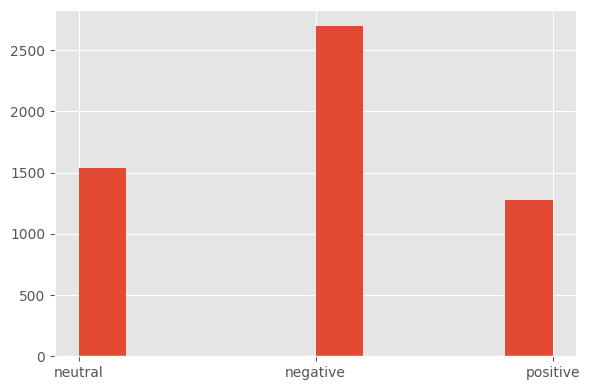

In [ ]:
# So After Careful Investigation of Validity of neutral labeled Data which is unknown too

# we will drop the rows with neutral label
df = df[df['LABEL'] != 'neutral']
emotion2sentiment = {
    'none':'neutral',
    'anger':'negative',
    'sadness':'negative',
    'joy':'positive'
}
df['LABEL'] = df['LABEL'].map(lambda x: emotion2sentiment[x])

df.LABEL.hist(figsize=(6, 4))

In [ ]:
emotion2sentiment = {
    'none':'neutral',
    'anger':'negative',
    'sadness':'negative',
    'joy':'positive'
}

# replace LABEL with Sentiment ID
df['LABEL'] = df['LABEL'].map(lambda x: SENTIMENT_TO_ID[x])
df.head()

,TWEET,LABEL
1,الاوليمبياد الجايه هكون لسه ف الكليه ..,2
2,عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني لسه اقل من 7 % و نفلس و بهايم لسه يتابعوا الاوليمبياد,1
3,كتنا نيله ف حظنا الهباب xD,1
4,جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حراسه المرمي...,0
5,الاوليمبياد نظامها مختلف .. ومواعيد المونديال مكانتش مقرفه ولا حاجه كانت معقوله,2


In [ ]:
# Split the sentences into words
words = df["TWEET"].str.split()


# Find the maximum length of words
max_length_TWEET = max(words.apply(len))

print(f"max length of a tweet :{max_length_TWEET}")

max length of a tweet :35


In [ ]:
# save the dataframe to a CSV file
df.to_csv(CLEANED_DATASET_DIR+EMOTION_DATASET_NAME + '.csv', index=False)

# remove from the datasets array
datasets.remove(EMOTION_DATASET_NAME + '.csv')

### Egyptian Lexicons

> contains egyptian and MSA terms
 ```
 egyptian 2674 + msa: 3279 = 5953 
 ```
> objective is to collect POSITIVE_LEXICONS and NEGATIVE LEXICONS to replace them with a word that is same in their respective Sentiment
> with 4 polarities :
```
negative        3693
positive        1281
compound_neg     563
compound_pos     416
```



In [26]:
# Dataset name
EGYPTIAN_LEXICON_DATASET_NAME = 'egyptian-lexicon'

# Load Dataset
df = pd.read_csv(DATASET_DIR+EGYPTIAN_LEXICON_DATASET_NAME + '.csv',verbose = True)

Tokenization took: 1.84 ms
Type conversion took: 5.23 ms
Parser memory cleanup took: 0.01 ms


In [27]:
df.sample(5)

,Terms,polarity,Egyptian,MSA
5035,تكرمه,positive,0,1
4415,يخوف,negative,0,1
1808,تحاكمك,negative,1,0
5745,نقبل,positive,0,1
5555,مدفيني,positive,1,0


In [28]:
df.columns

Index(['Terms', 'polarity', 'Egyptian', 'MSA'], dtype='object')

count         5953
unique           4
top       negative
freq          3693
Name: polarity, dtype: object
<class 'pandas.core.series.Series'>
RangeIndex: 5953 entries, 0 to 5952
Series name: polarity
Non-Null Count  Dtype 
--------------  ----- 
5953 non-null   object
dtypes: object(1)
memory usage: 46.6+ KB
None
negative        3693
positive        1281
compound_neg     563
compound_pos     416
Name: polarity, dtype: int64


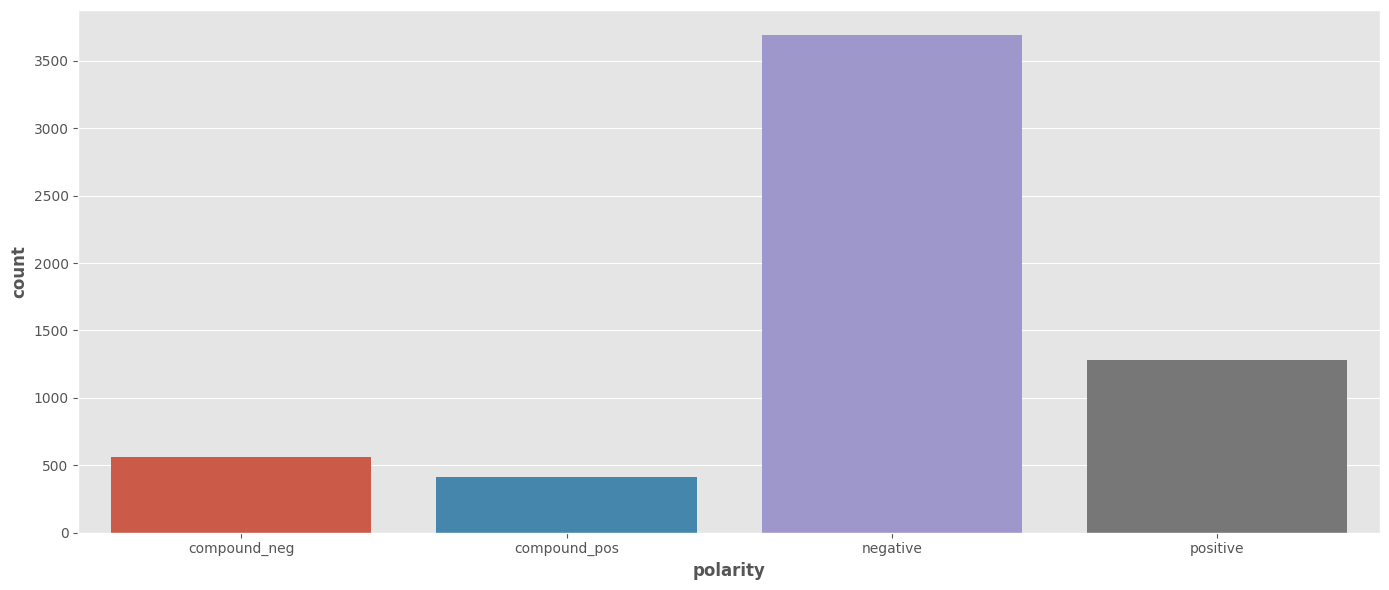

In [29]:
print(df.polarity.describe())
print('='*60)
print(df.polarity.info())
print('='*60)
print(df.polarity.value_counts())
df.polarity.hist()
sns.countplot(data = df,x = 'polarity')
SENTIMENT_TO_ID.update({
'compound_neg': SENTIMENT_TO_ID['negative'],
'compound_pos': SENTIMENT_TO_ID['positive'],
})

In [30]:
# renaming column
df = df.rename(columns={'Terms': TWEET})

egyptian_tweets= len(df[df['Egyptian'] == 1])
msa_tweets = len(df[df['MSA'] == 1])
print(f'egyptian {egyptian_tweets} + msa: {msa_tweets} = {len(df)} it is {len(df) == (egyptian_tweets+msa_tweets)}')

egyptian 2674 + msa: 3279 = 5953 it is True


In [31]:
df['LABEL'] = df['polarity'].map(SENTIMENT_TO_ID)
df.drop(['Egyptian','polarity','MSA'],axis=1,inplace=True)
df.head()

,TWEET,LABEL
0,ابقي قابلني,1
1,ابن الاحبي,1
2,ابن القرعه,1
3,ابن المره,1
4,ابن المنحوسة,1


In [32]:
# 
NEGATIVE_LEXICONS = NEGATIVE_LEXICONS  + df[df['LABEL'] == SENTIMENT_TO_ID['negative']]['TWEET'].tolist()
POSITIVE_LEXICONS = POSITIVE_LEXICONS  + df[df['LABEL'] == SENTIMENT_TO_ID['positive']]['TWEET'].tolist()


print(NEGATIVE_LEXICONS)
print(POSITIVE_LEXICONS)

['ابقي قابلني', 'ابن الاحبي', 'ابن القرعه', 'ابن المره', 'ابن المنحوسة', 'ابن الهرمه', 'ابن جزمه', 'ابو جهل', 'اتق الله', 'اتقو الله', 'اتقي الله', 'اتقي شر', 'اتكسف علي دمك', 'اتكسفوا علي دمكم', 'اتمسح بينا الأرض', 'اتمسح بيه الارض', 'اتمسح بيه البلاط', 'اتمسح بيهم الارض', 'اجعلهم عبره', 'اجهل بني', 'اجهل خلق الله', 'اجهل واحد', 'احترم نفسك', 'احساس وحش ', 'اخبط دماغك فالحيط', 'اخص علي', 'ارحمني بئه', 'ارمي نفسي', 'ازاي بقي', 'اسمع كلامك اصدقك', 'اسوء منهم مفيش', 'اشباه رجال', 'اشكال زباله', 'اشوف فيك يوم', 'اصحاب المصالح', 'اصحاب سوابق ', 'اعداء النجاح', 'اعمل ايه طيب ', 'اعمل لكم ايه', 'اعوذ بالله ', 'اقر ع ونزهي', 'اقل من عادي', 'الاشكال دي', 'البلا الأرزق', 'الساكت عن الحق شيطان اخرس', 'الطين بله', 'العب غيرها', 'العوض على الله', 'العين الحمرا', 'الغايب ملوش نايب', 'الغباء له ناسه', 'القضاء علي', 'الله غالب', 'الله لا يسامحك ', 'الله يحرقك', 'الله يحرقكو', 'الله يخرب بيتك', 'الله يلعن', 'اللهم اخزه', 'اللهي تتشك في', 'اللهي تنشك في', 'اللي اختاشو ماتو', 'المتاجره بالدين', 'اله ادب

In [33]:
# Dont save it to csv
# df.to_csv(CLEANED_DATASET_DIR+EGYPTIAN_LEXICON_DATASET_NAME+'.csv', index=False)

# remove from the datasets array
datasets.remove(EGYPTIAN_LEXICON_DATASET_NAME+'.csv')

NameError: ignored

### egypt-ArSAS

> Topic
```
Event            8288
Entity           5810
Long_Standing    5799
Name: Topic, dtype: int64
```

> Speech_act_label
```
Expression        11060
Assertion          7799
Question            707
Request             171
Recommendation      102
Miscellaneous        58
Name: Speech_act_label, dtype: int64
```

>Sentiment_label
```
Negative    7384
Neutral     6894
Positive    4400
Mixed       1219
Name: Sentiment_label, dtype: int64
```

In [ ]:
# Dataset name
EGYPT_ARSAS_DATASET_NAME= 'egypt-ArSAS'

# Load Dataset
df = pd.read_csv(DATASET_DIR + EGYPT_ARSAS_DATASET_NAME + '.txt', delimiter='\t',verbose=True)

Tokenization took: 166.12 ms
Type conversion took: 92.76 ms
Parser memory cleanup took: 0.01 ms


In [ ]:
print(df.columns)
print(df.describe())
print(df.info())

Index(['#Tweet_ID', 'Tweet_text', 'Topic', 'Sentiment_label',
       'Sentiment_label_confidence', 'Speech_act_label',
       'Speech_act_label_confidence'],
      dtype='object')
          #Tweet_ID  Sentiment_label_confidence  Speech_act_label_confidence
count  1.989700e+04                19897.000000                 19897.000000
mean   9.295380e+17                    0.829907                     0.892115
std    1.425699e+15                    0.200473                     0.167025
min    9.265110e+17                    0.260000                     0.330000
25%    9.286477e+17                    0.670000                     0.680000
50%    9.294421e+17                    1.000000                     1.000000
75%    9.305112e+17                    1.000000                     1.000000
max    9.322403e+17                    1.000000                     1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19897 entries, 0 to 19896
Data columns (total 7 columns):
 #   Column        

In [ ]:
print(df['Topic'].value_counts())
print('='*60)
print(df['Speech_act_label'].value_counts())
print('='*60)
print(df['Sentiment_label'].value_counts())

Event            8288
Entity           5810
Long_Standing    5799
Name: Topic, dtype: int64
Expression        11060
Assertion          7799
Question            707
Request             171
Recommendation      102
Miscellaneous        58
Name: Speech_act_label, dtype: int64
Negative    7384
Neutral     6894
Positive    4400
Mixed       1219
Name: Sentiment_label, dtype: int64


In [ ]:
df.sample(5,random_state=RANDOM_STATE)

,#Tweet_ID,Tweet_text,Topic,Sentiment_label,Sentiment_label_confidence,Speech_act_label,Speech_act_label_confidence
10452,929428864555731968,مبرروووووووك للمغرب وصول مستحق من ارض ساحل العاج #تصفيات_كأس_العالم,Event,Positive,1.00,Expression,1.0
1512,930049249684974976,"أحد قصور خالد التويجري.= قوات كبيره تحاصر منزل عم ولي العهد السعودي ""مشعل بن عبد العزيز"" ونفس الأمرمع أبناء عمه ""محمد وعبد العزيز بن فهد"" وخالد بن سلطان. ولم يتضح السبب حتى الأن بأنباء مؤكده .. ولكن المؤكد أن قوات تتوشح اللثام والزي الخاص بالقوات الخاصه السعوديه تحاصر منازلهم",Event,Neutral,0.67,Assertion,1.0
18467,932050030214766592,#حلم_90مليون الحلم اتحققوهنروح كاس العالم 💞💞💞💞💞💞💞💞 #محمد_صلاح تستحقها اقسم بالله 💞💞💞💞💞💞💞💞 #عصام_الحضري مبروك انت ف التاريخ الحمد لك يارب❤,Entity,Positive,1.00,Expression,1.0
9992,930086915755462656,النظام القطري يدعي أن ثورات الربيع العربي كانت عفوية و انطلقت شرارتها في تونس ثم انتقلت نسائمها سريعاً إلى مصر فليبيا وسوريا واليمن والعراق والبحرين ... طيب من خطّط من موّل بالمال والسلاح وينقل الاخبار ليف ... الّا أخبار الامير الوالد بطل الثورات هههههته,Long_Standing,Negative,0.67,Expression,1.0
15405,929062192766423040,تصفيات كاس العالم افريقيا | نهاية المباراة : جنوب افريقيا 0 × 2 السنغال رسميا : السنغال تتأهل لـكاس العالم 2018 روسيا,Event,Neutral,1.00,Assertion,1.0


In [ ]:
df.drop(['#Tweet_ID',  'Topic', 'Speech_act_label','Speech_act_label_confidence'],axis=1,inplace=True)
df.sample(5,random_state=RANDOM_STATE)

,Tweet_text,Sentiment_label,Sentiment_label_confidence
10452,مبرروووووووك للمغرب وصول مستحق من ارض ساحل العاج #تصفيات_كأس_العالم,Positive,1.00
1512,"أحد قصور خالد التويجري.= قوات كبيره تحاصر منزل عم ولي العهد السعودي ""مشعل بن عبد العزيز"" ونفس الأمرمع أبناء عمه ""محمد وعبد العزيز بن فهد"" وخالد بن سلطان. ولم يتضح السبب حتى الأن بأنباء مؤكده .. ولكن المؤكد أن قوات تتوشح اللثام والزي الخاص بالقوات الخاصه السعوديه تحاصر منازلهم",Neutral,0.67
18467,#حلم_90مليون الحلم اتحققوهنروح كاس العالم 💞💞💞💞💞💞💞💞 #محمد_صلاح تستحقها اقسم بالله 💞💞💞💞💞💞💞💞 #عصام_الحضري مبروك انت ف التاريخ الحمد لك يارب❤,Positive,1.00
9992,النظام القطري يدعي أن ثورات الربيع العربي كانت عفوية و انطلقت شرارتها في تونس ثم انتقلت نسائمها سريعاً إلى مصر فليبيا وسوريا واليمن والعراق والبحرين ... طيب من خطّط من موّل بالمال والسلاح وينقل الاخبار ليف ... الّا أخبار الامير الوالد بطل الثورات هههههته,Negative,0.67
15405,تصفيات كاس العالم افريقيا | نهاية المباراة : جنوب افريقيا 0 × 2 السنغال رسميا : السنغال تتأهل لـكاس العالم 2018 روسيا,Neutral,1.00


In [ ]:
df[(df['Sentiment_label'] == 'Neutral') & (df['Sentiment_label_confidence'] < 0.5)]

,Tweet_text,Sentiment_label,Sentiment_label_confidence
49,مرتضى منصور النسخة الكويتية .. https://t.co/R0kiIY4asa,Neutral,0.35
132,بعد استعباد #داعش لها لمدة 20 شهر، الناشطة العراقية الايزيدية لمياء بشار تمثل #العراق في منتدى شباب العالم بشرم الشيخ https://t.co/scRrmups3y #العظيم -,Neutral,0.35
139,أويحيى : كيف سيكون حال الجزائر اليوم لو لم ننجُ من كارثة الربيع العربي الرأي التونسي : اتهم الوزير الأول... https://t.co/gKsKBAMVea,Neutral,0.35
393,لطائف قرانية ۩ الحلقة 4 - الشيخ #محمد_حسان https://t.co/fTj2BXgXj7 #العريفي #اسلام_بحيري #اسلام_حر #الخريطه #الشيخ_ميزو #محمد_حسين_يعقوب #الشيخ_حسان #معركة_الوعي #عمرو_اديب #بسمه_رفعت #محمد_صلاح #حازم_صلاح_ابو_اسماعيل #صابر_مشهور #معتز_مطر #تيران_وصنافير_مصريه #آيات_عرابي,Neutral,0.35
483,الحصار أنعش القصائد الوطنيةhttps://t.co/6U9YuvEeKh#قطر #الأزمة_الخليجية #حصار_قطر https://t.co/HENECA9ua,Neutral,0.35
...,...,...,...
19068,مشكلة ايطاليا انها لا تملك محمد صلاح لذلك لا تستطيع ان تلعب بواقعية,Neutral,0.34
19290,كتبتُ سابقاً: إن الربيع العربي فتحَ عيوننا على أمور ما كنّا لِنراها أو نعرفها ولو عشنا عشرات السنين في نظامنا وروتيننا القديم https://t.co/jT5heXMd4o,Neutral,0.35
19676,1️⃣كثر الحديث في وسائل الإعلام العالمية حول محاربة السعودية للفساد .. التغريدات اللاحقة ستتناول الفساد من منظور اقتصادي,Neutral,0.35
19742,🔴عاجل الرئيس عبد الفتاح السيسي : المنتدى كان تفريغا هائلا للطاقات السلبية ومنح طاقة إيجابية لكل من شاهده . #ائتلاف_نساء_مصر #مصر_تستعيد_شبابها #السيسي_زعيم_بحجم_الوطن #WeNeedToTalk https://t.co/ufMAnhZcyY,Neutral,0.35


In [ ]:
df.drop(df[df['Sentiment_label'] == 'Mixed'].index,axis=0,inplace=True)
df.drop('Sentiment_label_confidence',axis=1,inplace=True)

In [ ]:
# renaming column
df.rename(columns={'Sentiment_label':LABEL,'Tweet_text':TWEET},inplace=True)

<Axes: >

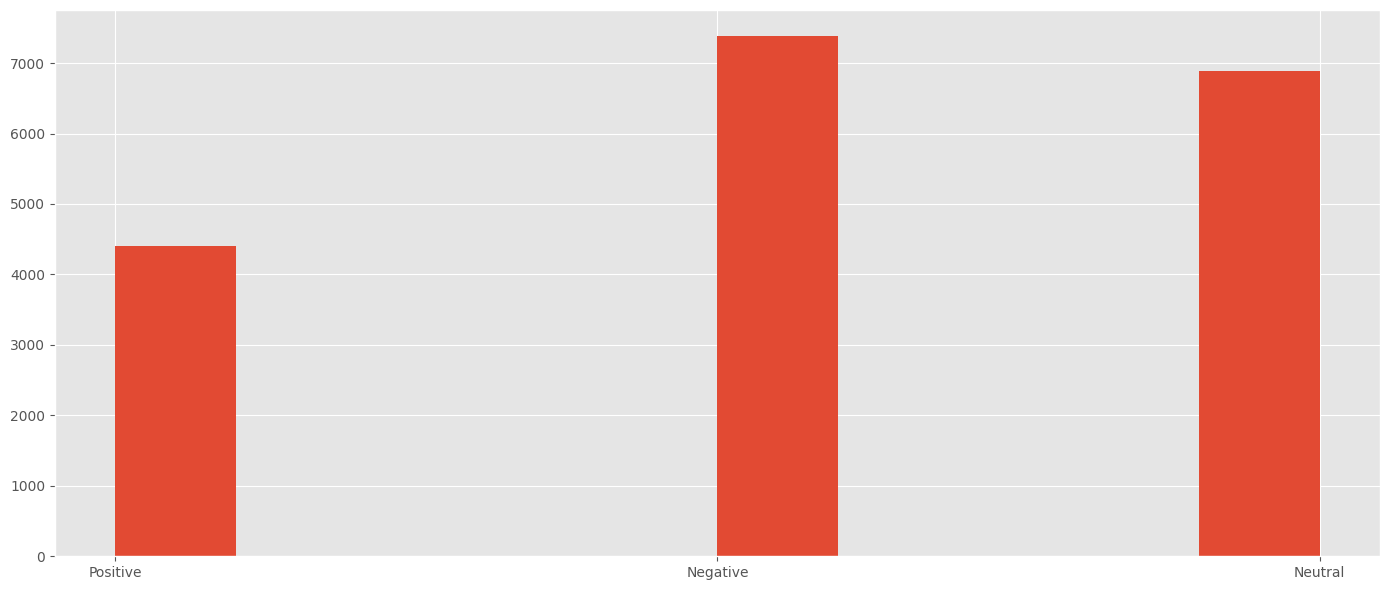

In [ ]:
df['LABEL'].hist()

In [ ]:
df['LABEL'] = df['LABEL'].map(lambda label: SENTIMENT_TO_ID[label.lower()])

In [ ]:
# Split the sentences into words
words = df["TWEET"].str.split()


# Find the maximum length of words
max_length_TWEET = max(words.apply(len))

print(f"max length of a tweet :{max_length_TWEET}")

max length of a tweet :2062


In [ ]:
tab_rows = df[df['TWEET'].str.contains('\t')]
# Print the selected rows
print('Rows that contain a tab character:')
print(tab_rows)

Rows that contain a tab character:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
# Remove rows that contain a tab character
df = df[~df['TWEET'].str.contains('\t')]

In [ ]:
df.to_csv(CLEANED_DATASET_DIR+EGYPT_ARSAS_DATASET_NAME+'.csv', index=False)

# remove from the datasets array
datasets.remove(EGYPT_ARSAS_DATASET_NAME+'.txt')

### (egy-news)ASDT-BENCHMARK-Tweets
> Data is mostly about news

>LABEL :
```
OBJ        6470 => neutral
NEG        1642 => negative
NEUTRAL     805
POS         777
```

In [ ]:
# Dataset name
EGYPT_ASDT_DATASET_NAME= '(egy-news)ASDT-BENCHMARK-Tweets'

# Load Dataset
df = pd.read_csv(DATASET_DIR + EGYPT_ASDT_DATASET_NAME + '.txt', delimiter='\t',verbose=True,names=COLUMN_NAMES)

Tokenization took: 27.39 ms
Type conversion took: 24.29 ms
Parser memory cleanup took: 0.01 ms


In [ ]:
df.head(10)

,TWEET,LABEL
0,بعد استقالة رئيس #المحكمة_الدستورية ننتظر استقالة #رئيس_القضاء #السودان,OBJ
1,أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر، بمناسبة صدور أولى روايته,POS
2,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام العريان الي واشنطن شئ مقرف,NEG
3,#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية أول فيلم استقصائي يتناول أسرار و كواليس تعرض لأول مرة حول حقيقة,OBJ
4,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقولها ملل الله وكيلك تعطيني محاضرة عن الفسق والفجور بجنوب الشيشان #ليه كذا يانبع الحنان,NEUTRAL
5,#انتخبوا_العرص #انتخبوا_البرص #مرسى_رئيسى #اين_رئيسى #_ #__ö,NEUTRAL
6,امير عيد هو اللي فعلا يتقال عليه ستريكر صريح #كاريوكي #السكة_شمال,POS
7,أحكي لكم قصة حدثت بين شاب و أحد الفتيات كان بينهم حب كبير ولكن حدثت غلطة واحدة؟ فهل ستستمر هذه القصة ويتم,OBJ
8,أدعوكم لحضور الندوة الثقافية الأربعاء مركز اعداد القادة التفاصيل,OBJ
9,عودة جماعة الإخوان إلى الحياة السياسية بنفس وضعها السابق مستحيلة والطرمخة على جرائم الماضي لن تجعلنا نتقدم شبرا,NEG


In [ ]:
print(df.columns)
print(df.describe())
print(df.info())
print(df['LABEL'].value_counts())

Index(['TWEET', 'LABEL'], dtype='object')
                                                                               TWEET  \
count                                                                           9694   
unique                                                                          9690   
top     الإخوان يطلقون طفايات الحريق للإيحاء بإلقاء القنابل المسيلة داخل مسجد #الفتح   
freq                                                                               2   

       LABEL  
count   9694  
unique     4  
top      OBJ  
freq    6470  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9694 entries, 0 to 9693
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TWEET   9694 non-null   object
 1   LABEL   9694 non-null   object
dtypes: object(2)
memory usage: 151.6+ KB
None
OBJ        6470
NEG        1642
NEUTRAL     805
POS         777
Name: LABEL, dtype: int64


In [ ]:
df[(df['LABEL'] == 'NEUTRAL')|(df['LABEL'] == 'OBJ')].sample(5)
# so here it seems that OBJ => NEUTRAL and NEUTRAL is negative

,TWEET,LABEL
5613,ملعب #ريال_مدريد #سنتياجو_برنابيو 😍لبيه ملعب يفتح النفس 😉,OBJ
2789,كِتَابٌ أَنزَلْنَاهُ إِلَيْكَ مُبَارَكٌ لِّيَدَّبَّرُوا آيَاتِهِ} تعرف على أخطاء القراءة الشائعة في,OBJ
4618,مبدع دائما يا عم الشيخ,OBJ
1757,الصلاة على أرواح 19 من شهداء الثورة مجهولي الهوية بعد صلاة العصر في مسجد السيدة نفيسة,OBJ
1056,السيرة الذاتية للرئيس #محمد_مرسي في موقع ويكيبديا #مصر # #انتخبوا_العرص,NEUTRAL


<Axes: >

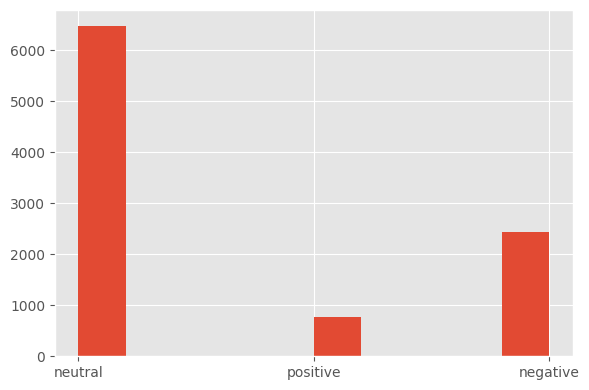

In [ ]:
temp = {
      'OBJ':"neutral" ,
     'NEUTRAL':"negative" ,
     'NEG' :"negative"       ,
    'POS':    "positive" 
     
    }

df['LABEL'] = df['LABEL'].map(lambda label: temp[label])
df['LABEL'].hist(figsize=(6,4))

In [ ]:
df['LABEL'] = df['LABEL'].map(lambda label: SENTIMENT_TO_ID[label])

In [ ]:
# Filter out rows where the length of the 'text' column is greater than 280
df = df[df['TWEET'].apply(lambda x: len(x)) <= MAX_LEN]
df.head()

,TWEET,LABEL
0,بعد استقالة رئيس #المحكمة_الدستورية ننتظر استقالة #رئيس_القضاء #السودان,2
1,أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر، بمناسبة صدور أولى روايته,0
2,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام العريان الي واشنطن شئ مقرف,1
3,#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية أول فيلم استقصائي يتناول أسرار و كواليس تعرض لأول مرة حول حقيقة,2
4,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقولها ملل الله وكيلك تعطيني محاضرة عن الفسق والفجور بجنوب الشيشان #ليه كذا يانبع الحنان,1


In [ ]:
# Split the sentences into words
words = df["TWEET"].str.split()


# Find the maximum length of words
max_lengths = words.apply(len).sort_values(ascending=False)[:20]

print(max_lengths)
#print(data.iloc[31637])

5655    39
4333    36
5531    35
2521    32
1237    29
3771    29
7612    29
2381    29
7657    29
47      29
2265    29
7148    29
9585    28
4774    28
3739    28
7059    28
1208    28
3185    28
933     28
4031    28
Name: TWEET, dtype: int64


In [ ]:
df.to_csv(CLEANED_DATASET_DIR+EGYPT_ASDT_DATASET_NAME+'.csv', index=False)

# remove from the datasets array
datasets.remove(EGYPT_ASDT_DATASET_NAME+'.txt')

### egy-tweets1



> LABEL :
```
pos    1046
neg     976
neu     724
```

In [ ]:
# Dataset name
EGYPT_TWEETS_1_DATASET_NAME= 'egy-tweets1'


# Load Dataset
df = pd.read_csv(DATASET_DIR + EGYPT_TWEETS_1_DATASET_NAME + '.txt', delimiter="'\t",verbose=True,names=COLUMN_NAMES,header=0)

<ipython-input-73-5c13c6017ed4>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(DATASET_DIR + EGYPT_TWEETS_1_DATASET_NAME + '.txt', delimiter="'\t",verbose=True,names=COLUMN_NAMES,header=0)


In [ ]:
df.head(5)

,TWEET,LABEL
0,فينو الاهبل ابن الاهبل,neg
1,على المصرييييين وجمالهم ربنا يحميهم #MinaAtta http://t.co/NkOvSx6mgD,pos
2,@Kholoudkewan دول كتير اوى ودمهم خفيف العمارة اللي انا فيها كلها سوريين والأطفال عسل,pos
3,انا بعد كده خلى اللى يوعنى بحاجه همضى على وصل امانه علشان اضمن انو مش يخون,neg
4,انا هنتحر,neg


In [ ]:
print(df.columns)
print(df.describe())
print(df.info())
print(df['LABEL'].value_counts())

Index(['TWEET', 'LABEL'], dtype='object')
                          TWEET LABEL
count                      2746  2746
unique                     2746     3
top     فينو الاهبل ابن الاهبل    pos
freq                          1  1046
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746 entries, 0 to 2745
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TWEET   2746 non-null   object
 1   LABEL   2746 non-null   object
dtypes: object(2)
memory usage: 43.0+ KB
None
pos    1046
neg     976
neu     724
Name: LABEL, dtype: int64


<Axes: >

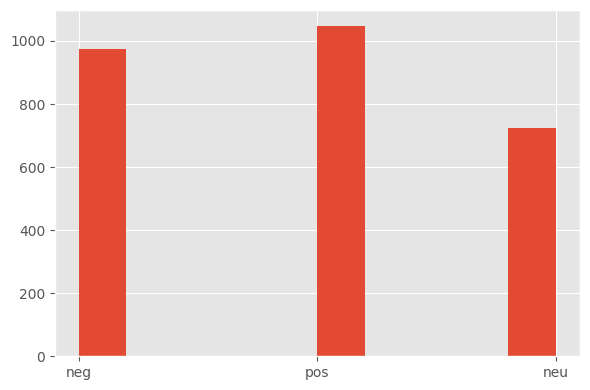

In [ ]:
df['LABEL'].hist(figsize=(6,4))

In [ ]:
SENTIMENT_TO_ID.update({
    'neu':SENTIMENT_TO_ID['neutral'],
    'neg':SENTIMENT_TO_ID['negative'],
    'pos':SENTIMENT_TO_ID['positive'],


})

df['LABEL'] = df['LABEL'].map(lambda label: SENTIMENT_TO_ID[label])

In [ ]:
df.to_csv(CLEANED_DATASET_DIR+EGYPT_TWEETS_1_DATASET_NAME+'.csv', index=False)

# remove from the datasets array
datasets.remove(EGYPT_TWEETS_1_DATASET_NAME+'.txt')

### egy-tweets2



>LABEL :
```
pos    263
neg    228
neu    192
```

In [ ]:
# Dataset name
EGYPT_TWEETS_2_DATASET_NAME= 'egy-tweets2'


# Load Dataset
df = pd.read_csv(DATASET_DIR + EGYPT_TWEETS_2_DATASET_NAME + '.txt', delimiter="'\t",verbose=True,names=COLUMN_NAMES,header=0)

<ipython-input-79-7061a84863df>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(DATASET_DIR + EGYPT_TWEETS_2_DATASET_NAME + '.txt', delimiter="'\t",verbose=True,names=COLUMN_NAMES,header=0)


In [ ]:
df.head(5)

,TWEET,LABEL
0,كل حلم بألم .. كل خطوه بعذاب ..,neg
1,العسكري مدرس التاريخ في شبرا جايب عربيات همر للاسيستانت ولسة جايب لبنته مرسيدس 2015 ال هى ادي في تالتة ثانوي في عيد ميلادها,neg
2,الشقااااااااااوة لعبتى والشمال مش سكتى ؟,pos
3,@memoali4ever انا كان عندي حساب واتقفل كان عندي فولورز كتير كتير,neg
4,"""""""@mahmoud_turkey0 ياعم أتنيل، دي كفاية أمها روسية :D""""""""",neg


In [ ]:
print(df.columns)
print(df.describe())
print(df.info())
print(df['LABEL'].value_counts())

Index(['TWEET', 'LABEL'], dtype='object')
                                   TWEET LABEL
count                                683   683
unique                               683     3
top     كل حلم بألم .. كل خطوه بعذاب ..    pos
freq                                   1   263
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TWEET   683 non-null    object
 1   LABEL   683 non-null    object
dtypes: object(2)
memory usage: 10.8+ KB
None
pos    263
neg    228
neu    192
Name: LABEL, dtype: int64


<Axes: >

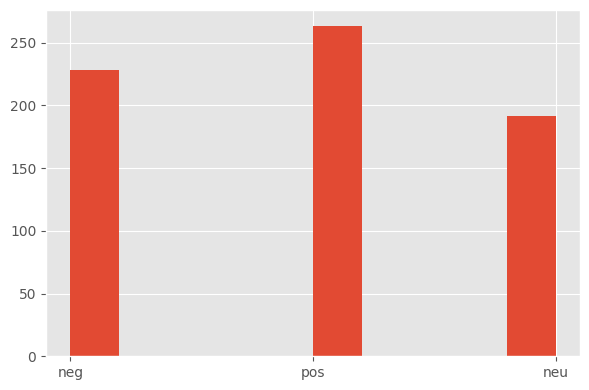

In [ ]:
df['LABEL'].hist(figsize=(6,4))

In [ ]:
SENTIMENT_TO_ID.update({
    'neu':SENTIMENT_TO_ID['neutral'],
    'neg':SENTIMENT_TO_ID['negative'],
    'pos':SENTIMENT_TO_ID['positive'],


})

df['LABEL'] = df['LABEL'].map(lambda label: SENTIMENT_TO_ID[label])

In [ ]:
# Filter out rows where the length of the 'text' column is greater than 280
df = df[df['TWEET'].apply(lambda x: len(x)) <= MAX_LEN]

In [ ]:
df.to_csv(CLEANED_DATASET_DIR+EGYPT_TWEETS_2_DATASET_NAME+'.csv', index=False)

# remove from the datasets array
datasets.remove(EGYPT_TWEETS_2_DATASET_NAME+'.txt')

### ArTwitter


>LABEL :
```
pos    263
neg    228
neu    192
```

In [ ]:
# Dataset name
ArTwitter_DATASET_NAME= 'ArTwitter'


# Load Dataset
df = pd.read_csv(DATASET_DIR + ArTwitter_DATASET_NAME + '.csv',verbose=True,names=COLUMN_NAMES[::-1],header=0)

Tokenization took: 0.77 ms
Type conversion took: 2.38 ms
Parser memory cleanup took: 0.01 ms


In [ ]:
df.head(5)

,LABEL,TWEET
0,positive,انشاء الله هنعمل حاجه
1,negative,اقسم باللله ان العرب اكثر الشعوب تخلفاا
2,negative,﻿هات ناس تفهم .. و المثل بحكي اسأل مجرب و لا تسأل خبير
3,negative,صرماتي براس اهلك
4,negative,حرام السخرية من الناس


In [ ]:
print(df.columns)
print('='*60)
print(df.describe())
print('='*60)
print(df.info())
print('='*60)
print(df['LABEL'].value_counts())

Index(['LABEL', 'TWEET'], dtype='object')
           LABEL  \
count       1951   
unique         2   
top     positive   
freq         993   

                                                                                                                                                                                                                                                                                                                                                                                                TWEET  
count                                                                                                                                                                                                                                                                                                                                                                                            1951  
unique                                                                   

<Axes: >

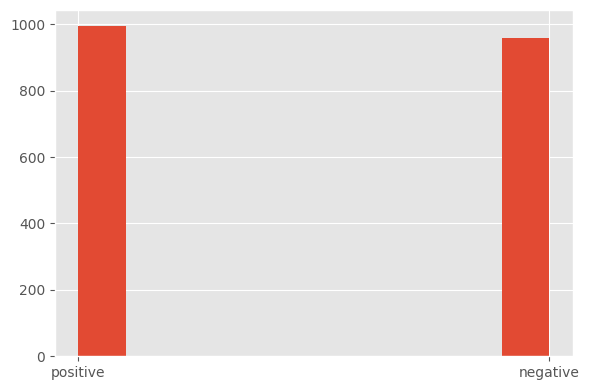

In [ ]:
df['LABEL'].hist(figsize=(6,4))

In [ ]:
df['LABEL'] = df['LABEL'].map(lambda label: SENTIMENT_TO_ID[label])

In [ ]:
# Filter out rows where the length of the 'text' column is greater than 280
df = df[df['TWEET'].apply(lambda x: len(x)) <= MAX_LEN]

In [ ]:
df.to_csv(CLEANED_DATASET_DIR+ArTwitter_DATASET_NAME+'.csv', index=False)

# remove from the datasets array
datasets.remove(ArTwitter_DATASET_NAME+'.csv')

## Merging all Datasets

> after cleaning : 
```
POSITIVE_LEN : 21000 
NEGATIVE_LEN 21000
NEUTRAL_LEN = 21000
```

In [ ]:
import os
import glob
import pandas as pd

DATASET_NAME='DATASET'
# Get filenames of all CSV files in directory with same column names
filenames = glob.glob(os.path.join(CLEANED_DATASET_DIR, '*.csv'))
matching_filenames = []
for filename in filenames:
    df = pd.read_csv(filename, nrows=1)
    if set(COLUMN_NAMES).issubset(set(df.columns)):
        matching_filenames.append(filename)

# Concatenate dataframes
dfs = [pd.read_csv(filename) for filename in matching_filenames]
df = pd.concat(dfs, ignore_index=True)

df.to_csv(os.path.join(MERGED_DATASET_DIR,DATASET_NAME+'.csv'), index=False)

print(f"all {len(matching_filenames)} dataframes are concatenated {len(df)} and saved in {MERGED_DATASET_DIR+DATASET_NAME+'.csv'}" if (filenames == matching_filenames) else 'problem occured in concatenating')

all 6 dataframes are concatenated 39147 and saved in /content/drive/MyDrive/Bachelor/Sentiment/MERGED_DATASET/DATASET.csv


In [ ]:
# Check result
df.head()

,TWEET,LABEL
0,الاوليمبياد الجايه هكون لسه ف الكليه ..,2
1,عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني لسه اقل من 7 % و نفلس و بهايم لسه يتابعوا الاوليمبياد,1
2,كتنا نيله ف حظنا الهباب xD,1
3,جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حراسه المرمي...,0
4,الاوليمبياد نظامها مختلف .. ومواعيد المونديال مكانتش مقرفه ولا حاجه كانت معقوله,2


### Class Balancing


In [ ]:
# Remove rows that contain a tab character
df = df[~df['TWEET'].str.contains('\t')]
# replace empty string values with NaN
df.replace('', np.nan,inplace=True)
# Remove duplicated rows
df.drop_duplicates(inplace=True)
# Remove nulls
df.dropna(axis=0,inplace=True)

<ipython-input-95-248b92a4a1cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('', np.nan,inplace=True)


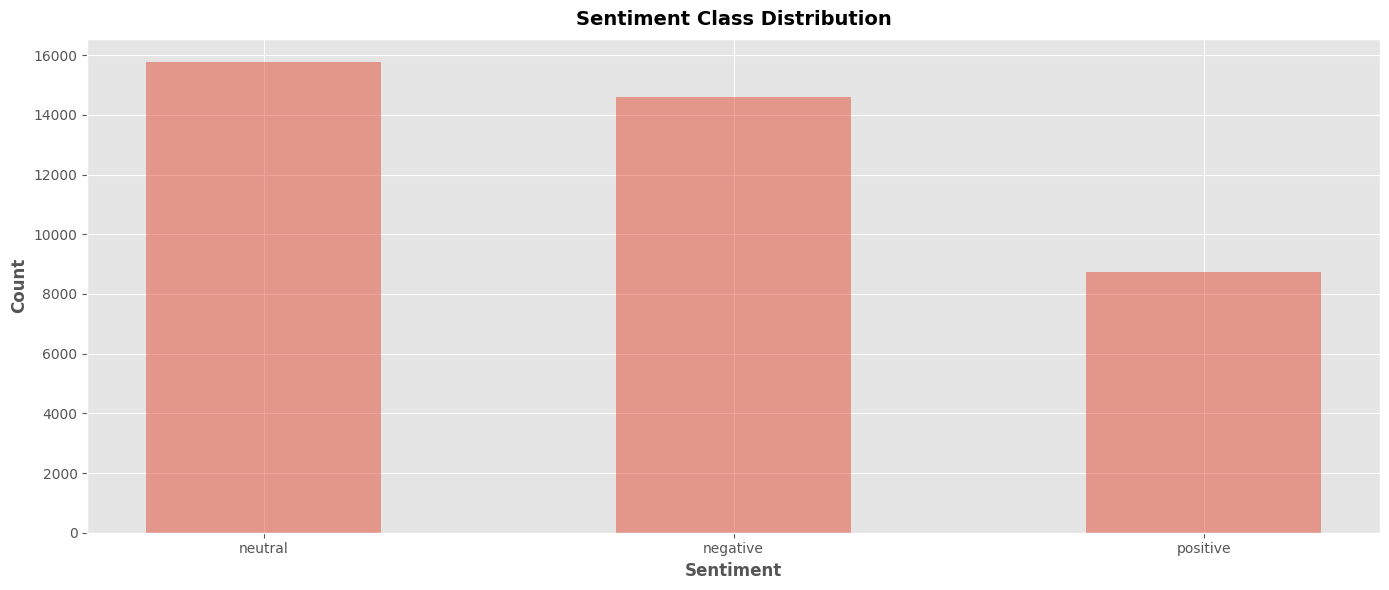

In [ ]:
plot_distribution(series=df['LABEL'].map(ID_TO_SENTIMENT),save_name="unbalanced_"+DATASET_NAME)

In [ ]:
# so here I will use 
POSITIVE_LEN=len(df[df['LABEL'] == SENTIMENT_TO_ID['positive']])
NEGATIVE_LEN=len(df[df['LABEL'] == SENTIMENT_TO_ID['negative']])
NEUTRAL_LEN=len(df[df['LABEL'] == SENTIMENT_TO_ID['neutral']])

print(f'POSITIVE_LEN : {POSITIVE_LEN} , NEGATIVE_LEN {NEGATIVE_LEN}, NEUTRAL_LEN = {NEUTRAL_LEN}')

POSITIVE_LEN : 8718 , NEGATIVE_LEN 14582, NEUTRAL_LEN = 15756


####  ar_reviews_100k

> Let's take from it ` Positive` and ` Negative`
```
Positive    33333
Mixed       33333 ==> useless
Negative    *33333*
Name: LABEL, dtype: int64

```

In [ ]:
# we will use additional dataset to complete the differences between the classes to balance it
AR_REVIEWS_DATASET_NAME='ar_reviews_100k'


# Load Dataset
df_reviews = pd.read_csv(DATASET_DIR + AR_REVIEWS_DATASET_NAME + '.tsv',verbose=True,delimiter='\t',names=COLUMN_NAMES[::-1],header=0)

Tokenization took: 3541.28 ms
Type conversion took: 1672.12 ms
Parser memory cleanup took: 0.01 ms


In [ ]:
df_reviews.head()

,LABEL,TWEET
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشاطيء. المطعم
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدولة يعشق ترابها. نحن نحب الإمارات. ومضات من فكر. نصائح لدولة تطمح بالصفوف الأولى و قائد لا يقبل إلا براحة شعبه وتوفر كل سب العيش الكريم. حكم و مواقف ونصائح لكل فرد فينا ليس بمجرد كتاب سياسي كما كنت اعتقد. يستحق القراءة مرات كثيرة
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى هدوء جبال الشيشان .. للتعرف على حقيقة ما يجرى فى تلك البلاد من حروب ضاربة بحق المسلمين و جزء كبير من تاريخ تلك المنطقة. التضحية .. الرجولة .. الوفاء والكثير من القيم الأخرى اثبتت وجودها فى تلك الرواية البسيطة
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الازرق ميقراش احسن.. احمد مراد تخطى مرحلة ان القارئ يخلص الرواية وهو فاتح بؤه لمرحلة ان القارئ يخلص الرواية وهو محترم الكاتب.. اتقان مخيف.. بصرف النظر عن اخطاء لا تذكر ف الحوار.. انما احمد مراد سافر عاش حبة ف اوائل القرن العشرين وجه ياخدنا لهناك.. خلطة مشاعر انسانية حقيقية لدرجة غريبة.. دراما نقلته من كاتب شاب بيستعرض لصنايعي حقيقي تثق فيما سيكتب بعد كده.. ربط بين مصر الآن ومصر من سنة هيطمنك ان عجينة الناس دي متغيرتش و زي ما عدت قبل كده هتعدي اي ازمة دلوقتي.. احمد مراد.. كاتب محترف شغال بضميييررر بكل ما تحمل الكلمة من معنى..
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل الخدمات مريح نفسيا. لا يوجد


Average words per sample length: 17.790608357230642
Max Words per sample length: 196
Min Words per sample length: 1
Average characters per sample length: 100.25698996312987
Max characters per sample length: 305
Min characters per sample length: 1


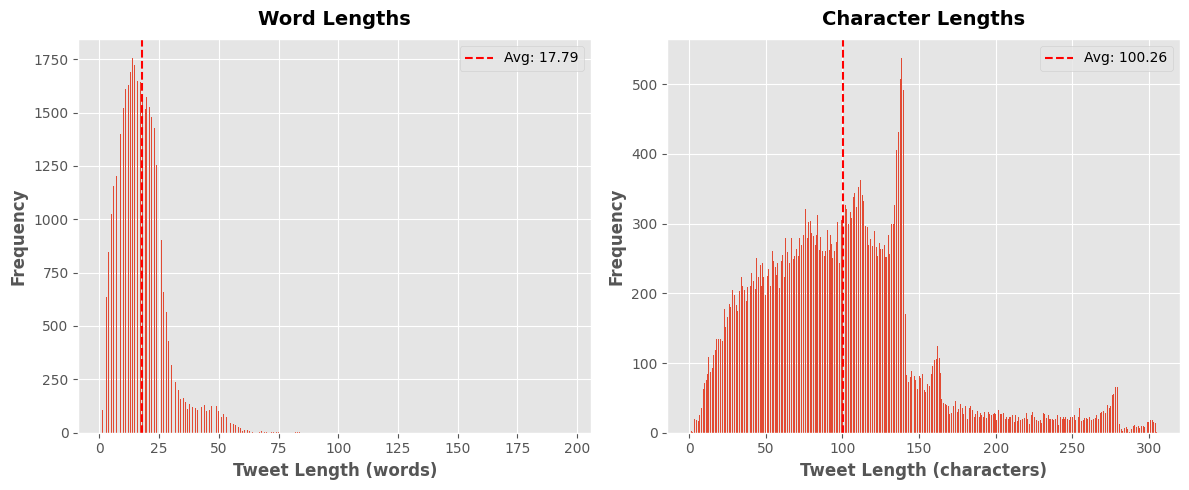

In [ ]:
# Original
plot_length(df['TWEET'])

Average words per sample length: 58.54492544925449
Max Words per sample length: 1886
Min Words per sample length: 1
Average characters per sample length: 297.52528525285254
Max characters per sample length: 8163
Min characters per sample length: 1


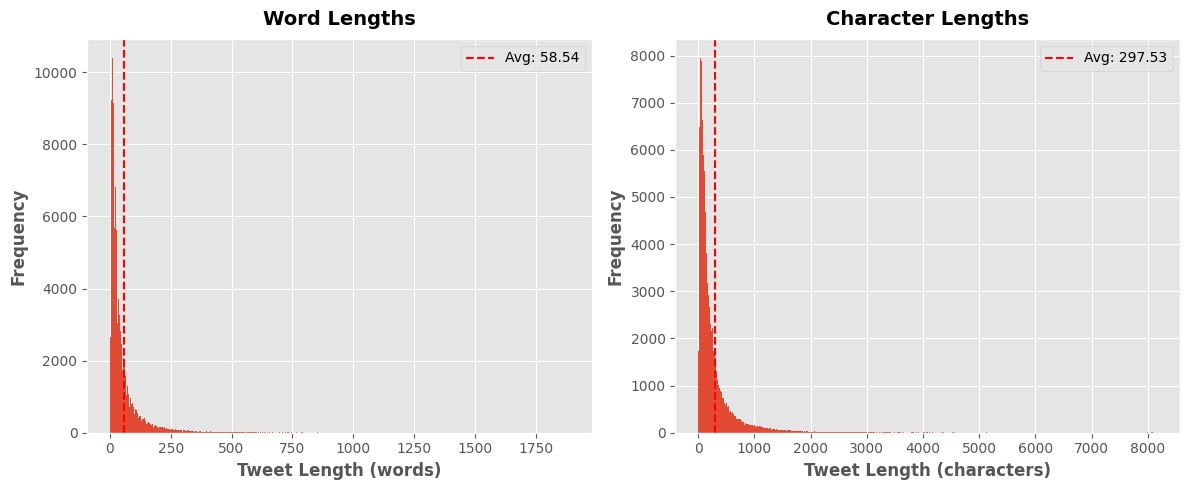

In [ ]:
# additional reviews
plot_length(df_reviews['TWEET'])

In [ ]:
print(df_reviews.columns)
print('='*60)
print(df_reviews.describe())
print('='*60)
print(df_reviews.info())
print('='*60)
print(df_reviews['LABEL'].value_counts())

Index(['LABEL', 'TWEET'], dtype='object')
           LABEL                                                      TWEET
count      99999                                                      99999
unique         3                                                      99999
top     Positive  ممتاز نوعا ما . النظافة والموقع والتجهيز والشاطيء. المطعم
freq       33333                                                          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   LABEL   99999 non-null  object
 1   TWEET   99999 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB
None
Positive    33333
Mixed       33333
Negative    33333
Name: LABEL, dtype: int64


In [ ]:
df_reviews[df_reviews['LABEL'] == 'Mixed']

,LABEL,TWEET
33333,Mixed,مقبول. السرير مريح نوعا ما. حمام واحد فقط ف الشقة ..الوصول له صعب ..والشقق صغيرة .
33334,Mixed,أول قراءة لي لغادة السمان، الكاتبة أوضحت أن محتواه من أول كتاباتها لذا تلحظ بدايتها كانت مشتته قليلا وهناك فروقات كثيرة بين نص وآخر، وهذا ما يميز الكاتبه التي تطور من كاتبتها واسلوبها في الطرح، أكثر نص أعجبني بحثا عن سهول القمر.
33335,Mixed,رواية جيدة مختلفة عن النوع الذى عودنا احمد مراد بتقديمه. اخذتنى لاحداث مصر سنة و للعجب لم تختلف كثيرا عن احداث مصر سنة . زى ما احنا شعب بيعشق جلاده فى نظر العالم ليس له اى حق فى حريته لانه سيسئ التصرف بها. كل همه الفلوس و لقمة العيش و معندوش اى مانع يتعاون مع المحتل و يخدمه بل بالعكس و يراه افضل السبل للعيش. لسه زى ماحنا فينا اللى على الكراسى بيتغير و حتى الوطنى لو وصل للكرسى بيتغير و الاعلام بيطبل للمحتل زى ما هو.. كلمات اعجبتنى الاحتلال كله احتلال و الارض دى بتاعة ربنا تحرير مصر الحقيقى تطهير الناس من الخونة فكرك المحتل بيغلبنا بسلاح؟ ابدا بيغلبنا بالرجالة اللى استعمر ورحهم . فعلا المحتل عمره ما اعتمد على سلاحه اعتمد علينا احنا عشان نحتل له ارضنا بداله.
33336,Mixed,جميلة وممتعة ، بس مش مهمة خالص. اول حاجة اقراها لمعلوف ومش هتكون الاخيرة ان شاء الله .
33337,Mixed,الثلاث نجمات لي أنا وليس للكتاب.. لأني ببساطة لا أعتقد أني فهمت ما أراده حسين البرغوثي من جنونه هذا
...,...,...
66661,Mixed,هنا غازي .. مختلف. ماهر في في أخذك للوكيشن المواقف التي ذكرها هنا .. تعيش مع تسارع الأحداث. باختصار .. غازي .. مخرج مبدع
66662,Mixed,أكثر ما أحبتته هو اعتماده علي وصف التاريخ من وجهة النظر الإجتماعيه لتطور المجتمع و إعمال العقل و ليس فقط النقل الممل
66663,Mixed,اقامه جيده بشكل عام . القرب من الحرم المكيالمصلى التابع للفندق. المطبخ كان غالبا مفتوح وتنبعث منه روائح الطبخالممرات الى المصلى غير نظيفه
66664,Mixed,كان الكتاب كتاب جميل أشبع رغبتنا لمعرفة أوجه ثانية و مختلفة من شخصية غسان كنفاني ، سألخص رأيي في هذا الكتاب برأي إبراهيم العريس ، حيث قال: من أين كانت تأتيه هذه الطاقة العجيبة، التي جعلته يناضل ويكتب المقالة السياسية والرواية والقصة والشعر ويرسم ويعقد المؤتمرات الصحافية، ويحدث انشقاقات لا تنتهي في التنظيمات التي ينضم إليها، ثم يجلس بعد الظهر ليضحك ساخرا من كل شيء، ويختلي مع نفسه عند العشية ليدون واحدة من رسائل الحب الرائعة، التي نشرت الأديبة غادة السمان بعض ما وجهه إليها منها، فكشفت مشكورة عن وجه آخر، وجه إنساني وعميق وصادق لغسان كنفاني، الذي لطالما اختفى خلف قناع المناضل وسمات الشهيد ...


In [ ]:
# Filter out rows where the length of the 'text' column is greater than 280
df_reviews = df_reviews[df_reviews['TWEET'].apply(lambda x: len(x)) <= MAX_LEN]

In [ ]:
POSITIVE_REVIEWS_LEN=len(df_reviews[df_reviews['LABEL'] == 'Positive'])
NEGATIVE_REVIEWS_LEN=len(df_reviews[df_reviews['LABEL'] == 'Negative'])

print(f'Reviews POSITIVE_LEN : {POSITIVE_REVIEWS_LEN} , NEGATIVE_LEN {NEGATIVE_REVIEWS_LEN}')

Reviews POSITIVE_LEN : 24577 , NEGATIVE_LEN 23833


In [ ]:

# calculate the length of each class in the original dataset
class_lengths_original = df['LABEL'].value_counts()


# calculate the length of each class in the supplementary dataset
class_lengths_supplementary = df_reviews['LABEL'].value_counts()


MAX= ((class_lengths_original.max() // 1_000)+1) *1_000
print(MAX)
# calculate how many examples to add to each class in the original dataset
n_to_add = dict((MAX- class_lengths_original).astype(int))

# select examples from the supplementary dataset for each class
dfs_to_concat = []
for label_id, n_samples in n_to_add.items():
    reviews=df_reviews[df_reviews['LABEL'] == ID_TO_SENTIMENT[label_id].title()]
    if  not n_samples ==0 and ID_TO_SENTIMENT[label_id] and (len(reviews) >0):
      # sample
      df_sub = reviews.sample(n=n_samples, replace=True)
      
      # map
      df_sub['LABEL']=df_sub['LABEL'].map(lambda label: SENTIMENT_TO_ID[label.lower()])

      dfs_to_concat.append(df_sub)


# concatenate the selected examples to the original dataset
df_balanced = pd.concat([df] + dfs_to_concat, ignore_index=True)


df_balanced

16000


,TWEET,LABEL
0,الاوليمبياد الجايه هكون لسه ف الكليه ..,2
1,عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني لسه اقل من 7 % و نفلس و بهايم لسه يتابعوا الاوليمبياد,1
2,كتنا نيله ف حظنا الهباب xD,1
3,جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حراسه المرمي...,0
4,الاوليمبياد نظامها مختلف .. ومواعيد المونديال مكانتش مقرفه ولا حاجه كانت معقوله,2
...,...,...
47751,الكتاب جدا ممتاز جدا مثير للجدل يفتح العين على اشيا كثيره ولاكن انا اختلف معه بالفصل الأخير ببعض الأشياء بشكل عام الكتاب ممتاز,0
47752,اشعر وكأن احمد عبدالمجيد يكتب لى ما احب وكيف احب. احبتته بشده كاترنيمة سلام بل هذا لمسنى اكثروشعرت بانه موجهه لى. اعشق الصوفيه وطقوسها واعشق كل اشعارهم وكلامهم عن الله. زدنى بفرط اليك تقربا وارحم حشا بلظى هواك تسعرا :,0
47753,جده . السرير فقط والطعام كان جيد. الموكيت متسخ والمصاعد متواضعه جدا ومتسخه دايم ممرات الفندق ايضا غير نظيفه محتويات الغلايه من قهوة وشاهي المفروض تكون مجانا طيل الإقامه,0
47754,الحقيقة أننى استمعت كثيرا باللغة و الأفكار و فكرة الرسائل المتبادلة. لكن فعلا النهاية ساذجة جدا,0


In [ ]:
df=df_balanced.copy()
# so here I will use 
POSITIVE_LEN=len(df[df['LABEL'] == SENTIMENT_TO_ID['positive']])
NEGATIVE_LEN=len(df[df['LABEL'] == SENTIMENT_TO_ID['negative']])
NEUTRAL_LEN=len(df[df['LABEL'] == SENTIMENT_TO_ID['neutral']])

print(f'POSITIVE_LEN : {POSITIVE_LEN} , NEGATIVE_LEN {NEGATIVE_LEN}, NEUTRAL_LEN = {NEUTRAL_LEN}')

POSITIVE_LEN : 16000 , NEGATIVE_LEN 16000, NEUTRAL_LEN = 15756


In [ ]:
# Remove rows that contain a tab character
df = df[~df['TWEET'].str.contains('\t')]
# replace empty string values with NaN
df.replace('', np.nan,inplace=True)
# Remove duplicated rows
df.drop_duplicates(inplace=True)
# Remove nulls
df.dropna(axis=0,inplace=True)

#### ARSARCASM

> 

In [ ]:
# we will use additional dataset to complete the differences between the classes to balance it
AR_SARCASM_DATASET_NAME= 'AR_sarcasm_train'


# Load Dataset
df_sarcasm = pd.read_csv(DATASET_DIR + AR_SARCASM_DATASET_NAME + '.csv',verbose=True)

Tokenization took: 65.14 ms
Type conversion took: 48.23 ms
Parser memory cleanup took: 0.01 ms


In [ ]:
df_sarcasm.head()

,tweet,sarcasm,sentiment,dialect
0,"""د. #محمود_العلايلي:أرى أن الفريق #أحمد_شفيق رقم مهم في المعادلة السياسية المصرية ولا يمكن إغفالههل ترى أن هذا صحيح؟#أربعة_زائد_واحد""",False,NEU,msa
1,"""مع فيدرر يا آجا والكبار 😍 https://t.co/hrBeHbkBNu""",False,NEU,msa
2,“الداعون لمبدأ الاختلاط بين الجنسين؛ كالداعين لإلغاء التسعيرة كلاهما يريد تصفية السوق السوداء بجعلها حرة.” #الاختلاط,True,NEG,msa
3,"""@ihe_94 @ya78m @amooo5 @badiajnikhar @Oukasafa @reoshalm @Mnory202 مساكين من الصبح و هوما رايحين راجعين عاى غوغل تعبت بدالهم ههههه ي""",True,NEG,gulf
4,"""قل شرق حلب ولا تقل حلب الشرقية ....وقل غرب حلب ولا تقل حلب الغربية ....فحلب موحدة ويريدونها منقسمة #حلب_تنتصر""",False,NEU,msa


In [ ]:
SENTIMENT_TO_ID.update({
    'POS': SENTIMENT_TO_ID['positive'],
    'NEG':SENTIMENT_TO_ID['negative'],
    'NEU':SENTIMENT_TO_ID['neutral']
})

# map
df_sarcasm['LABEL']=df_sarcasm['sentiment'].map(lambda label: SENTIMENT_TO_ID[label])

df_sarcasm.drop([	'sarcasm'	,'dialect','sentiment'],inplace=True,axis=1)
df_sarcasm.rename(columns={'tweet':'TWEET'},inplace=True)

In [ ]:
# replace empty string values with NaN
df_sarcasm.replace('', np.nan,inplace=True)
# Remove duplicated rows
df_sarcasm.drop_duplicates(inplace=True)
# Remove nulls
df_sarcasm.dropna(axis=0,inplace=True)

# Remove rows that contain a tab character
df_sarcasm = df_sarcasm[~df_sarcasm['TWEET'].str.contains('\t')]

In [ ]:

POSITIVE_SARCASM_LEN=len(df_sarcasm[df_sarcasm['LABEL'] == SENTIMENT_TO_ID['positive']])
NEGATIVE_SARCASM_LEN=len(df_sarcasm[df_sarcasm['LABEL'] == SENTIMENT_TO_ID['negative']])
NEUTRAL_SARCASM_LEN=len(df_sarcasm[df_sarcasm['LABEL'] == SENTIMENT_TO_ID['neutral']])

print(f'POSITIVE_LEN : {POSITIVE_SARCASM_LEN} , NEGATIVE_LEN {NEGATIVE_SARCASM_LEN}, NEUTRAL_LEN = {NEUTRAL_SARCASM_LEN}')

POSITIVE_LEN : 2178 , NEGATIVE_LEN 4597, NEUTRAL_LEN = 5736


In [ ]:

# calculate the length of each class in the original dataset
class_lengths_original = df['LABEL'].value_counts()


# calculate the length of each class in the supplementary dataset
class_lengths_supplementary = df_sarcasm['LABEL'].value_counts()

MAX = MAX + 3_000
print(MAX)
# calculate how many examples to add to each class in the original dataset
n_to_add = dict((MAX- class_lengths_original).astype(int))

print(n_to_add)
# select examples from the supplementary dataset for each class
dfs_to_concat = []


for label_id, n_samples in n_to_add.items():
    reviews=df_sarcasm[df_sarcasm['LABEL'] == label_id]
    if  not n_samples == 0 and ID_TO_SENTIMENT[label_id] and (len(reviews) >0):
      # sample
      df_sub = reviews.sample(n=n_samples, replace=True)
      
      dfs_to_concat.append(df_sub)


# concatenate the selected examples to the original dataset
df_balanced = pd.concat([df] + dfs_to_concat, ignore_index=True)


df_balanced

19000
{1: 3046, 2: 3244, 0: 3934}


,TWEET,LABEL
0,الاوليمبياد الجايه هكون لسه ف الكليه ..,2
1,عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني لسه اقل من 7 % و نفلس و بهايم لسه يتابعوا الاوليمبياد,1
2,كتنا نيله ف حظنا الهباب xD,1
3,جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حراسه المرمي...,0
4,الاوليمبياد نظامها مختلف .. ومواعيد المونديال مكانتش مقرفه ولا حاجه كانت معقوله,2
...,...,...
56995,"""@YT_POST @YouTube كلمة جميلة من سادس الخلفاء الراشدين الزعيم العربي جمال عبدالناصر عن المولد النبوي الشريف""",0
56996,#خلق_جميل الشعور بالغير,0
56997,#بلال_فضل مفتقد مقالاتك جدا,0
56998,"""شكرا للكاتبه الجميله بشاير العازمي ع كلامها في سناب عن روايتي ،،، وبانتظار ابداعاتها السنه الجايه في معرض الكتاب… https://t.co/6ZafH2zRK9""",0


In [ ]:
df=df_balanced.copy()
# so here I will use 
POSITIVE_LEN=len(df[df['LABEL'] == SENTIMENT_TO_ID['positive']])
NEGATIVE_LEN=len(df[df['LABEL'] == SENTIMENT_TO_ID['negative']])
NEUTRAL_LEN=len(df[df['LABEL'] == SENTIMENT_TO_ID['neutral']])


# Resaving the Dataset
df.to_csv(MERGED_DATASET_DIR+DATASET_NAME+'.csv', index=False)

print(f'POSITIVE_LEN : {POSITIVE_LEN} , NEGATIVE_LEN {NEGATIVE_LEN}, NEUTRAL_LEN = {NEUTRAL_LEN}')

POSITIVE_LEN : 19000 , NEGATIVE_LEN 19000, NEUTRAL_LEN = 19000


### HARD-Arabic-Dataset

[Repo](https://github.com/elnagara/HARD-Arabic-Dataset)



In [ ]:
# !git clone https://github.com/elnagara/HARD-Arabic-Dataset
# !unrar x '/content/HARD-Arabic-Dataset/data/unbalanced-reviews.rar'
# !unzip '/content/HARD-Arabic-Dataset/data/balanced-reviews.zip'

In [ ]:
# import chardet
# HARD_DATASET_NAME='balanced-reviews'

# with open(HARD_DATASET_NAME+'.txt', 'rb') as f:
#     result = chardet.detect(f.read())
    
# df_hard=pd.read_csv(HARD_DATASET_NAME+'.txt',delimiter='\t',encoding=result['encoding'])

In [ ]:
# df_hard.head()

In [ ]:
# df_hard.groupby('rating').describe()

### Plotting class Distribution

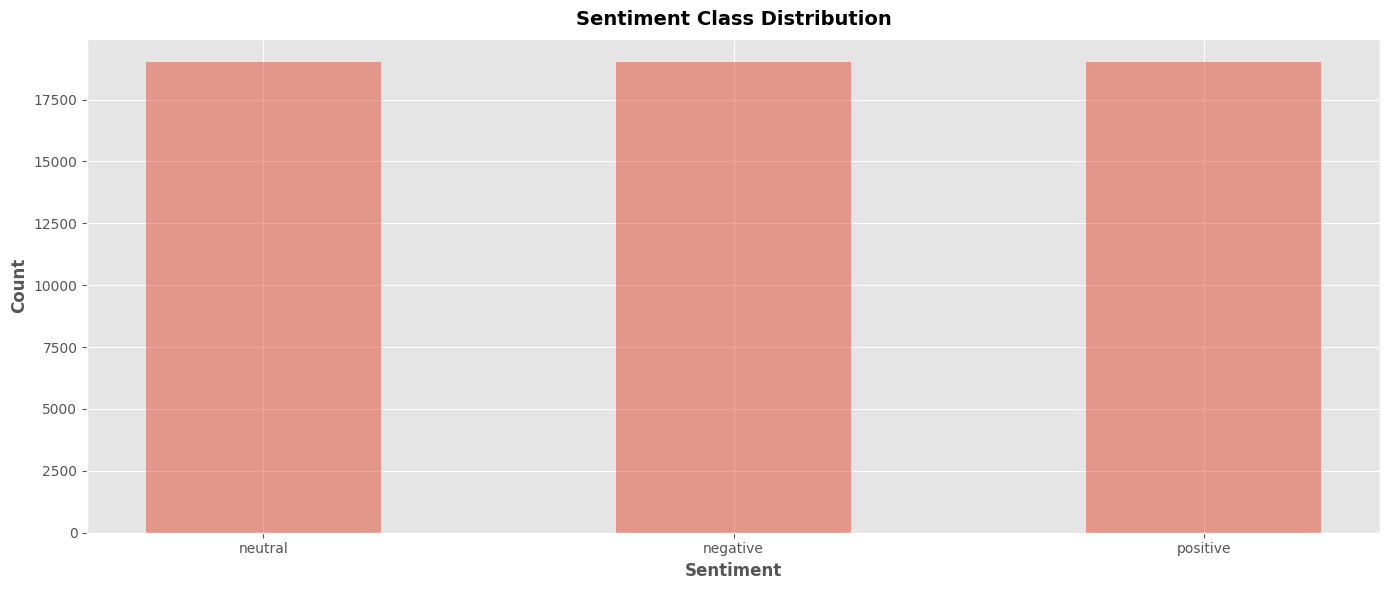

In [ ]:
plot_distribution(series=df['LABEL'].map(ID_TO_SENTIMENT),save_name="Balanced_"+DATASET_NAME)

## Preprocessing

In [34]:
# First lets normalize 
NEGATORS = [normalize_tweet(negator,reduce_vocab_flag=False) for negator in NEGATORS]

POST_NEGATORS =[normalize_tweet(post_negator,reduce_vocab_flag=False) for post_negator in POST_NEGATORS]

NEGATIVE_LEXICONS = [normalize_tweet(negative,reduce_vocab_flag=False) for negative in NEGATIVE_LEXICONS]
POSITIVE_LEXICONS = [normalize_tweet(positive,reduce_vocab_flag=False) for positive in POSITIVE_LEXICONS]
INTENSIFIERS = [normalize_tweet(intensifier,reduce_vocab_flag=False) for intensifier in INTENSIFIERS]

print('NEGATORS = ',NEGATORS)
print('POST_NEGATORS = ',POST_NEGATORS)
print('NEGATIVE_LEXICONS = ',NEGATIVE_LEXICONS)
print('POSITIVE_LEXICONS = ',POSITIVE_LEXICONS)
print('INTENSIFIERS = ',INTENSIFIERS)



NEGATORS =  ['لا', 'لم', 'ليس', 'ليست', 'مش', 'لن', 'مو', 'موب', 'غير', 'لا يوحد', 'عدم', 'مش', 'ليسوا', 'تراجع', 'معدومه', 'معدوم', 'مفيش', 'مافي', 'ما في', 'مافيش', 'ما فيش', 'يخلو من', 'مهو', 'مب', 'مافيه', 'مافيه', 'مابه', 'موفيه', 'مو فيه', 'ما به', 'ولا يوجد به اي', 'ولا', 'وغير', 'ومش', 'وليس', 'لا شيء', 'لا يوجد شء', 'ما اشوف فيه شي', 'مااشوف فيه شي', 'والله منا', 'و الله منا']
POST_NEGATORS =  ['معدومه', 'معدوم', 'متدني', 'متدنيه', 'غير موجود', 'غير موجوده']
NEGATIVE_LEXICONS =  ['ابقي قابلني', 'ابن الاحبي', 'ابن القرعه', 'ابن المره', 'ابن المنحوسه', 'ابن الهرمه', 'ابن جزمه', 'ابو جهل', 'اتق الله', 'اتقو الله', 'اتقي الله', 'اتقي شر', 'اتكسف علي دمك', 'اتكسفوا علي دمكم', 'اتمسح بينا الارض', 'اتمسح بيه الارض', 'اتمسح بيه البلاط', 'اتمسح بيهم الارض', 'اجعلهم عبره', 'اجهل بني', 'اجهل خلق الله', 'اجهل واحد', 'احترم نفسك', 'احساس وحش', 'اخبط دماغك فالحيط', 'اخص علي', 'ارحمني بءه', 'ارمي نفسي', 'ازاي بقي', 'اسمع كلامك اصدقك', 'اسوء منهم مفيش', 'اشباه رجال', 'اشكال زباله', 'اشوف فيك 

In [35]:
# checkpoint
DATASET_NAME = 'DATASET'
df=pd.read_csv(MERGED_DATASET_DIR+DATASET_NAME+'.csv')
df.sample(5)

,TWEET,LABEL
31055,انتخاب مرسي بالقطع ليس سبة ولدى اصدقاء لا اشك في ثوريتهم انتخبوه لكني ببساطة لم انتخبه وقاطعت وان كان هو الان الرئيس الشرعي,1
24006,"⚡️هاشتاق نشط في ""الترند السعودي""• #محمد_بن_سلمان_فخرنا_وعزنا📍متداول في ""السعودية""هاشتاق أطلقهُ نُشطاء التواصل الأجتماعي تمجيداً وفخراً في سيدي ولي العهد الأمير محمد بن سلمان ، لما قام به من أعمال تاريخيه منذُ توليه ولاية العهد . https://t.co/0UUbUX7cLf",0
18331,واضخ إن دروجبا هو الوشه وحش على كوت ديفور لما أعتزل كوت ديفور خد أفرقيا رجع كون ديفور بتودع تصفيات كأس العالم,1
23560,اهداف كرواتيا واليونان 4-1 كاملة 🙌🙌- مودريتش يتألق - تصفيات كاس العالم 9-10-2017:,2
17656,- كالينتش سيبدأ في مباراة منتخب كرواتيا امام اليونان وفي نفس الوقت سيبدأ ريكاردو رودريغيز لمنتخب سويسرا في مباراتهم امام إيرلندا الشمالية ضمن تصفيات كأس العالم في تمام الساعة 10:45 بتوقيت مكة. https://t.co/9kzViO5UpQ,2


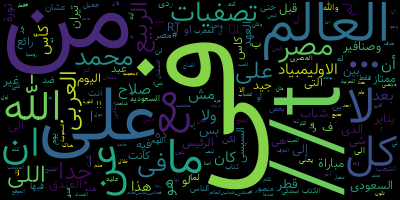

In [36]:
wordcloud_visualize(df['TWEET'],save_name = 'ORIGINAL_TWEET')

In [37]:
# take care i replaced similar meanings words into one word to decrease vocabulary
df['PREPROCESSED_TWEET'] = df['TWEET'].map(lambda x: text_preprocessing(x))
df.drop('LABEL',axis=1).sample(20, random_state=RANDOM_STATE)

<ipython-input-5-1df672b99414>:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


,TWEET,PREPROCESSED_TWEET
30395,اولاد رجال الاعمال الاوساخ واولاد تجار المخدرات واولاد الجنرالات والمعرصين والمعرصات متجمعين فى مكان واحد فقط ! تايم لاين #حازم_عبد_العظيم,اولاد رجال الاعمال الاوساخ واولاد تجار المخدرات واولاد الجنرالات و المعرصين و المعرصات متجمعين في مكان واحد فقط تايم لاين حازمعبدالعظيم
23048,"قائد الإنقلاب في مصر ""عبد الفتاح السيسي"" http://t.co/huTn2ORgY7",قاءد الانقلاب في مصر عبد الفتاح السيسي رابط
46579,لاباس . مريح والسعر معقول. بعيد عن الحرم وغير معروف لدى التكاسي لاباس به,لاباس مريح و السعر معقول بعيد عن الحرم مش معروف لدي التكاسي لاباس به
47826,أكثر جملة اسمعتها اليوم .. اللي اسمه نازل بكشوفات الداخلية يروووووح ; واللي عنده تنسيقات يضل .. طيب عندي سؤال: ليه بتنزلوا كشوفات وبتعشموا الناس تطلع وتتمرمط ?! ما تجيبوا من الآخر وتقولوا الفتحة للتنسيقات . بتلفوها ليه ما هي صارت على عينك يا تاجر .,اكثر جمله اسمعتها اليوم اللي اسمه نازل بكشوفات الداخليه يرووح و اللي عنده تنسيقات يضل حلو عندي سءال ليه بتنزلوا كشوفات وبتعشموا الناس تطلع وتتمرمط ما تجيبوا من الاخر وتقولوا الفتحه للتنسيقات بتلفوها ليه ما هي صارت علي عينك يا تاجر
52500,"""RT @3FLnQe: مورينيو - بيليه مارادونا ميسي الافضل بالتاريخ- كنت ادرب رونالدو ليس هذا بل الحقيقي البرازيلي.المصدر قناة الريال⬇https://t.…""",مستخدم مورينيو بيليه مارادونا ميسي الافضل بالتاريخ كنت ادرب رونالدو مش هذا بل الحقيقي البرازيليالمصدر قناه الريال رابط
22882,صابرين ، صاملين ، على الموت مبايعين فداء لها وفداء لاميرنا ماهزنا ريحمثل الجبال شامخين لو طال بنا الحصار سنين وسنين#١٥٠_يوم_على_حصار_قطر https://t.co/sIFqLirYhR,صابرين صاملين علي الموت مبايعين حلو لها وفداء لاميرنا ماهزنا ريحمثل الجبال شامخين لو طال بنا الحصار سنين وسنين يومعليحصارقطر رابط
56239,بصراحة انا احب #شبكة_المجد بس حظي الردي هو الي رافض ان اشترك فيها 😣,بصراحه انا احب شبكهالمجد بس حظي الردي هو الي رافض ان اشترك فيها
56024,#كلنا_ااالدلمانيمات وهو ماسك القرآن، مات وهو ساجد، مات وهو في مكه، يارب تختم حياتي بشيء من هذهِ الأشياء.3UtO,كلناالدلمانيمات وهو ماسك القران وحش وهو ساجد وحش وهو في مكه يارب تختم حياتي بشيء من هذه الاشياء
17095,وبالنسبة للي فرط في مياه النيل وبالنسبة للي باع تيران وصنافير وبالنسبة للي قال معندناش صحة ولا تعليم ولاانتوا شعب تعشقوا التفاهه وبس الخوف من اصحاب السلطه علنى لكن لو ضعيف بتركبوه.....موش بدافع عن شرين لكن بطلوا تفاهه #بشرب_من_نيلها_ومش_هسمع_شيرين,وبالنسبه للي وحش في مياه النيل وبالنسبه للي وحش تيران وصنافير وبالنسبه للي قال معندناش صحه مش تعليم ولاانتوا شعب تعشقوا وحش وبس الخوف من اصحاب السلطه علني لكن لو وحش بتركبوهموش بدافع عن شرين لكن بطلوا وحش بشربمننيلهاومشهسمعشيرين
23585,محمود جنش ، عمر صلاح . محمود علاء ، محمود حمدي الونش ، محمد مجدي ، أحمد فتوح ، حازم إمام محمود عبدالعاطي دونجا ، أحمد داوودا ، أحمد توفيق ، عبدالله جمعة ، أيمن حفني ، أحمد مدبولي ، محمد إبراهيم ، صلاح عاشور .محمد الشامي ، باسم مرسي ، كاسونجو ، بنيامين أتشيمبونج.,محمود جنش عمر صلاح محمود علاء محمود حمدي الونش محمد مجدي احمد فتوح حازم امام محمود عبدالعاطي دونجا احمد داوودا احمد حلو عبدالله جمعه ايمن حفني احمد مدبولي محمد ابراهيم صلاح عاشور محمد الشامي باسم مرسي كاسونجو بنيامين اتشيمبونج


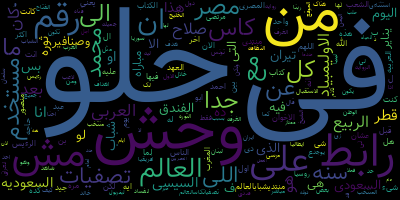

In [38]:
wordcloud_visualize(df['PREPROCESSED_TWEET'],save_name = 'PREPROCESSED_TWEET')

In [39]:
# We Decrased the vocabulary size by 43906 words

# reduce_vocab method reduced 10 words
vocab_difference(df['TWEET'],df['PREPROCESSED_TWEET'])
print(f"total rows = {len(df)}  changed rows = {len(df) - sum(df['TWEET'] == df['PREPROCESSED_TWEET'])}") 

vocabulary difference between TWEET: 141242 word and PREPROCESSED_TWEET 103433 word :  37809
total rows = 57000  changed rows = 55836


### Look for important words that we should not change based on TFIDF and Logistic Regression

Threshold = 7.1429996136204075 + -4.74074523291498  / 2= 1.2011271903527136
[(5.660301681927562, 'حلو'), (1.0164919933532297, 'عاجبني'), (2.178746167721852, 'الله'), (1.7975091560857415, 'القلب'), (2.8259092359356233, 'اللهم'), (1.0383141026177565, 'مصريه'), (1.6060852997341128, 'كل'), (1.1159742594886155, 'الحياه'), (1.7966036480963128, 'نعم'), (1.623018552337691, 'اكثر'), (1.0363553775983474, 'التاريخ'), (1.3619112638787165, 'الف'), (1.2962931290279331, 'بجد'), (1.70142039717568, 'بحب'), (1.33289160628471, 'قلبك'), (4.342327925314461, 'جميله'), (2.8412323190977347, 'يارب'), (1.7317267697014769, 'دايما'), (1.4963749084395732, 'داءما'), (2.6537901348073127, 'جدا'), (1.5686624602280748, 'ماتش'), (1.243062935454162, 'يفوز'), (1.0427362565993608, 'هذا'), (1.4104710761723396, 'شيء'), (1.9849426840912885, 'الجميل'), (1.2815760011927881, 'واقع'), (1.3739619629557913, 'التقدير'), (1.6472353607462924, 'هه'), (1.6553627701709854, 'افتتاح'), (1.4008601374848377, 'قلبي'), (1.3122395707013055, 'نا

<ipython-input-68-d51eb0ad1302>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(labels=POS_WORDS_RESHAPE, rotation=90)
<ipython-input-68-d51eb0ad1302>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(labels=NEG_WORDS_RESHAPE, rotation=45)


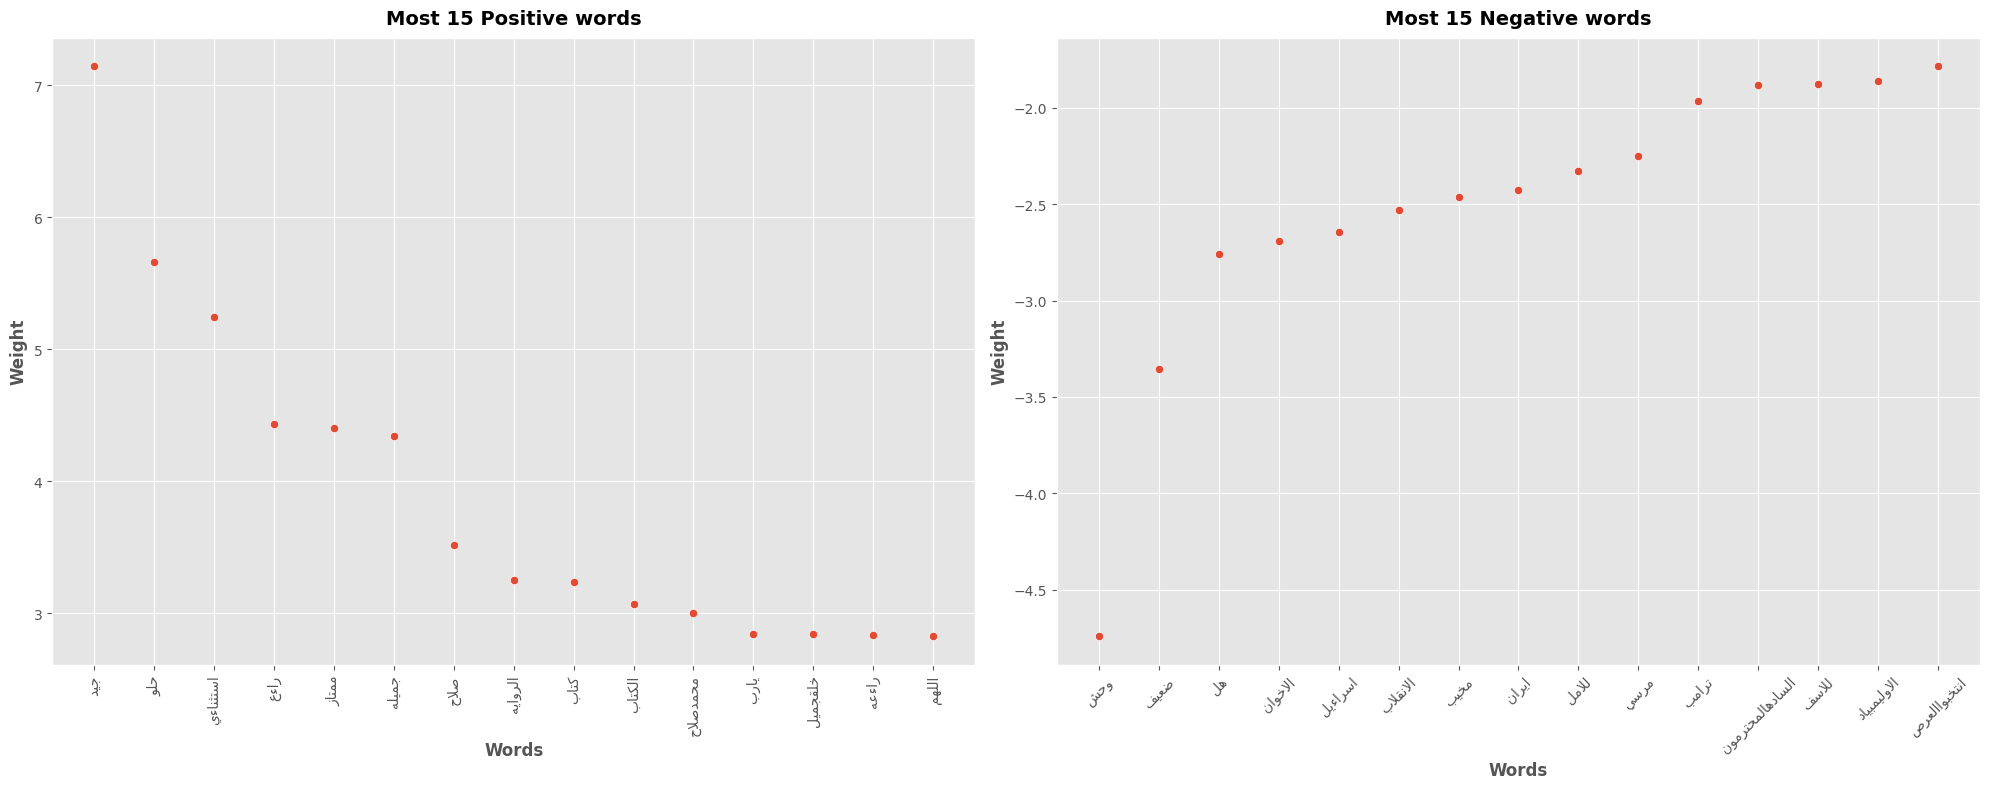

In [69]:
POS_WORDS,NEG_WORDS = logistic_regression_discrimination(df['PREPROCESSED_TWEET'],df['LABEL'],save_name='Top_Impactful_VOCAB_WORDS_Linear_Regression')

### Removed Stopwords

In [57]:
df['PREPROCESSED_STOP_TWEET'] = df['PREPROCESSED_TWEET'].map(lambda x: remove_stopwords(x))
df.drop(['LABEL','TWEET'],axis=1).sample(10, random_state=RANDOM_STATE)

,PREPROCESSED_TWEET,PREPROCESSED_STOP_TWEET
30395,اولاد رجال الاعمال الاوساخ واولاد تجار المخدرات واولاد الجنرالات و المعرصين و المعرصات متجمعين في مكان واحد فقط تايم لاين حازمعبدالعظيم,اولاد رجال الاعمال الاوساخ واولاد تجار المخدرات واولاد الجنرالات المعرصين المعرصات متجمعين مكان تايم لاين
23048,قاءد الانقلاب في مصر عبد الفتاح السيسي رابط,قاءد الانقلاب مصر عبد الفتاح السيسي رابط
46579,لاباس مريح و السعر معقول بعيد عن الحرم مش معروف لدي التكاسي لاباس به,لاباس مريح السعر معقول بعيد الحرم مش معروف التكاسي لاباس
47826,اكثر جمله اسمعتها اليوم اللي اسمه نازل بكشوفات الداخليه يرووح و اللي عنده تنسيقات يضل حلو عندي سءال ليه بتنزلوا كشوفات وبتعشموا الناس تطلع وتتمرمط ما تجيبوا من الاخر وتقولوا الفتحه للتنسيقات بتلفوها ليه ما هي صارت علي عينك يا تاجر,جمله اسمعتها اللي اسمه نازل بكشوفات الداخليه يرووح اللي عنده تنسيقات يضل حلو عندي سءال ليه بتنزلوا كشوفات وبتعشموا الناس تطلع وتتمرمط تجيبوا الاخر وتقولوا الفتحه للتنسيقات بتلفوها ليه صارت عينك تاجر
52500,مستخدم مورينيو بيليه مارادونا ميسي الافضل بالتاريخ كنت ادرب رونالدو مش هذا بل الحقيقي البرازيليالمصدر قناه الريال رابط,مستخدم مورينيو بيليه مارادونا ميسي الافضل بالتاريخ كنت ادرب رونالدو مش الحقيقي قناه الريال رابط
22882,صابرين صاملين علي الموت مبايعين حلو لها وفداء لاميرنا ماهزنا ريحمثل الجبال شامخين لو طال بنا الحصار سنين وسنين يومعليحصارقطر رابط,صابرين صاملين الموت مبايعين حلو وفداء لاميرنا ماهزنا ريحمثل الجبال شامخين طال الحصار سنين وسنين رابط
56239,بصراحه انا احب شبكهالمجد بس حظي الردي هو الي رافض ان اشترك فيها,بصراحه احب شبكهالمجد حظي الردي رافض اشترك
56024,كلناالدلمانيمات وهو ماسك القران وحش وهو ساجد وحش وهو في مكه يارب تختم حياتي بشيء من هذه الاشياء,ماسك القران وحش ساجد وحش مكه يارب تختم حياتي بشيء الاشياء
17095,وبالنسبه للي وحش في مياه النيل وبالنسبه للي وحش تيران وصنافير وبالنسبه للي قال معندناش صحه مش تعليم ولاانتوا شعب تعشقوا وحش وبس الخوف من اصحاب السلطه علني لكن لو وحش بتركبوهموش بدافع عن شرين لكن بطلوا وحش بشربمننيلهاومشهسمعشيرين,وبالنسبه للي وحش مياه النيل وبالنسبه للي وحش تيران وصنافير وبالنسبه للي معندناش صحه مش تعليم ولاانتوا شعب تعشقوا وحش وبس الخوف اصحاب السلطه علني وحش بتركبوهموش بدافع شرين بطلوا وحش
23585,محمود جنش عمر صلاح محمود علاء محمود حمدي الونش محمد مجدي احمد فتوح حازم امام محمود عبدالعاطي دونجا احمد داوودا احمد حلو عبدالله جمعه ايمن حفني احمد مدبولي محمد ابراهيم صلاح عاشور محمد الشامي باسم مرسي كاسونجو بنيامين اتشيمبونج,محمود جنش عمر صلاح محمود علاء محمود حمدي الونش محمد مجدي احمد فتوح حازم محمود عبدالعاطي دونجا احمد داوودا احمد حلو عبدالله ايمن حفني احمد مدبولي محمد ابراهيم صلاح عاشور محمد الشامي مرسي كاسونجو بنيامين اتشيمبونج


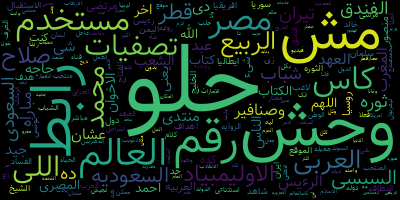

In [58]:
wordcloud_visualize(df['PREPROCESSED_STOP_TWEET'],save_name = 'PREPROCESSED_STOP_TWEET')

In [59]:
# We Decrased the vocabulary size by 5079 words
vocab_difference(df['PREPROCESSED_TWEET'],df['PREPROCESSED_STOP_TWEET'])
print(f"total rows = {len(df)}  changed rows = {len(df) - sum(df['PREPROCESSED_STOP_TWEET'] == df['PREPROCESSED_TWEET'])}") 

vocabulary difference between PREPROCESSED_TWEET: 103433 word and PREPROCESSED_STOP_TWEET 98438 word :  4995
total rows = 57000  changed rows = 51114


### Stemming

> reason behind stemming come last is that to use third-party stemmer causly

> is the process of reducing inflected or derived words to their word stem or root form

> we will investigate different stemmers :

#### Before and After using Different Stemmers

*   `arabic_stemmer` : it is a combination of two stemmers one made by me and the other is `snowball stemmer`



In [60]:
%%time
df['PREPROCESSED_STOP_ARABIC_STEMMER_TWEET'] = df['PREPROCESSED_STOP_TWEET'].map(lambda x: normalize_tweet(arabic_stemmer(x),flag=True))
df.drop(['LABEL','TWEET','PREPROCESSED_TWEET'],axis=1).sample(10, random_state=RANDOM_STATE)

CPU times: user 4min 26s, sys: 716 ms, total: 4min 26s
Wall time: 4min 47s


,PREPROCESSED_STOP_TWEET,PREPROCESSED_STOP_ARABIC_STEMMER_TWEET
30395,اولاد رجال الاعمال الاوساخ واولاد تجار المخدرات واولاد الجنرالات المعرصين المعرصات متجمعين مكان تايم لاين,اولاد رجال اعمال وحش اولاد تجار مخدرا اولاد جنرالا وحش معرصا متجمع مك تايم اين
23048,قاءد الانقلاب مصر عبد الفتاح السيسي رابط,قاءد وحش مصر عبد تاح وحش رابط
46579,لاباس مريح السعر معقول بعيد الحرم مش معروف التكاسي لاباس,اباس مريح سعر معقول حلو حرم مش معروف تكاس اباس
47826,جمله اسمعتها اللي اسمه نازل بكشوفات الداخليه يرووح اللي عنده تنسيقات يضل حلو عندي سءال ليه بتنزلوا كشوفات وبتعشموا الناس تطلع وتتمرمط تجيبوا الاخر وتقولوا الفتحه للتنسيقات بتلفوها ليه صارت عينك تاجر,جمل اسمع لي اسم نازل كشوف داخل رووح لي عند تنسيق يضل حلو عند ءال ليه نزل شوفا تعشم ناس تطلع تتمرمط تجيب اخر تقول فتح لتنسيقا لفو ليه صار عين تاجر
52500,مستخدم مورينيو بيليه مارادونا ميسي الافضل بالتاريخ كنت ادرب رونالدو مش الحقيقي قناه الريال رابط,مستخدم مورين بيل ماراد ميس حلو تاريخ كنت ادرب رونالد مش حقيق قنا ريال رابط
22882,صابرين صاملين الموت مبايعين حلو وفداء لاميرنا ماهزنا ريحمثل الجبال شامخين طال الحصار سنين وسنين رابط,صابر صامل موت مبايع حلو داء امير ماهز ريحمثل جبال حلو طال وحش نين سنين رابط
56239,بصراحه احب شبكهالمجد حظي الردي رافض اشترك,صراح احب شبكهالمجد حظ رد رافض اشتر
56024,ماسك القران وحش ساجد وحش مكه يارب تختم حياتي بشيء الاشياء,ماس قران وحش اجد وحش مكه ارب تختم حيا شيء اشياء
17095,وبالنسبه للي وحش مياه النيل وبالنسبه للي وحش تيران وصنافير وبالنسبه للي معندناش صحه مش تعليم ولاانتوا شعب تعشقوا وحش وبس الخوف اصحاب السلطه علني وحش بتركبوهموش بدافع شرين بطلوا وحش,نسبه لل وحش ميا نيل نسبه لل وحش تير صنافير نسبه لل معندناش صحه مش تعليم لاانت شعب حلو وحش وبس وحش اصحاب وحش علن وحش ركبوهموش دافع وحش حلو وحش
23585,محمود جنش عمر صلاح محمود علاء محمود حمدي الونش محمد مجدي احمد فتوح حازم محمود عبدالعاطي دونجا احمد داوودا احمد حلو عبدالله ايمن حفني احمد مدبولي محمد ابراهيم صلاح عاشور محمد الشامي مرسي كاسونجو بنيامين اتشيمبونج,محمود جنش عمر صلاح محمود علاء محمود حمد ونش محمد حلو احمد توح حازم محمود عبدالعاط دونج احمد داوود احمد حلو عبدالل ايم حفن احمد مدبول محمد ابراهيم صلاح عاشور محمد شام مرس اسونج نيام اتشيمبونج


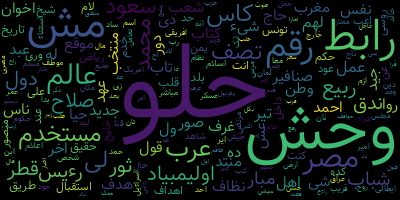

In [61]:
wordcloud_visualize(df['PREPROCESSED_STOP_ARABIC_STEMMER_TWEET'],save_name = 'PREPROCESSED_STOP_ARABIC_STEMMER_TWEET')

In [67]:
# We Decrased the vocabulary size by 75846 words
vocab_difference(df['PREPROCESSED_STOP_TWEET'],df['PREPROCESSED_STOP_ARABIC_STEMMER_TWEET'])
print(f"total rows = {len(df)}  changed rows = {len(df) - sum(df['PREPROCESSED_STOP_ARABIC_STEMMER_TWEET'] == df['PREPROCESSED_TWEET'])}") 

vocabulary difference between PREPROCESSED_STOP_TWEET: 98438 word and PREPROCESSED_STOP_ARABIC_STEMMER_TWEET 42446 word :  55992
total rows = 57000  changed rows = 56671


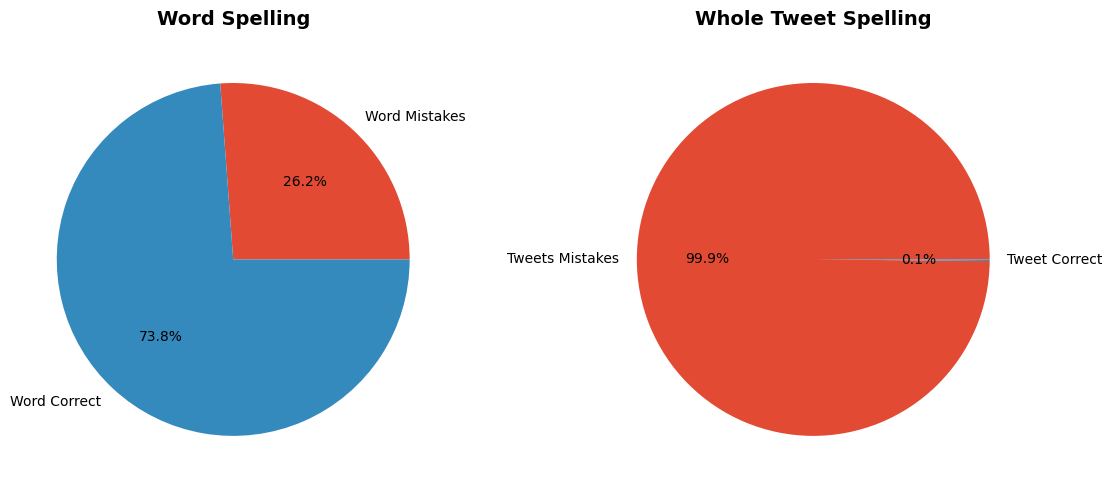

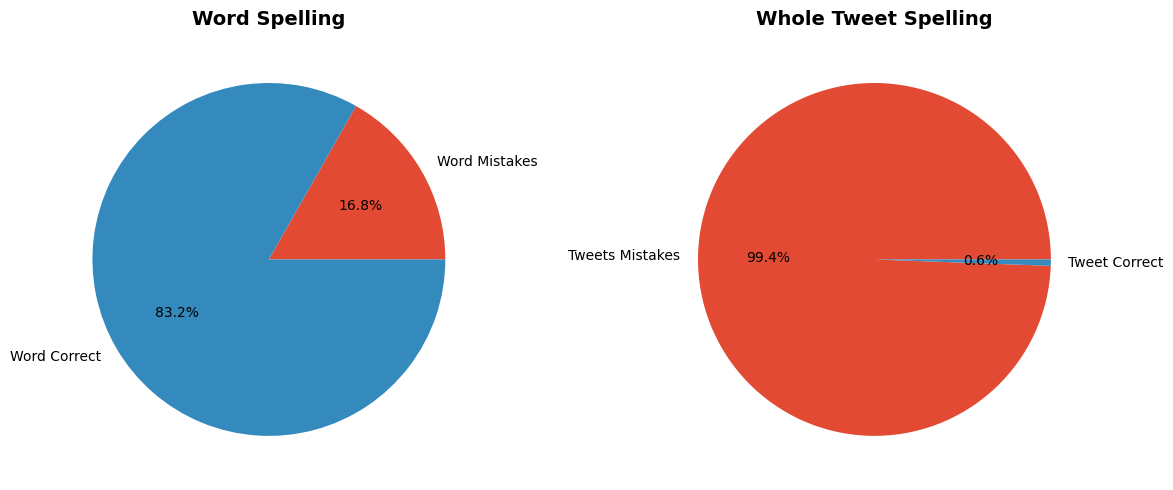

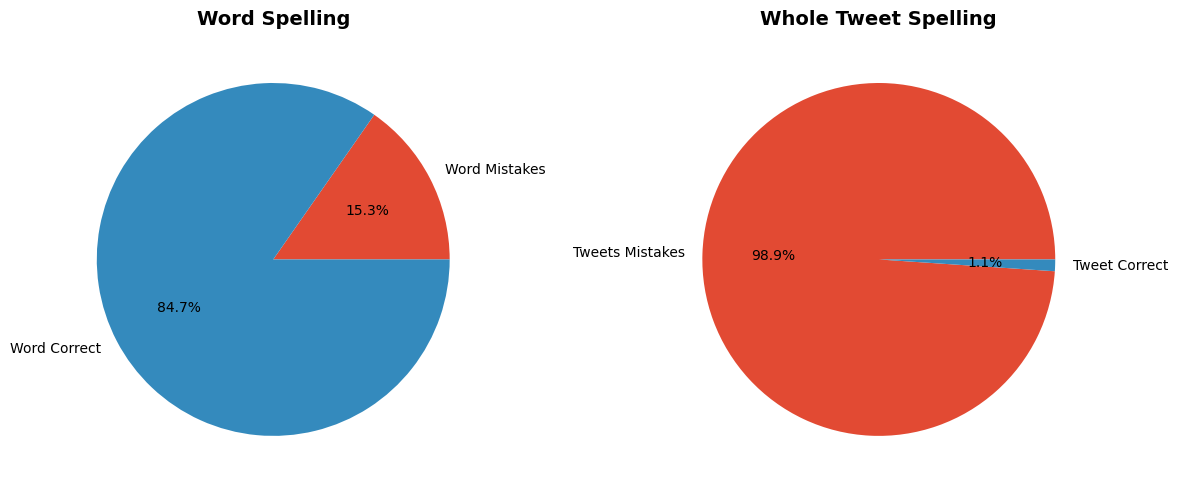

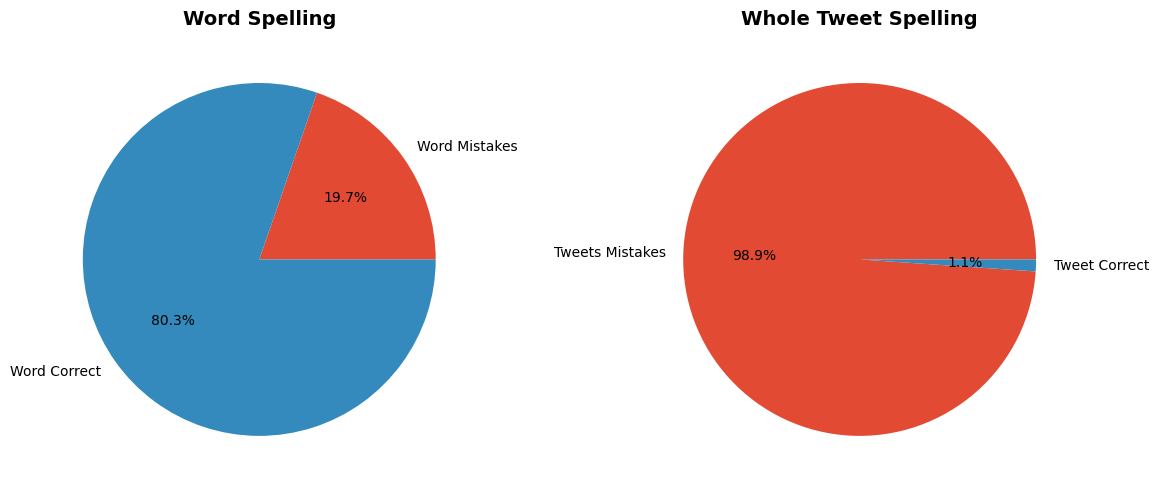

In [71]:
count_spelling_mistakes(df,'TWEET',title = 'Original Tweets')
count_spelling_mistakes(df,'PREPROCESSED_TWEET',title = 'Preprocessed Tweets')
count_spelling_mistakes(df,'PREPROCESSED_STOP_TWEET',title = 'After Stopword removal Preprocessed Tweets')
count_spelling_mistakes(df,'PREPROCESSED_STOP_ARABIC_STEMMER_TWEET',title = 'After Stemming and Stopword removal Preprocessed Tweets')


### Final Cleaning Rows

In [ ]:
# Select rows that contain a tab character
tab_rows = df[df['TWEET'].str.contains('\t')]
tab_rows

,TWEET,LABEL,PREPROCESSED_TWEET,PREPROCESSED_STOP_TWEET,PREPROCESSED_STOP_ARABIC_STEMMER_TWEET


In [ ]:
# Remove rows that contain a tab character
df = df[~df['TWEET'].str.contains('\t')]
# replace empty string values with NaN
df.replace('', np.nan,inplace=True)
# Remove duplicated rows
df.drop_duplicates(inplace=True)
# Remove nulls
df.dropna(axis=0,inplace=True)

# Limit to 180 words
df = df[df['PREPROCESSED_STOP_TWEET'].apply(lambda tweet: len(tweet.split())) <= MAX_LEN]


In [ ]:
print(df.isnull().sum())
# check duplicated 
print(df.duplicated().sum())

TWEET                                     0
LABEL                                     0
PREPROCESSED_TWEET                        0
PREPROCESSED_STOP_TWEET                   0
PREPROCESSED_STOP_ARABIC_STEMMER_TWEET    0
dtype: int64
0


In [ ]:
df.groupby('LABEL').describe()

TWEET         \
       count unique   
LABEL                 
0      16487  16487   
1      17549  17549   
2      18190  18190   

                                                                                                             \
                                                                                                        top   
LABEL                                                                                                         
0                                               جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حراسه المرمي...   
1      عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني لسه اقل من 7 % و نفلس و بهايم لسه يتابعوا الاوليمبياد   
2                                                                   الاوليمبياد الجايه هكون لسه ف الكليه ..   

           PREPROCESSED_TWEET         \
      freq              count unique   
LABEL                                  
0        1              16487  16158   
1        1              17549  17138   
2        1              18190  17693   

                                                                                                              \
                                                                                                         top   
LABEL                                                                                                          
0                                                                                                  محمد صلاح   
1      يوم رقم سنه جيشنا العزيز ايه اخبار الجهازالفشيخالليبيعالجالايدزوفايروس تيرانوصنافيرمصريه الوراقلاهلها   
2              عرض الاسبوع رقم الف متابع شوارعنا فنتتقنهالنساء ذلكالشخص شيودكتجربه بوح درر عجبني حلو مكه رقم   

           PREPROCESSED_STOP_TWEET         \
      freq                   count unique   
LABEL                                       
0       22                   16487  16087   
1       10                   17549  17111   
2       23                   18190  17570   

                                                 \
                                       top freq   
LABEL                                             
0                                محمد صلاح   27   
1      رقم جيشنا العزيز اخبار الوراقلاهلها   10   
2                                     رابط   30   

      PREPROCESSED_STOP_ARABIC_STEMMER_TWEET         \
                                       count unique   
LABEL                                                 
0                                      16487  16060   
1                                      17549  17089   
2                                      18190  17551   

                                       
                             top freq  
LABEL                                  
0                      محمد صلاح   27  
1      رقم جيش حلو اخبار راقلاهل   10  
2                           رابط   33

#### Spell Checker

In [ ]:
count_spelling_mistakes(df,'TWEET',title = 'Original Tweets')
count_spelling_mistakes(df,'PREPROCESSED_TWEET',title = 'Preprocessed Tweets')



## Data Augmenting 
> 

#### Random Data Replication (Respecting Class Balancing) by `5 percent`

In [ ]:
# Check the class distribution in the original DataFrame
class_counts = df['LABEL'].value_counts()
print('Original Class Distribution:')
print(class_counts)

# Set the desired class ratio for balancing
desired_class_ratio = 0.05

# Calculate the maximum number of times a row can be replicated
max_replications = int(np.ceil(desired_class_ratio * class_counts.max()))

# Replicate rows to achieve the desired class ratio
balanced_df = pd.concat([df[df['LABEL'] == label].sample(n=max_replications, replace=True) for label in class_counts.index])

# Reset the index of the balanced DataFrame
balanced_df = balanced_df.reset_index(drop=True)

# Check the class distribution in the balanced DataFrame
balanced_class_counts = balanced_df['LABEL'].value_counts()
print('\nBalanced Class Distribution:')
print(balanced_class_counts)

# Concatenate the balanced DataFrame with the original DataFrame
df = pd.concat([df, balanced_df], ignore_index=True)

# Check the class distribution in the concatenated DataFrame
concatenated_class_counts = df['LABEL'].value_counts()
print('\nConcatenated Class Distribution:')
print(concatenated_class_counts)

Original Class Distribution:
2    18190
1    17549
0    16487
Name: LABEL, dtype: int64

Balanced Class Distribution:
2    910
1    910
0    910
Name: LABEL, dtype: int64

Concatenated Class Distribution:
2    19100
1    18459
0    17397
Name: LABEL, dtype: int64


In [ ]:
# Find the row with the largest text length
max_length_row = df.iloc[df['PREPROCESSED_STOP_TWEET'].str.len().idxmax()]

# Print the row with the largest text length
print(f"Row with the largest text length {len(max_length_row['PREPROCESSED_STOP_TWEET'])}:")
print((max_length_row['PREPROCESSED_STOP_TWEET']))

Row with the largest text length 268:
اعلان تشكيله منتخب عمان المشارك تصفيات كاس العالم لكرد اليد بكوريا رقم حلو التمتي ومنير البلوشي وعزان عزان وقيس الحسني واسامه الكاسبي ومهمدي السليماني وعبد الجكيم السيابي واسعد الحسني وسعيد الحسني وحمد الدغيشي حلو الحديدي زاهر الحديدي وعدنان الوهيبي ومهند الزرافي يتبع


#### Data Replication (Respecting Class Balancing) and priority to the higher text(char) length by `75 percent`

In [ ]:
# Calculate string length for each row
df['string_length'] = df['PREPROCESSED_STOP_TWEET'].str.len()

# Set a threshold for string length
string_length_threshold = 200

# Select rows that have string length greater than the threshold
selected_rows = df[df['string_length'] > string_length_threshold]


# Check the class distribution in the original DataFrame
class_counts = selected_rows['LABEL'].value_counts()
print('Original Class Distribution:')
print(class_counts)

# Set the desired class ratio for balancing
desired_class_ratio = 0.75

# Calculate the maximum number of times a row can be replicated
max_replications = int(np.ceil(desired_class_ratio * class_counts.min()))



# Replicate rows to achieve the desired class ratio
balanced_df = pd.concat([selected_rows[selected_rows['LABEL'] == label].sample(n=max_replications, replace=True) for label in class_counts.index])

# Reset the index of the balanced DataFrame
balanced_df = balanced_df.reset_index(drop=True)

# Check the class distribution in the balanced DataFrame
balanced_class_counts = balanced_df['LABEL'].value_counts()
print('\nBalanced Class Distribution:')
print(balanced_class_counts)

# Concatenate the balanced DataFrame with the original DataFrame
df = pd.concat([df, balanced_df], ignore_index=True)

# Check the class distribution in the concatenated DataFrame
concatenated_class_counts = df['LABEL'].value_counts()
print('\nConcatenated Class Distribution:')
print(concatenated_class_counts)





Original Class Distribution:
1    699
0    345
2    135
Name: LABEL, dtype: int64

Balanced Class Distribution:
1    102
0    102
2    102
Name: LABEL, dtype: int64

Concatenated Class Distribution:
2    19202
1    18561
0    17499
Name: LABEL, dtype: int64


### Saving data ( Merged & Preprocessed & & Stopwords Removed) but not STEMMED  `PREPROCESSED_STOP_TWEET`

In [ ]:
df_copy =df.copy()

Average words per sample length: 18.61970250805255
Max Words per sample length: 196
Min Words per sample length: 1
Average characters per sample length: 102.87819840034743
Max characters per sample length: 305
Min characters per sample length: 3


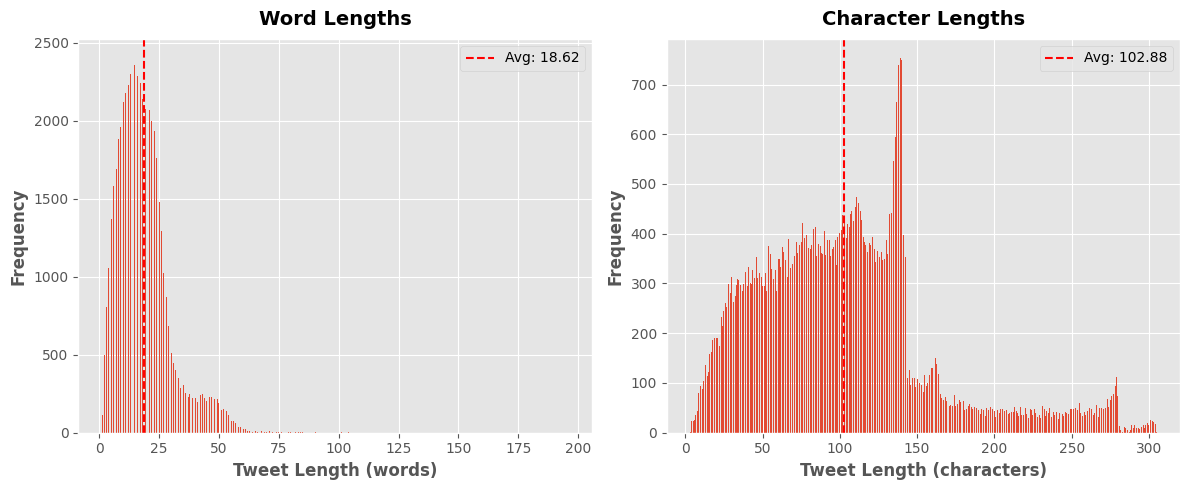

In [ ]:
plot_length(df_copy['TWEET'],title ='Original TWEET - Word & Character length ',save_dir=FIGURES_DIR)

Average words per sample length: 16.06353371213492
Max Words per sample length: 61
Min Words per sample length: 1
Average characters per sample length: 89.65920524049075
Max characters per sample length: 286
Min characters per sample length: 2


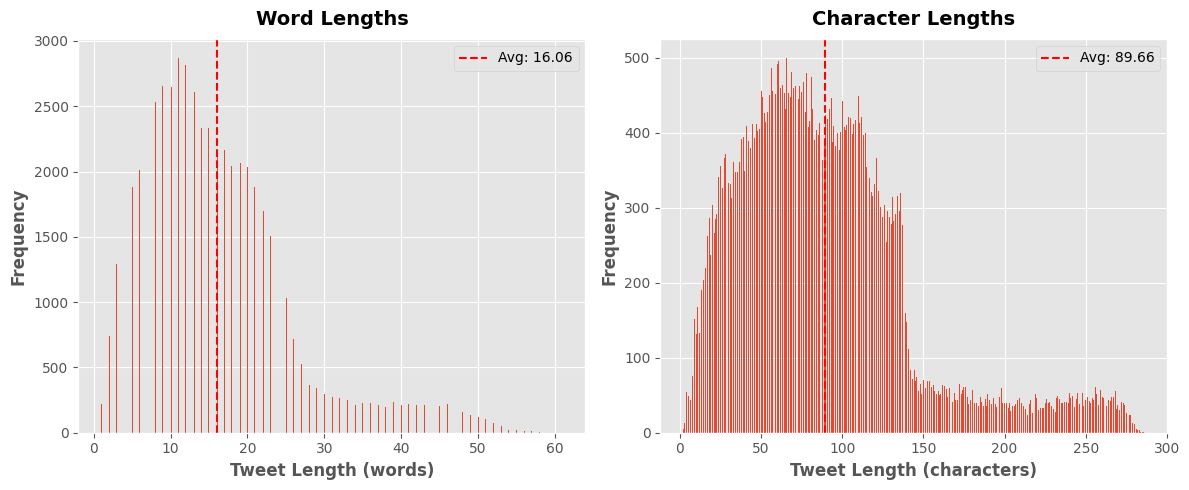

In [ ]:
# preprocessed
plot_length(df_copy['PREPROCESSED_TWEET'],title ='PREPROCESSED TWEET - Word & Character length ',save_dir=FIGURES_DIR)

Average words per sample length: 12.276066736636386
Max Words per sample length: 50
Min Words per sample length: 1
Average characters per sample length: 73.64934312909413
Max characters per sample length: 268
Min characters per sample length: 2


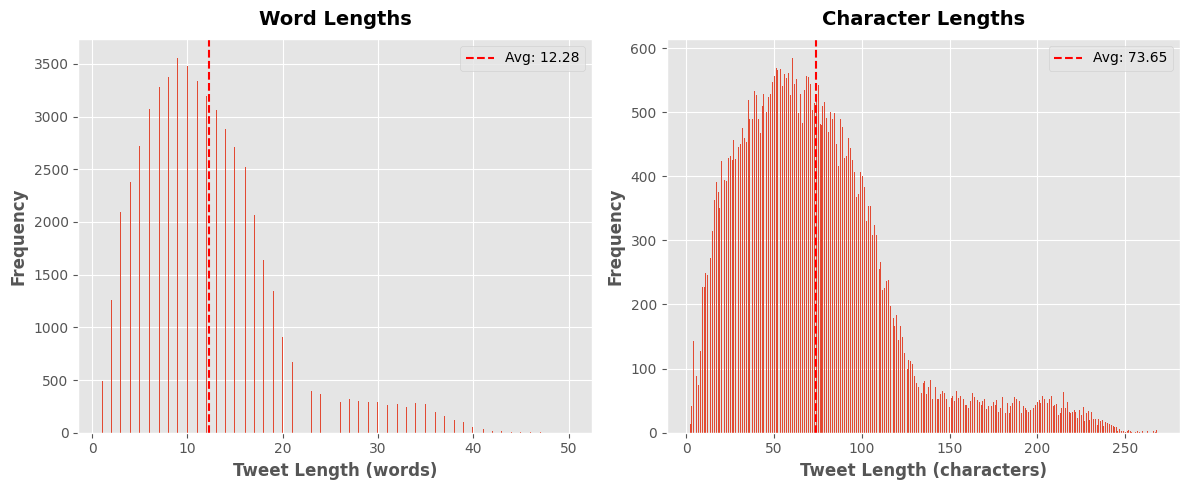

In [ ]:
# Stop Removal
plot_length(df_copy['PREPROCESSED_STOP_TWEET'],title ='PREPROCESSED & STOP Removal TWEET - Word & Character length ',save_dir=FIGURES_DIR)

Average words per sample length: 12.12272447613188
Max Words per sample length: 49
Min Words per sample length: 1
Average characters per sample length: 56.42265933190981
Max characters per sample length: 237
Min characters per sample length: 2


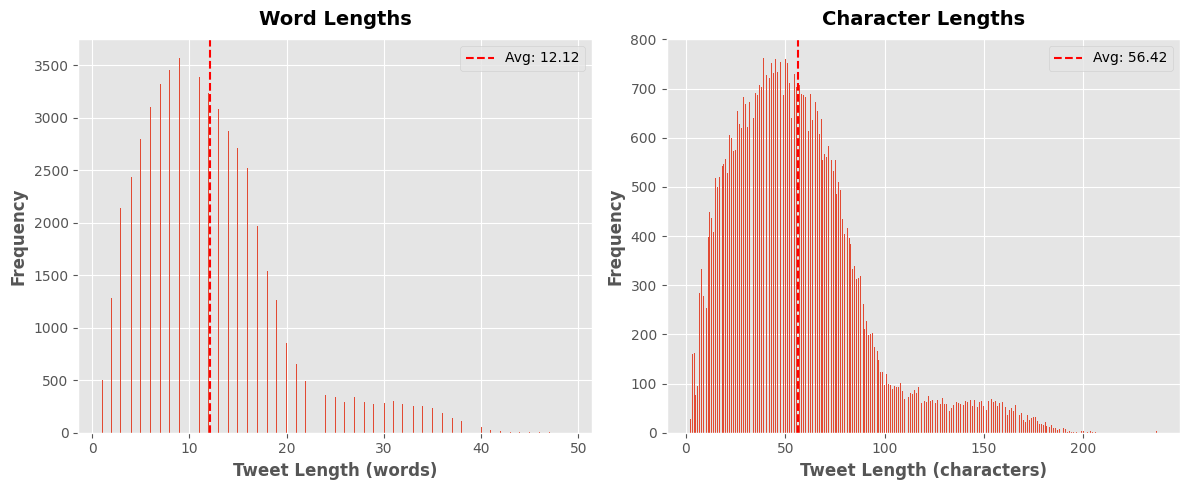

In [ ]:
# Stemmed
plot_length(df_copy['PREPROCESSED_STOP_ARABIC_STEMMER_TWEET'],title ='PREPROCESSED & STOP Removal & Stemmed TWEET - Word & Character length ',save_dir=FIGURES_DIR)

In [ ]:

df_copy.drop(['TWEET','PREPROCESSED_TWEET','PREPROCESSED_STOP_ARABIC_STEMMER_TWEET'],axis=1,inplace=True)
df_copy.rename(columns={
    'PREPROCESSED_STOP_TWEET':'TWEET'
},inplace=True)


from sklearn.model_selection import train_test_split


# Train: 80% Test: 20%
# Split the data into training and validation sets with stratified sampling
df_copy_train, df_copy_validation = train_test_split(
  df_copy,
  test_size = 0.2,
  stratify = df_copy['LABEL'],
  random_state = RANDOM_STATE,
  shuffle=True
)


# Test: 20% from random 
_, df_copy_test = train_test_split(
  df_copy,
  test_size=0.2,
  stratify=df_copy['LABEL'],
  shuffle=True,
  random_state=RANDOM_STATE
)



print(f"Train:{len(df_copy_train)} \nValidation:{len(df_copy_validation)} ")

# Save the whole unstemmed Dataset as checkpoint
df_copy.to_csv(os.path.join(PREPROCESSED_MERGED_DATASET_DIR , 'unstemmed/'+DATASET_NAME+'.csv'), index=False)

# Save the unstemmed Train Dataset as checkpoint
df_copy_train.to_csv(os.path.join(PREPROCESSED_MERGED_DATASET_DIR , 'unstemmed/'+'TRAIN_'+DATASET_NAME+'.csv'), index=False)

# Save the unstemmed validation Dataset as checkpoint
df_copy_validation.to_csv(os.path.join(PREPROCESSED_MERGED_DATASET_DIR , 'unstemmed/'+'VALIDATION_'+DATASET_NAME+'.csv'), index=False)

# Save the unstemmed test Dataset as checkpoint
df_copy_test.to_csv(os.path.join(PREPROCESSED_MERGED_DATASET_DIR , 'unstemmed/'+'TEST_'+DATASET_NAME+'.csv'), index=False)



Train:44209 
Validation:11053 


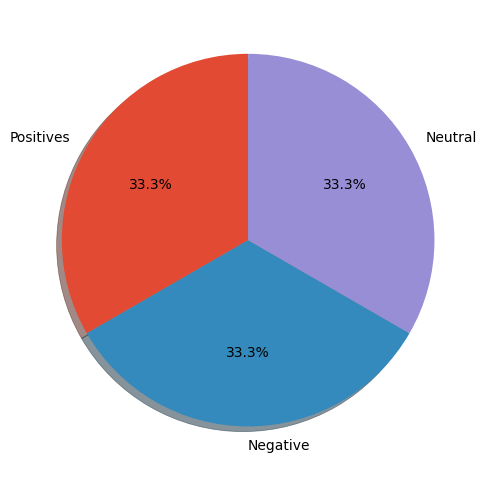

In [ ]:

all_positive_tweets=list(df[df['LABEL'] == SENTIMENT_TO_ID['positive']])
all_negative_tweets=list(df[df['LABEL'] == SENTIMENT_TO_ID['negative']])
all_neutral_tweets=list(df[df['LABEL'] == SENTIMENT_TO_ID['neutral']])

# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative','Neutral'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets),len(all_neutral_tweets)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)



# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  


# Display the chart
plt.show()

In [ ]:
df.columns

Index(['TWEET', 'LABEL', 'PREPROCESSED_TWEET', 'PREPROCESSED_STOP_TWEET',
       'PREPROCESSED_STOP_ARABIC_STEMMER_TWEET', 'string_length'],
      dtype='object')

In [ ]:
df.drop(['TWEET','PREPROCESSED_TWEET','PREPROCESSED_STOP_TWEET'],axis=1,inplace=True)

In [ ]:
df.rename(columns={
    'PREPROCESSED_STOP_ARABIC_STEMMER_TWEET':'TWEET'
},inplace=True)

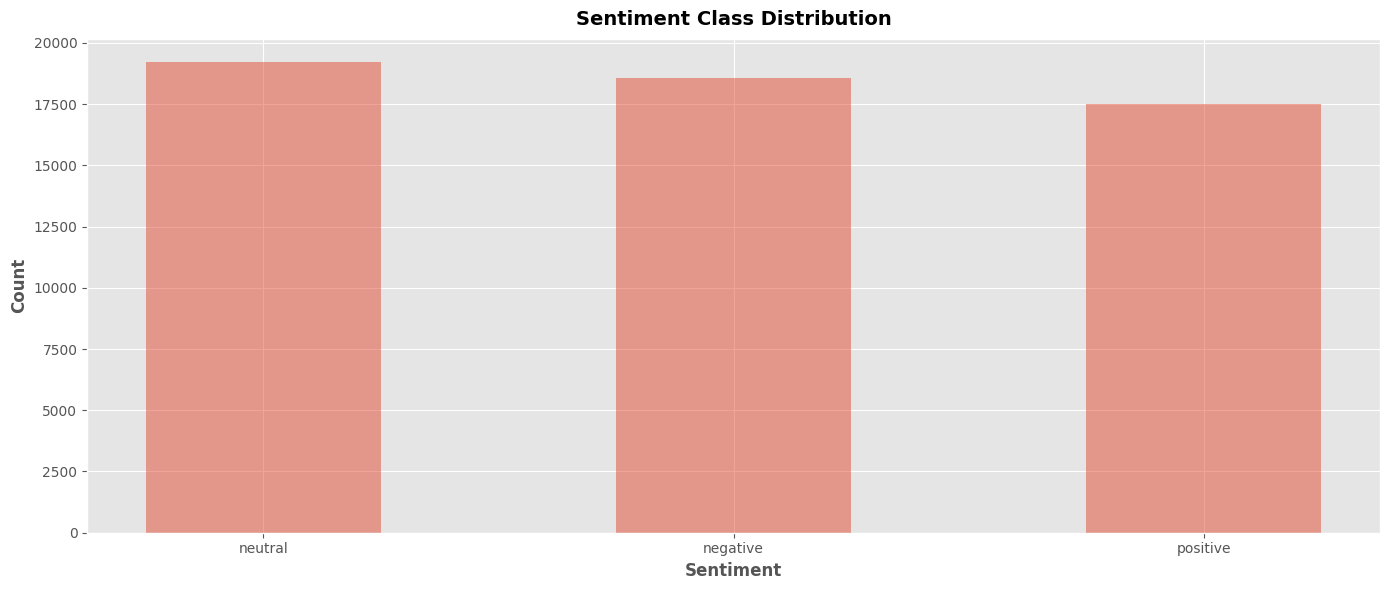

(None, 55262)

In [ ]:
plot_distribution(series=df['LABEL'].map(ID_TO_SENTIMENT),save_name="Balanced_"+DATASET_NAME),len(df) 

#### Saving Merged & Preprocessed & & Stopwords Removed Stemmed whole Dataset `PREPROCESSED_STOP_ARABIC_STEMMER_TWEET`

In [ ]:
# Save the whole Dataset as checkpoint
df.to_csv(PREPROCESSED_MERGED_DATASET_DIR+DATASET_NAME+'.csv', index=False)

## Investigating whole Dataset (Trying to reduce Vocabulary)

In [ ]:
DATASET_NAME='DATASET'

# loading merged & processed data as checkpoint
df= pd.read_csv(os.path.join(PREPROCESSED_MERGED_DATASET_DIR,DATASET_NAME+'.csv'))

### Look for important words based on TFIDF and Logistic Regression

Threshold = 6.697420210474791 + -3.9093807515486994  / 2= 1.3940197294630456
[(5.218316772191228, 'حلو'), (1.2315133135594865, 'عاجب'), (1.6563350320230055, 'له'), (1.074715244420077, 'بيل'), (1.5472169382263412, 'اعجب'), (1.5133682990965076, 'قلب'), (1.8336378995026663, 'لهم'), (1.1459263092500847, 'ارزق'), (1.0913088390750088, 'تقديم'), (1.6536421754971895, 'قرب'), (1.1900514290236508, 'اثقال'), (1.4059630098197553, 'حيد'), (2.3602016820230616, 'هدوء'), (1.3479266554083242, 'ضحك'), (1.136769247631283, 'اده'), (1.4684216659765525, 'تاريخ'), (1.0051852181962766, 'عالم'), (1.4856096138407304, 'بجد'), (2.320168534318106, 'بحب'), (1.2320064401043012, 'قري'), (1.7359039080408742, 'احب'), (2.2665634037593034, 'ارب'), (1.9415241473008633, 'دايم'), (1.0006782466091257, 'رجل'), (1.3700587358278276, 'داءم'), (1.1850003842449681, 'سرع'), (1.2566892463695716, 'انفاس'), (1.1192291103399479, 'اتاهل'), (1.3020632479186667, 'احساس'), (1.3882615801281477, 'ماتش'), (1.6351495126252453, 'فوز'), (1.00147

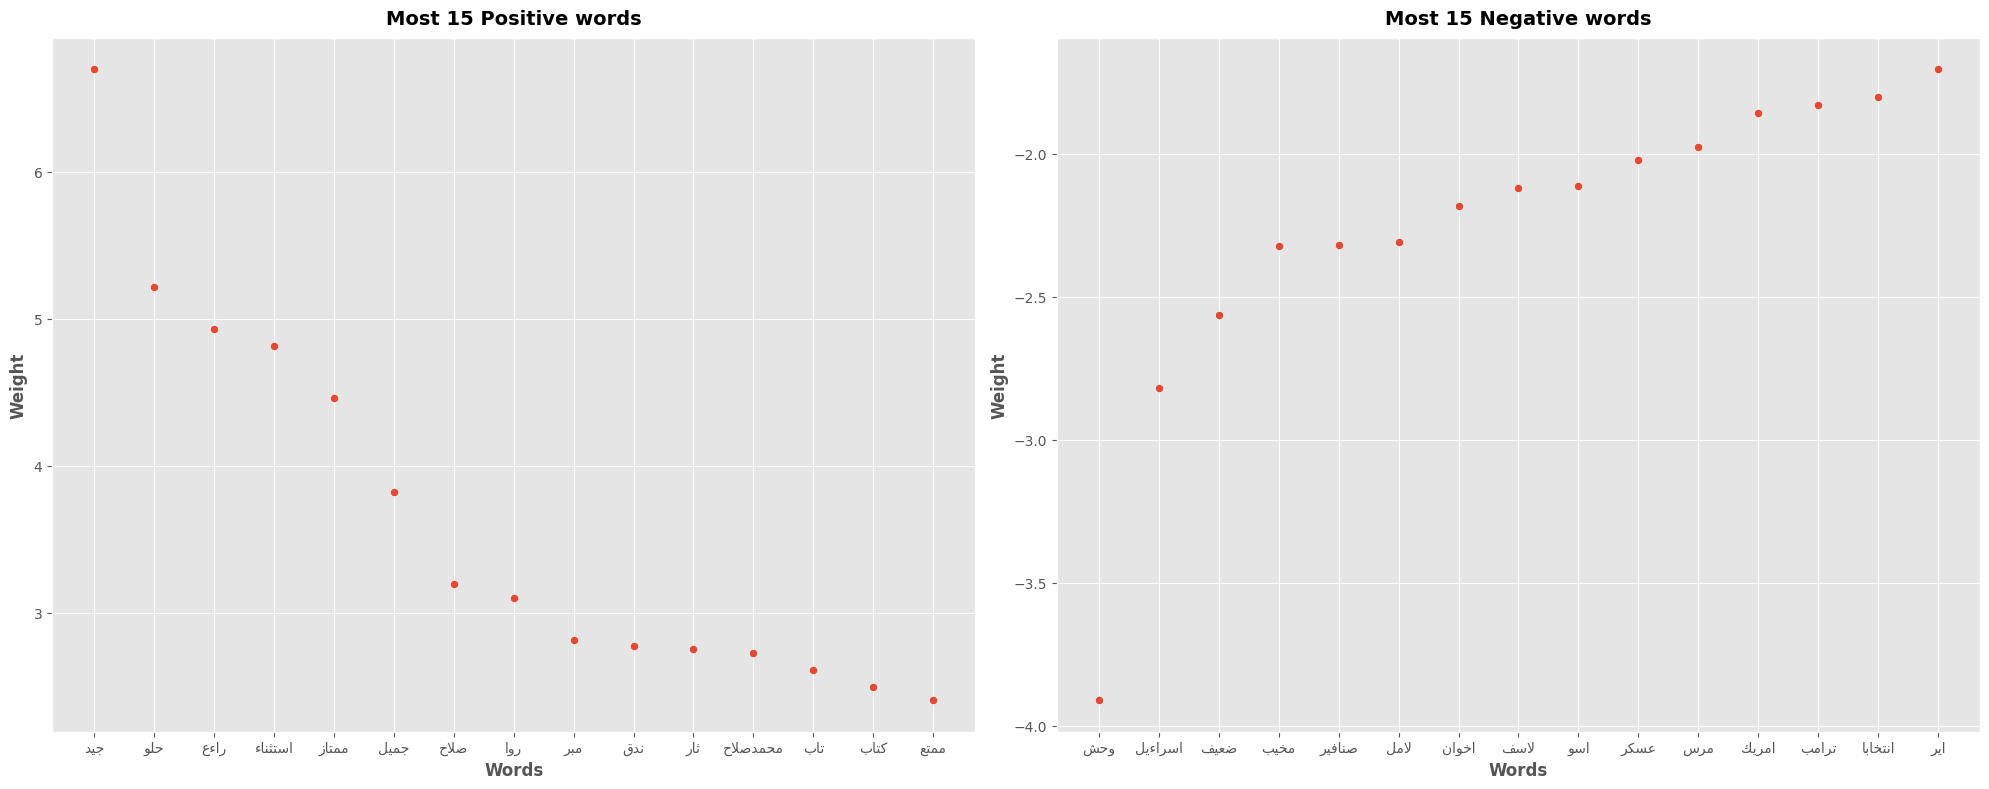

In [ ]:
POS_WORDS ,NEG_WORDS = logistic_regression_discrimination(df['TWEET'],df['LABEL'],save_name='Top_Impactful_VOCAB_WORDS_Linear_Regression_PREPROCESSING')

#### Cluster words 

> We Cluster words based on Sentiment Weight

> But first determing best suitable number of clusters based on Within-cluster sum of squares (WSS) & Elbow method

#### Elbow Method
> elbow method involves plotting the WSS as a function of the number of clusters and selecting the number of clusters where the rate of decrease in WSS starts to level off, as this point represents the best balance between cluster homogeneity and cluster quantity.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

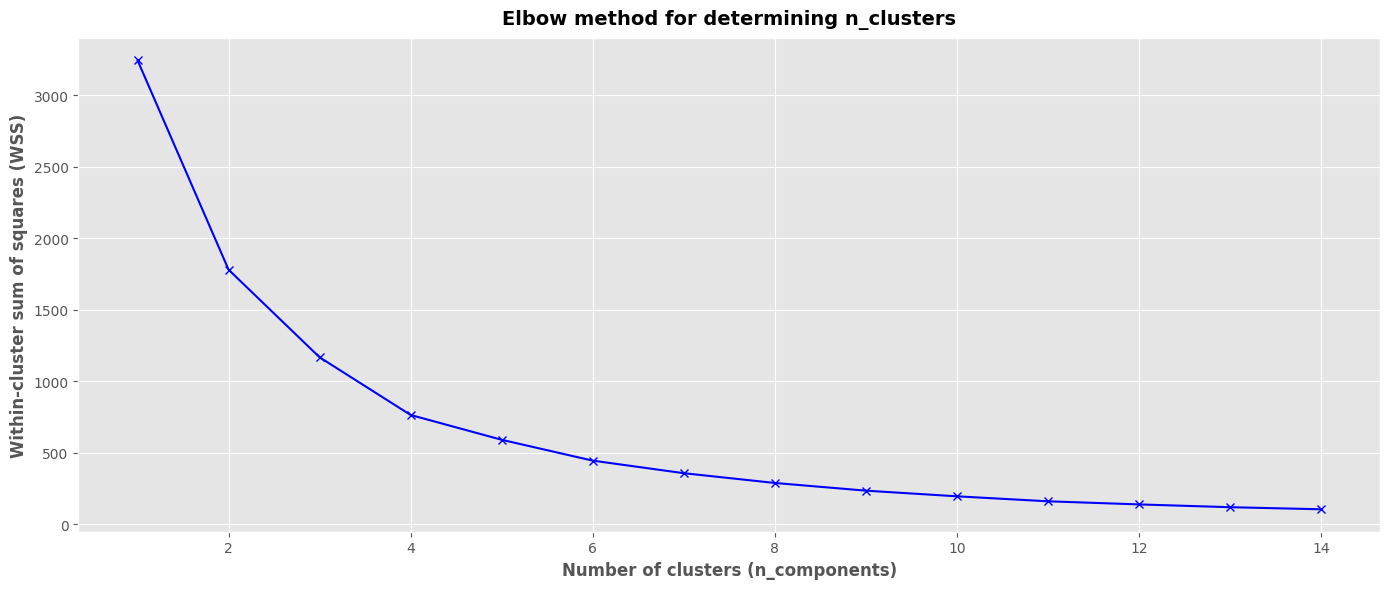

In [ ]:
plot_WSS(POS_WORDS+NEG_WORDS,save_dir = FIGURES_DIR)

##### Kmeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


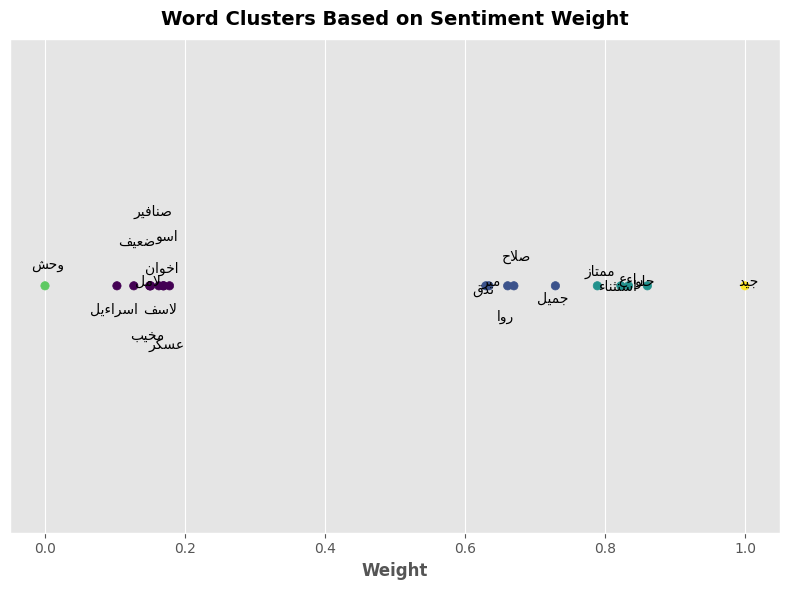

In [ ]:
## best number of clusters seems to be 5
n_clusters = 5
clustered_words=plot_cluster_words(POS_WORDS[:10] +NEG_WORDS[:10],
                   title='Sentiment Weight',
                   n_clusters=n_clusters,
                   save_name='Sentiment_clustering'
                   )

##### Hierarchical Clustering

None


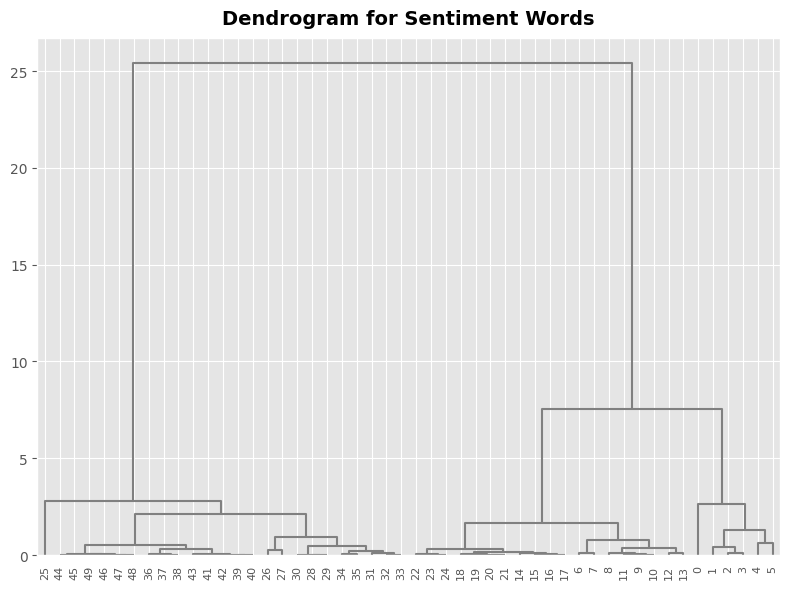

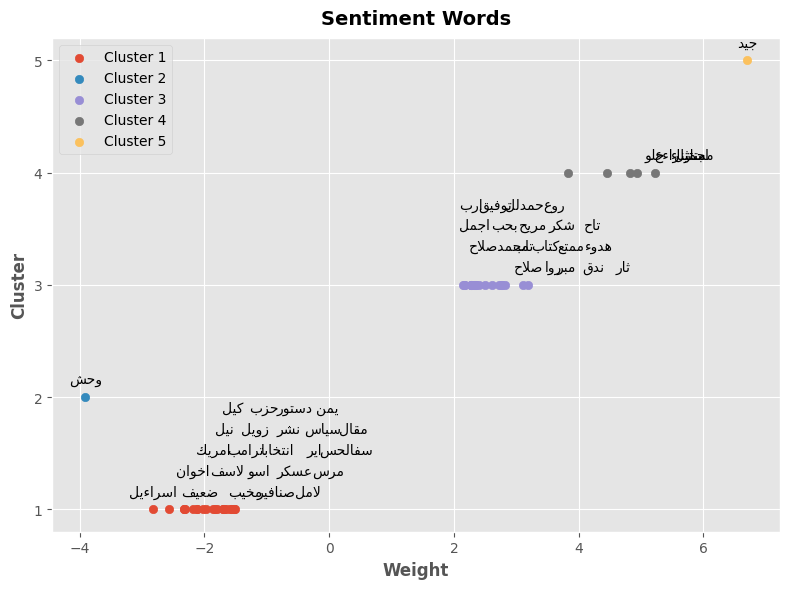

In [ ]:
title = 'Sentiment Words'
save_name = 'sentiment_words_hierarchical.png'
# Hierarchical clustering of sentiment words
print(plot_cluster_words_hierarchical(POS_WORDS[:25] +NEG_WORDS[:25], title, n_clusters, save_name))

['جميع نريد تحقيق اهداف تونس حلو وحش مرم', 'عالماش حلو لنجم ناد طف شاش ماسبير زم اتحاد حلو فن موسيق', 'عاجب وحش عرب داخل اوليمبياد دول خصوص ديح لي خد دهب وحش قاعد طبلول متحسبتش عرب مش حاج', 'رقم خلاص مش دخل افكس مالهاشتاج ده نكتب هاشتاج ترحيب بيه تويتر', 'ده يديو حيات', 'بيل روس ازم لعب وحش عنهم سوبر', 'ماشاء حلو محمد ورت حلو زي شيفو حلو دفاع وحش شء برد قلب', 'حلو تتنازل حلو حيا تجلس اكتا حيد متامل منظر سماء هدوء تام ميا جيم', 'ضحك عين لها دمووع اده حلو شير حي حلو شير', 'نرويج حلو نلند جبل حلو استقلال اسال', 'رقم حلو عالم رقم مر اوليمبياد مرت جماع حلو تونس', 'جماع كله روح عالانستجرام الا انشر حساب شير حي حلو شير', 'حلو وحش لبنت حلو جرب اوليمبياد شجيع جمهور يهم', 'عاوز تنم بشر بجد مش هزار وزيتيف اينيرج حلو مش اتفرج اوليمبياد', 'لام قلب', 'دا نهارد مصر عرب اوليمبياد وحش ارب دايم رحان', 'مستغرب طير امارا حلو خدم حلو تعويض متضرر سرع خدم امام', 'زي انهارد رقم اهل وحش مدريد تاد قاهر', 'جمال غندور هدف مبار زمال ماتش انب حلو وحش جزاء زمال مش حلو وحش جزاء انب حلو يجب وحش احمد', 'شوف عاوز نعمل ا

<ipython-input-158-ed5e7502d482>:75: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  plt.savefig(FIGURES_DIR+'Term_Frequency_based_on_sentiment',format='png')
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


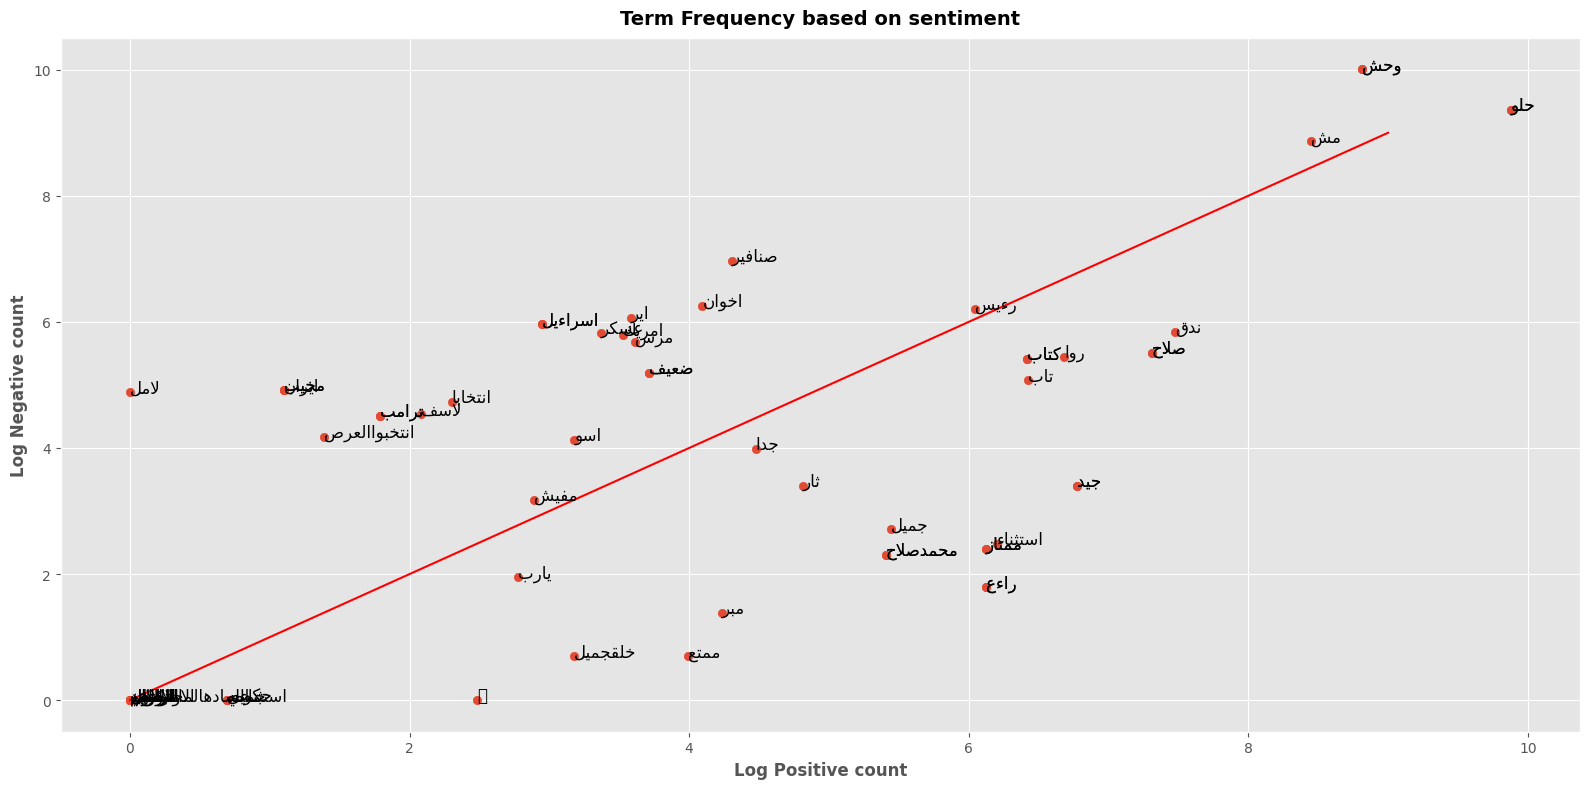

In [ ]:
# select the lists of positive and negative tweets
all_positive_tweets = list(df[df['LABEL'] == SENTIMENT_TO_ID['positive']]['TWEET'])
all_negative_tweets = list(df[df['LABEL'] == SENTIMENT_TO_ID['negative']]['TWEET'])

# concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets
print(all_positive_tweets)

# let's see how many tweets we have
print("Number of tweets: ", len(tweets))

# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))


# create frequency dictionary
freqs = build_freqs(tweets, labels)


# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')


# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = NOT_ALLOWED

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    
fig, ax = plt.subplots(figsize = (16, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(get_display(reshape(data[i][0])), (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.

plt.title('Term Frequency based on sentiment')

plt.savefig(FIGURES_DIR+'Term_Frequency_based_on_sentiment',format='png')
plt.show()

### split dataset

> `TRAIN_DATASET` : 80% of total Rows = 34519

> `VALDATION_DATASET`:10% OF TOTAL ROWS = 4315

> `TEST_DATASET`:10% OF TOTAL ROWS = 4315


In [ ]:
from sklearn.model_selection import train_test_split


# Train: 80% Test: 20%
# Split the data into training and test sets with stratified sampling
df_train, df_test = train_test_split(
  df,
  test_size=0.2,
  stratify=df['LABEL'],
  random_state=RANDOM_STATE,
  shuffle=True
)

# Test: 50% Validation: 50%
# Split the data into Test and Validation sets with stratified sampling
df_validation, df_test = train_test_split(
  df_test,
  test_size=0.5,
  stratify=df_test['LABEL'],
  shuffle=True,
  random_state=RANDOM_STATE
)

print(f"Train:{len(df_train)} \nValidation:{len(df_validation)} \nTest:{len(df_test)}")

Train:44209 
Validation:5526 
Test:5527


In [ ]:
# Save all Datasets

# Train dataset
df_train.to_csv(PREPROCESSED_MERGED_DATASET_DIR+'TRAIN_'+DATASET_NAME+'.csv', index=False)

# Validation dataset
df_validation.to_csv(PREPROCESSED_MERGED_DATASET_DIR+'VALIDATION_'+DATASET_NAME+'.csv', index=False)

# Test dataset
df_test.to_csv(PREPROCESSED_MERGED_DATASET_DIR+'TEST_'+DATASET_NAME+'.csv', index=False)